## Pellet and Meal Analysis and Distribution

In [1]:
import sys
sys.path.insert(0, '../scripts')

import os
import meals as ml
import tools as tl
from preprocessing import get_all_sheet_names, read_excel_by_sheet, find_dispense_time_by_day
from accuracy import graph_group_stats
from path import *

export_root = '../WT_export/Figure 3'
time_threshold = 60
pellet_threshold = 2

### Control Group

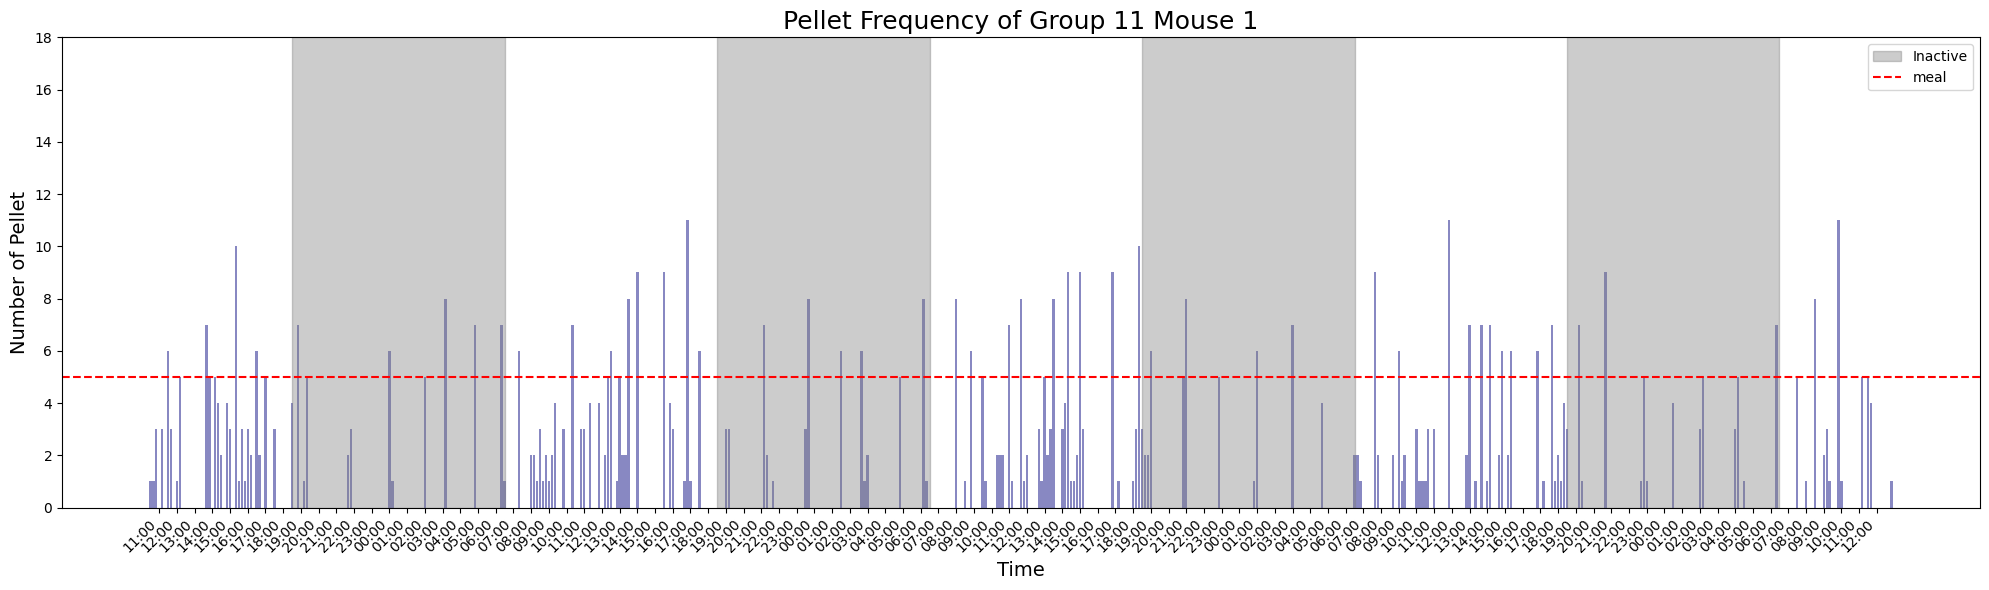

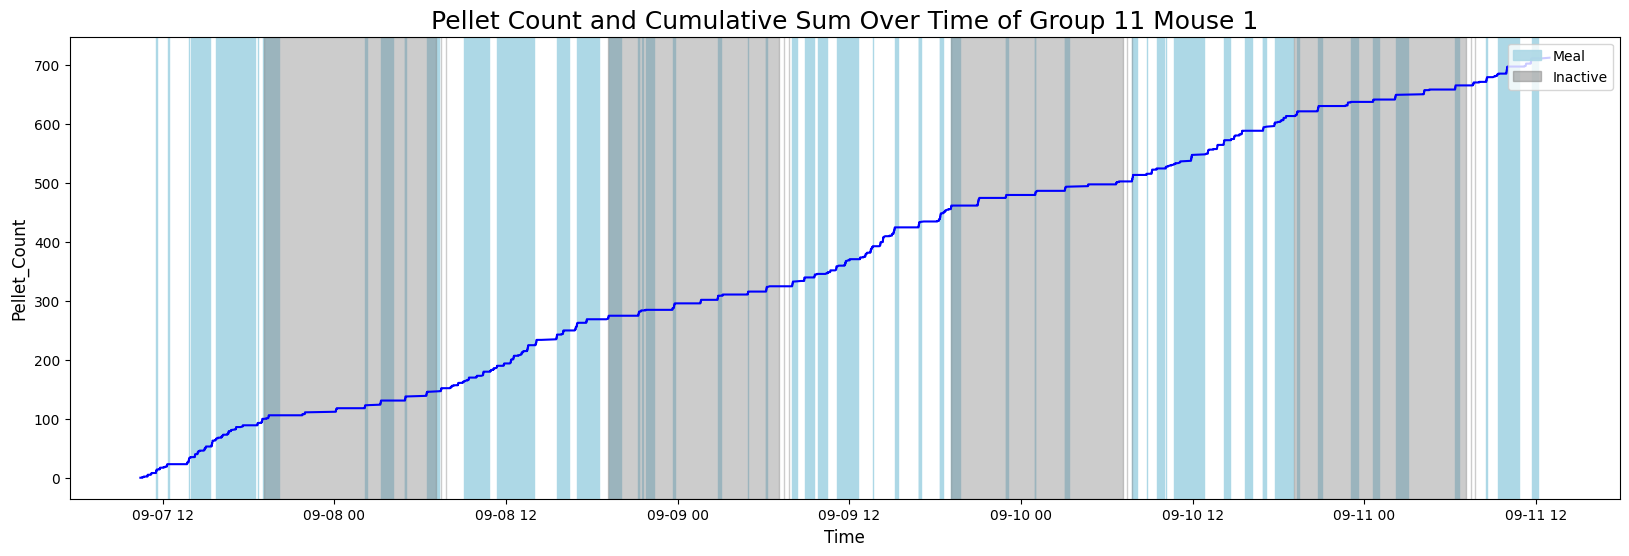

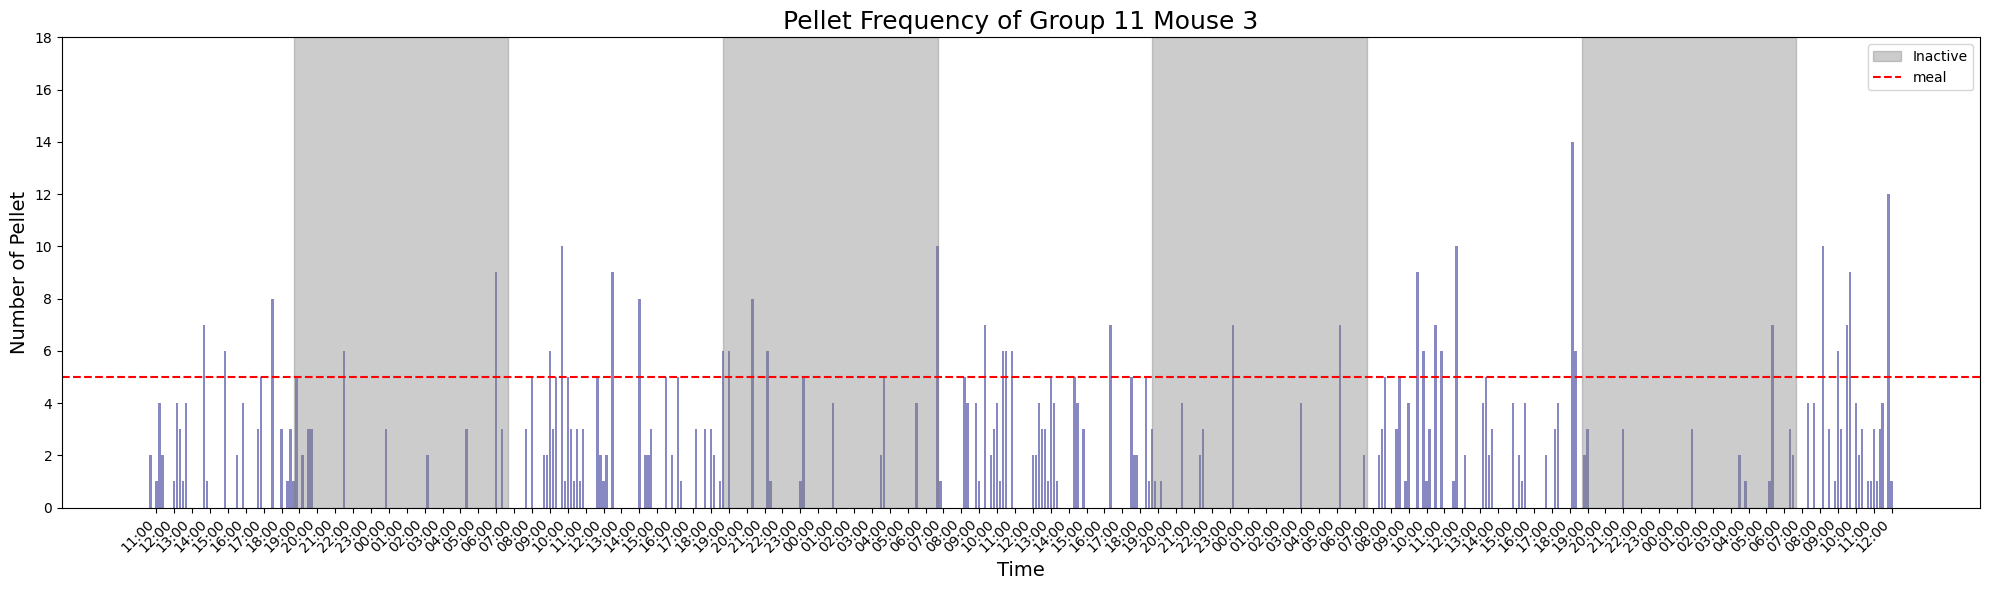

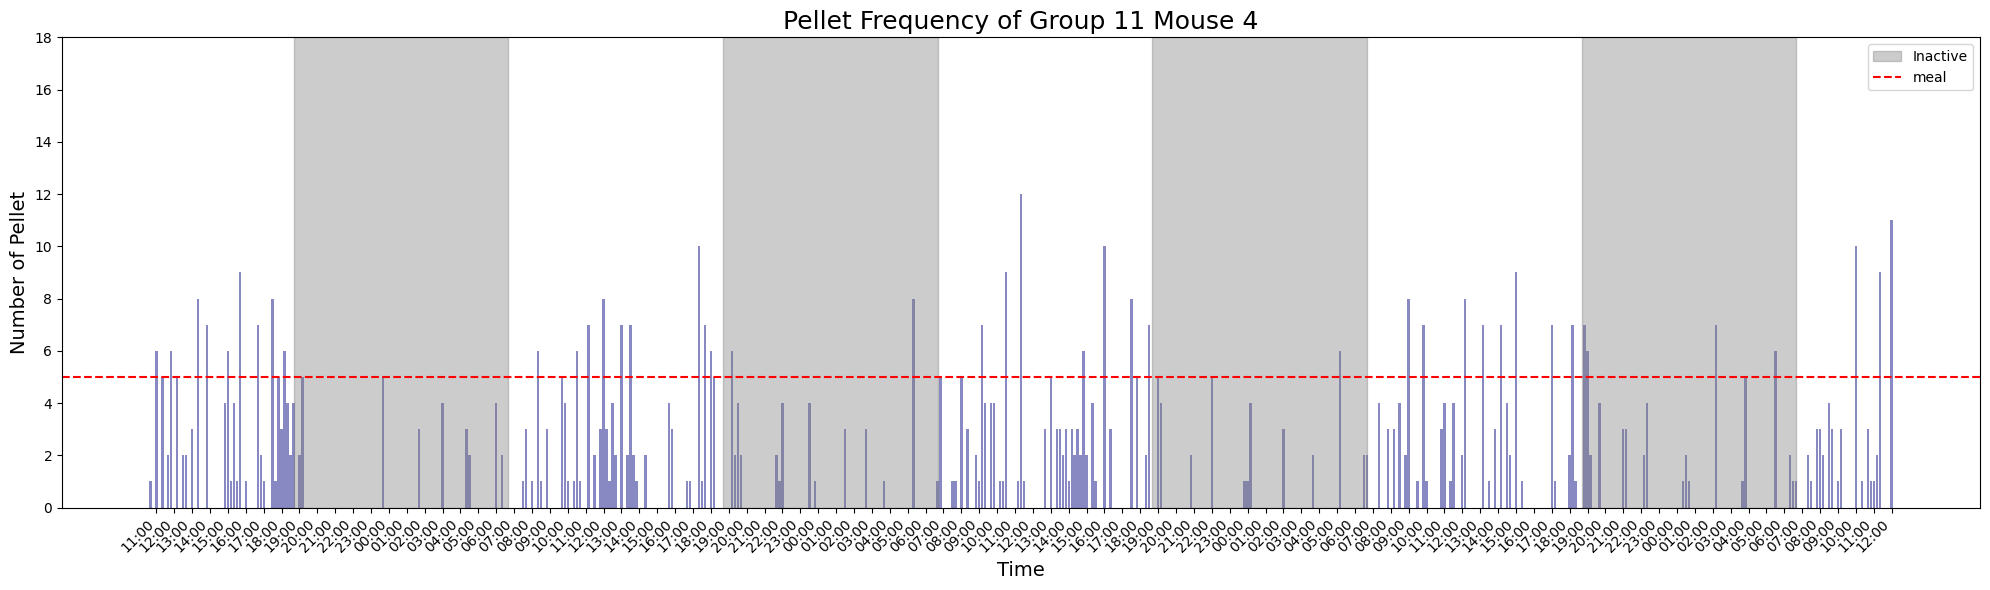

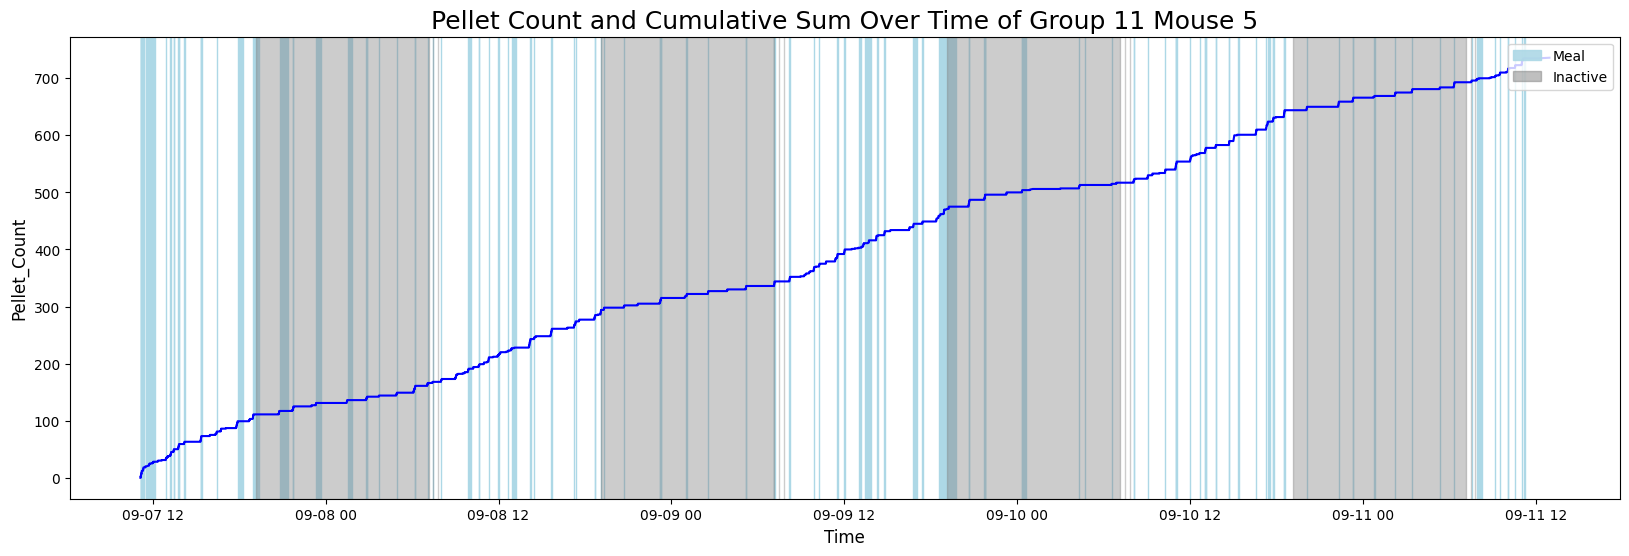

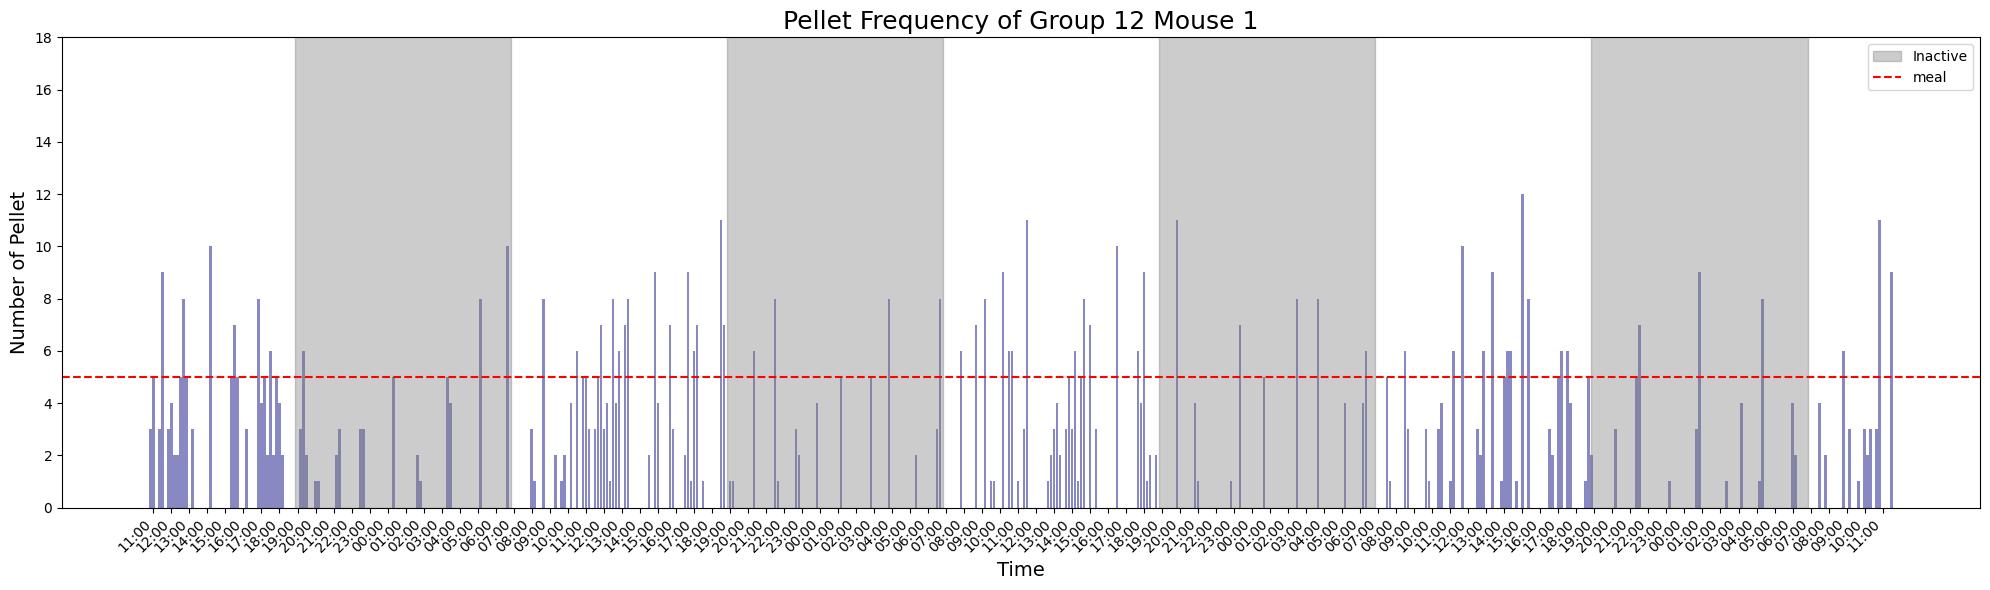

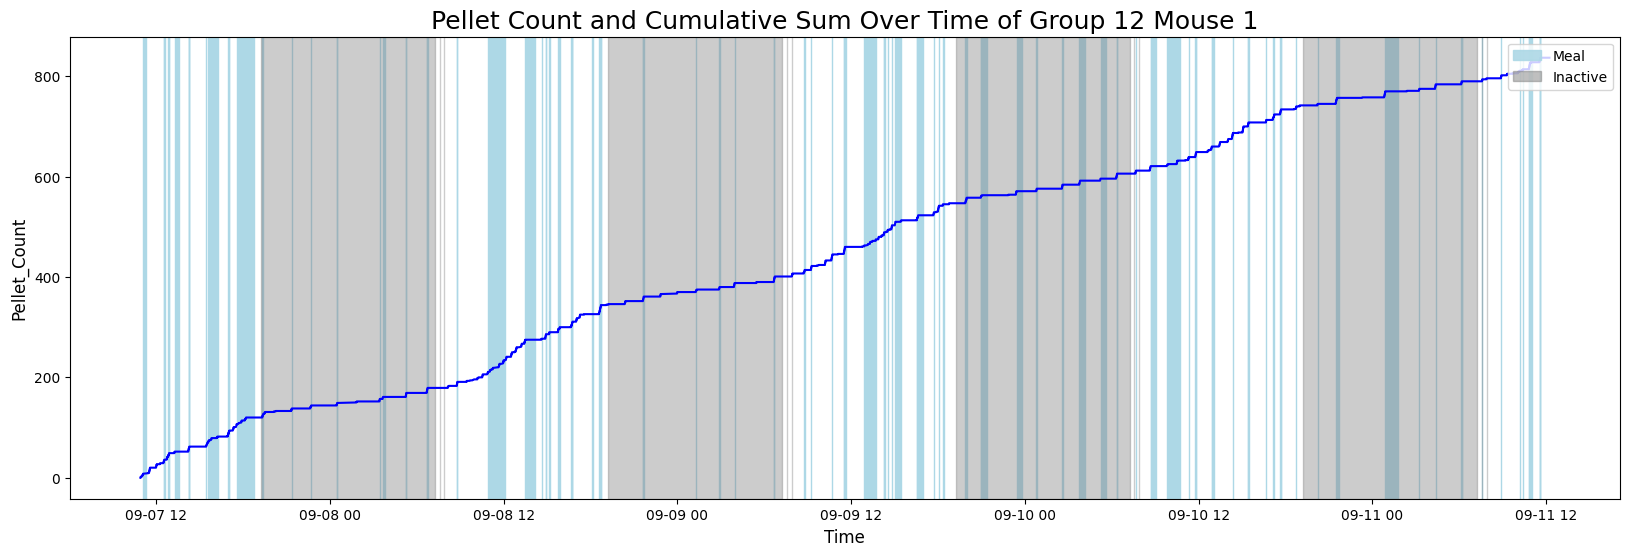

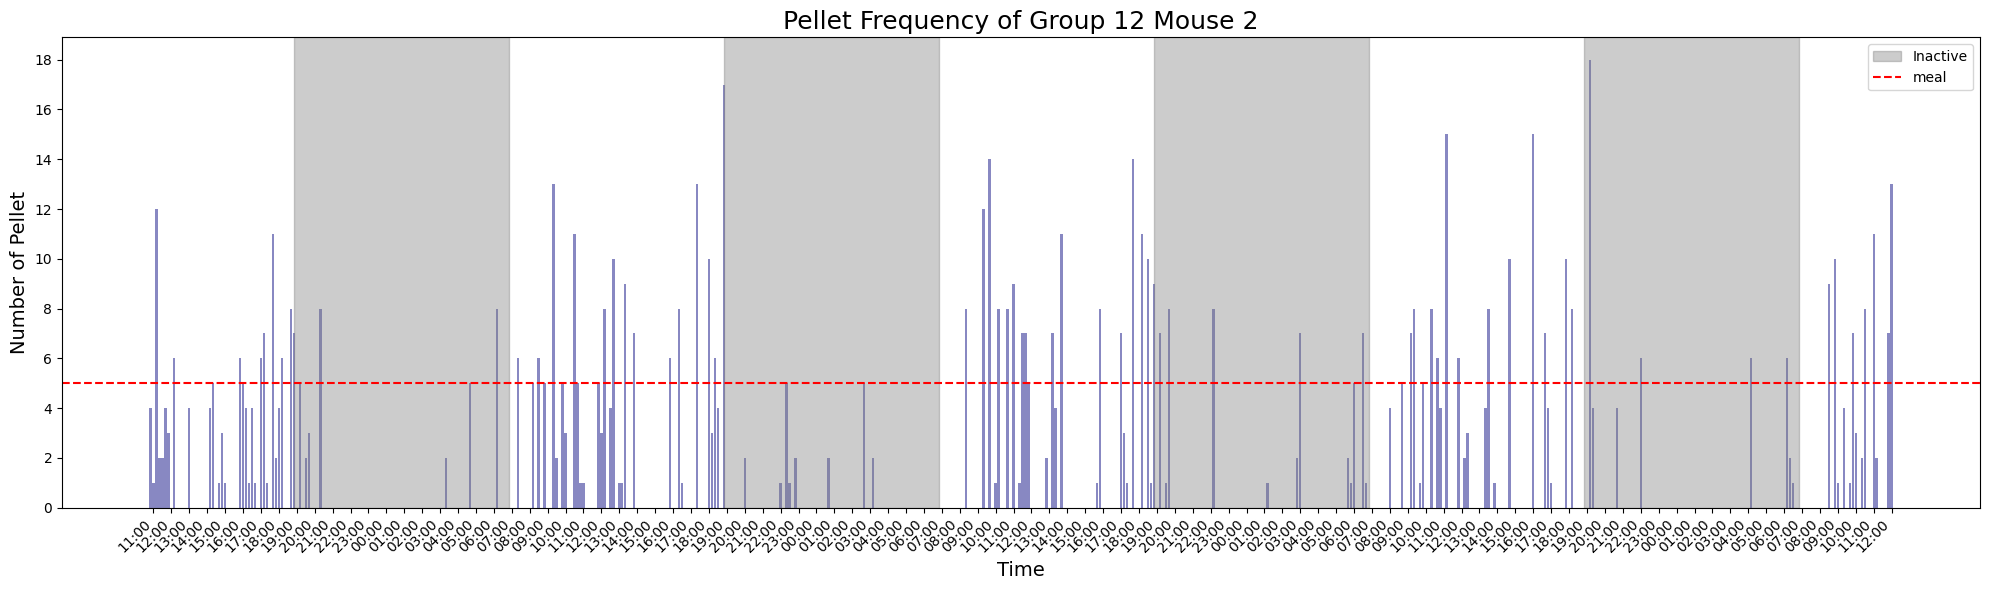

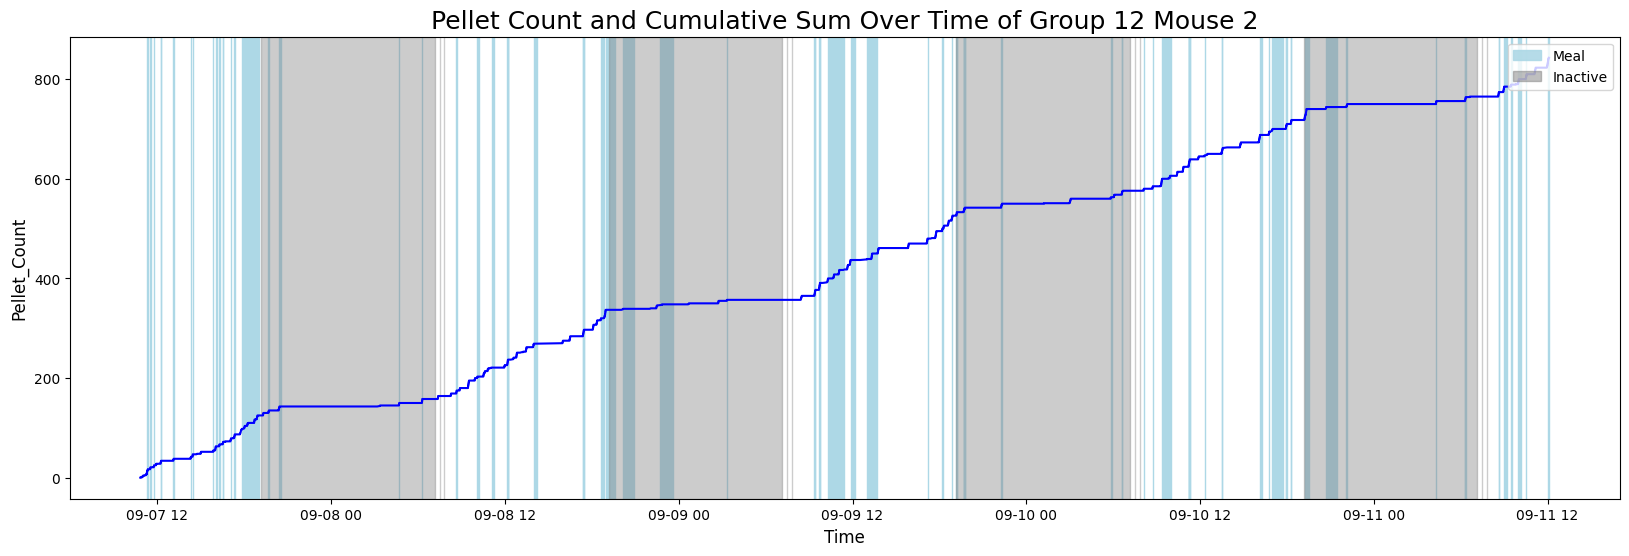

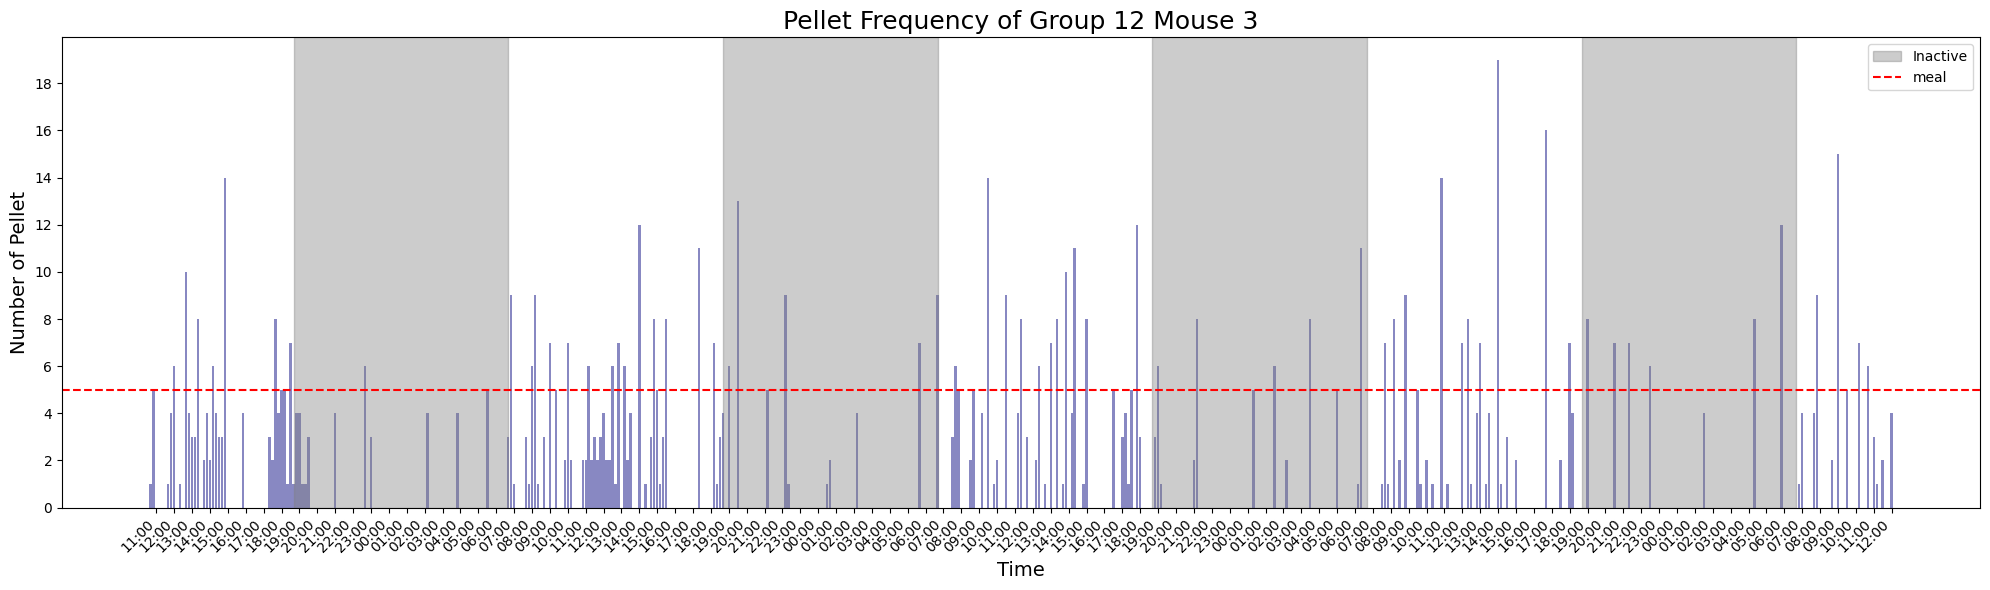

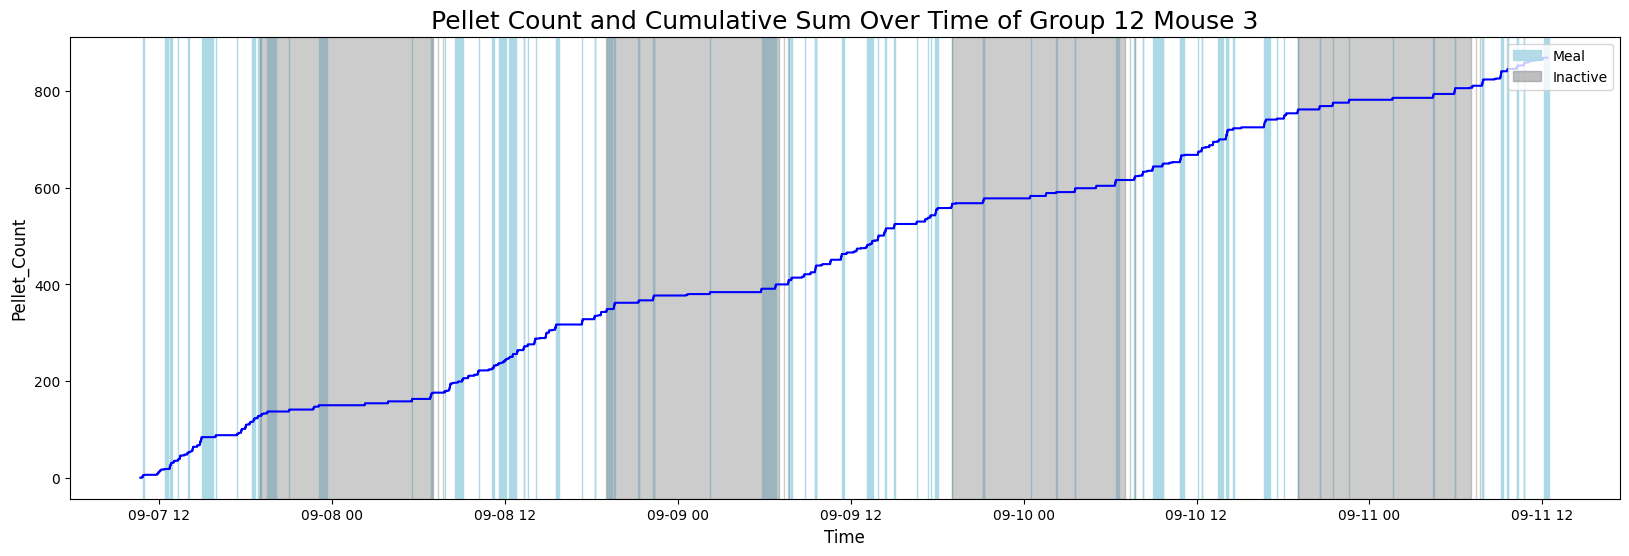

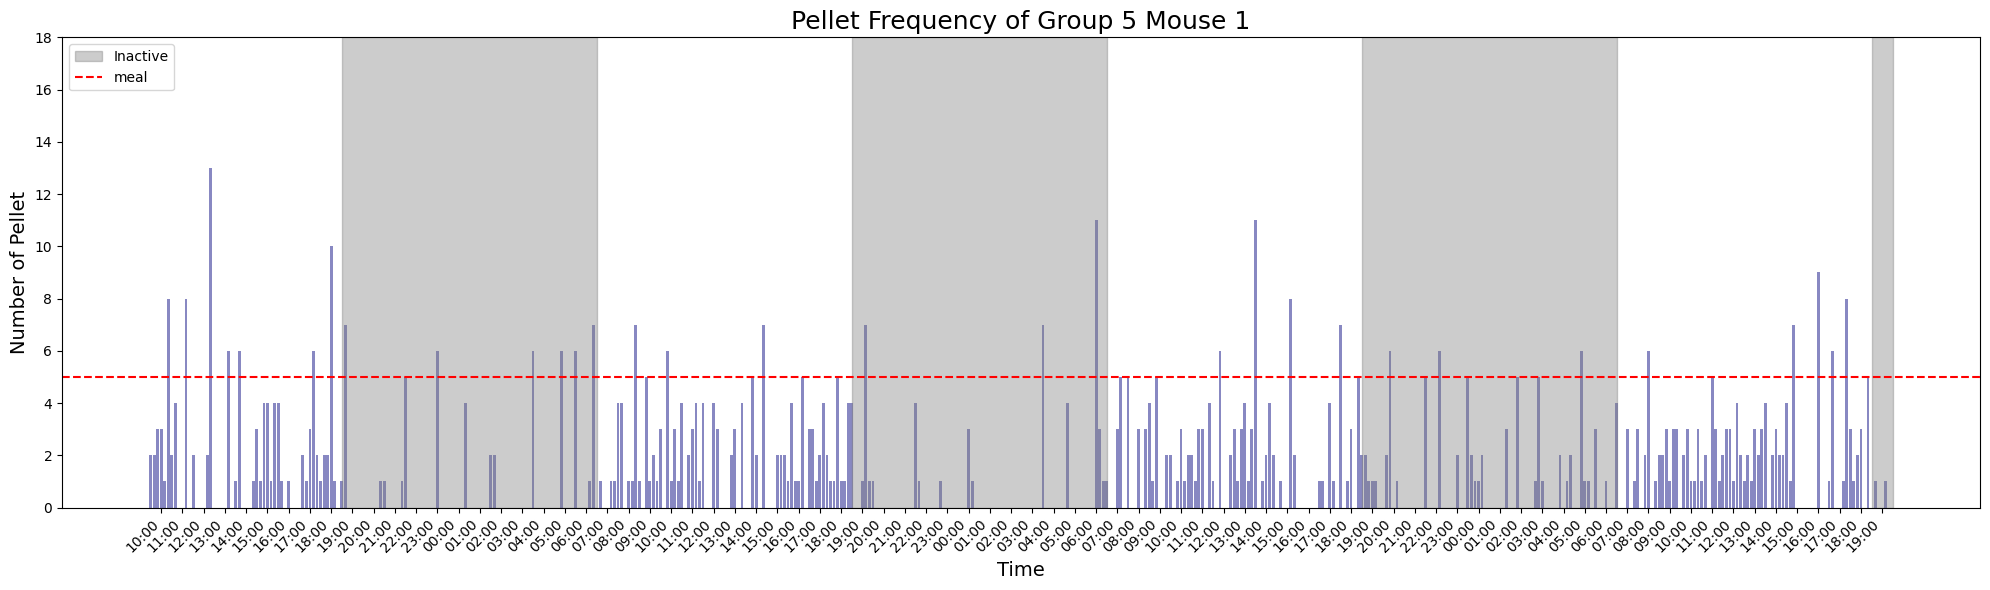

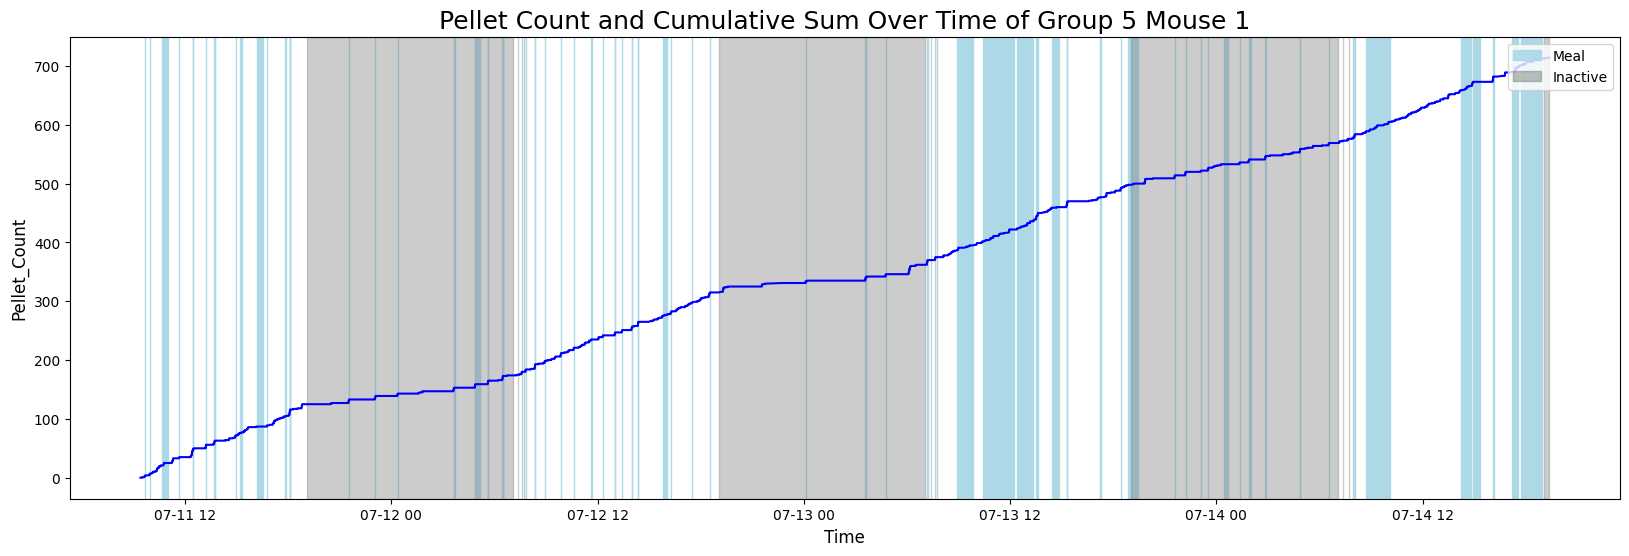

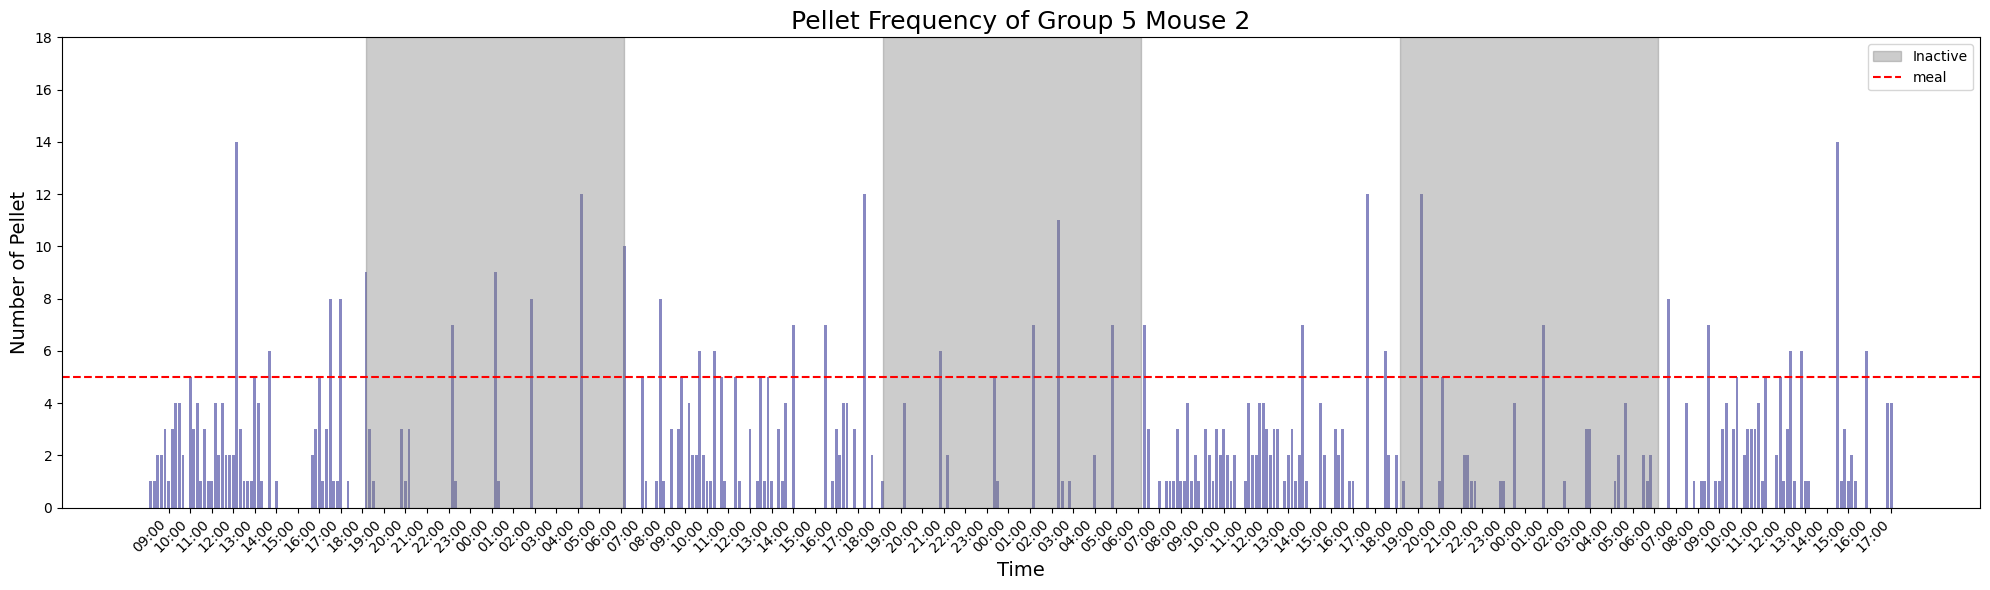

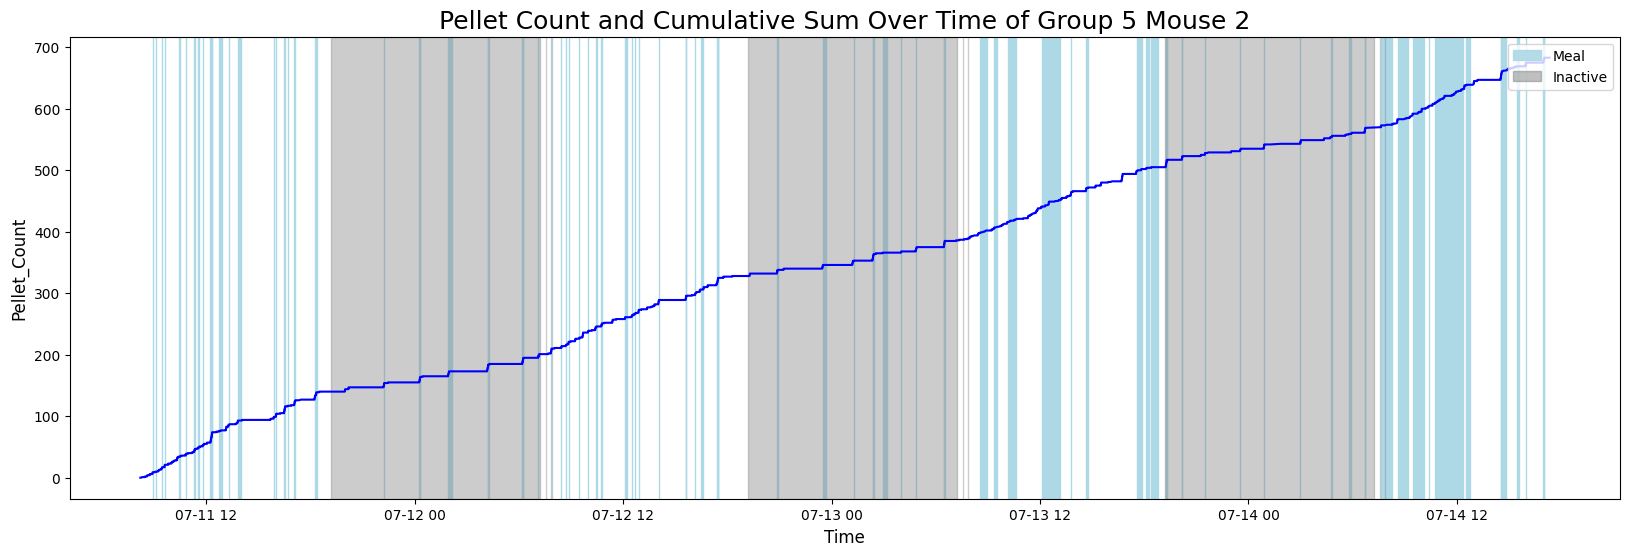

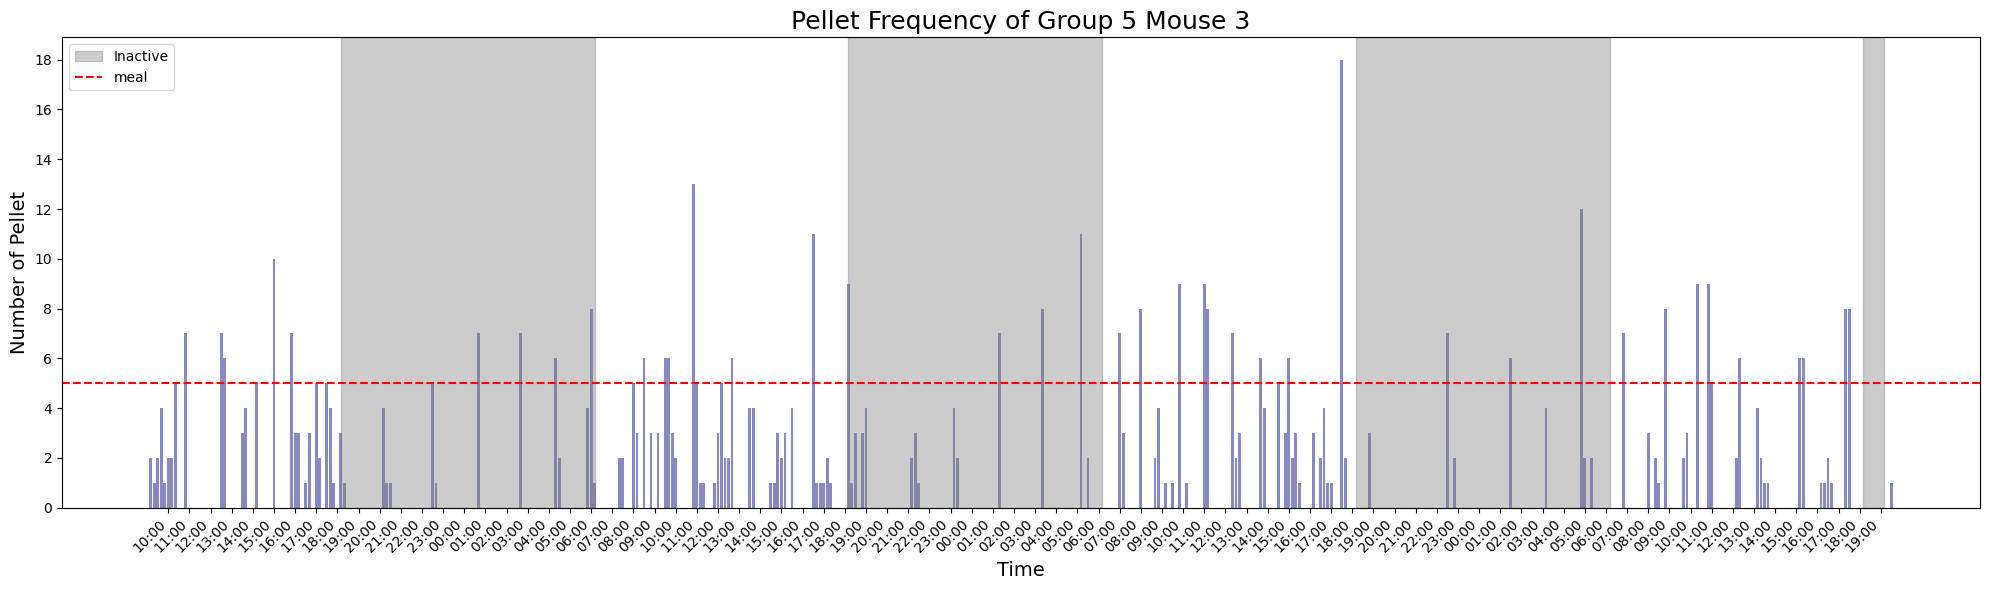

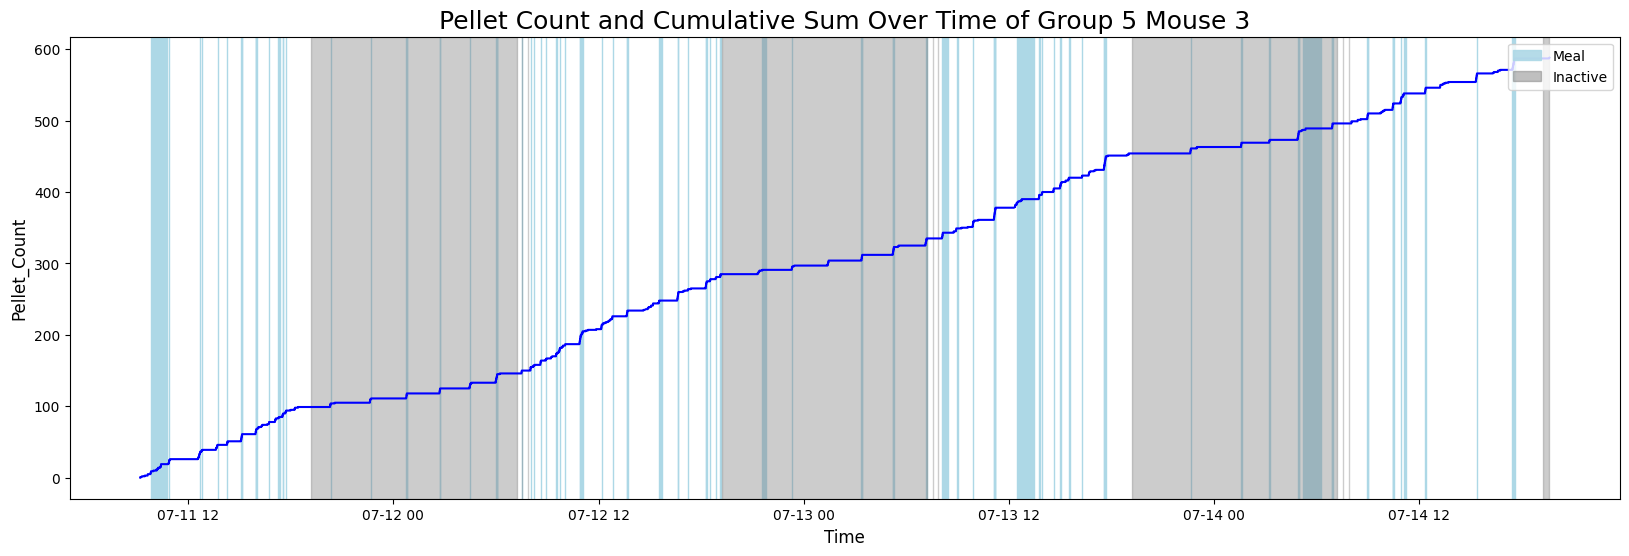

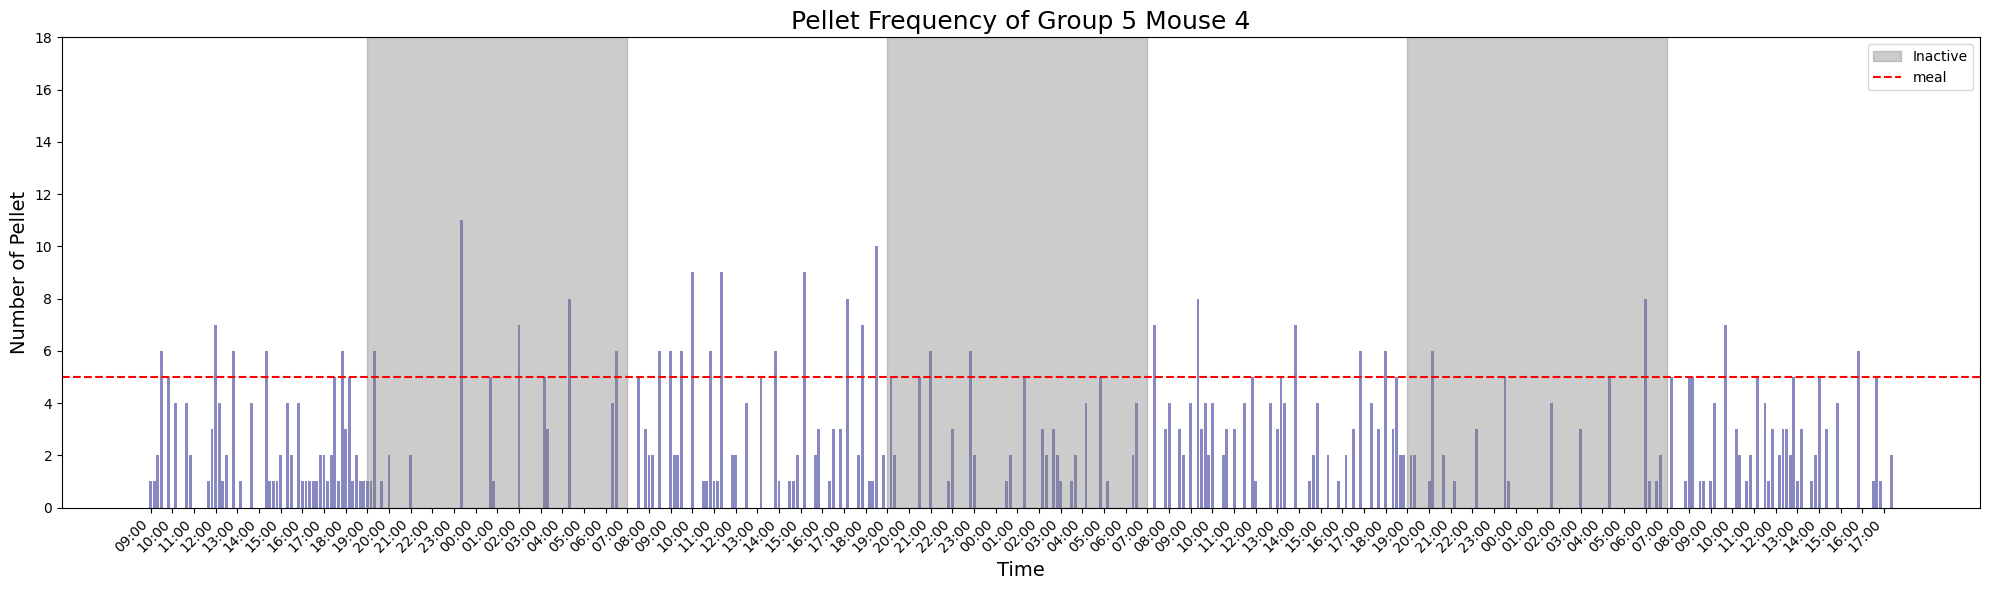

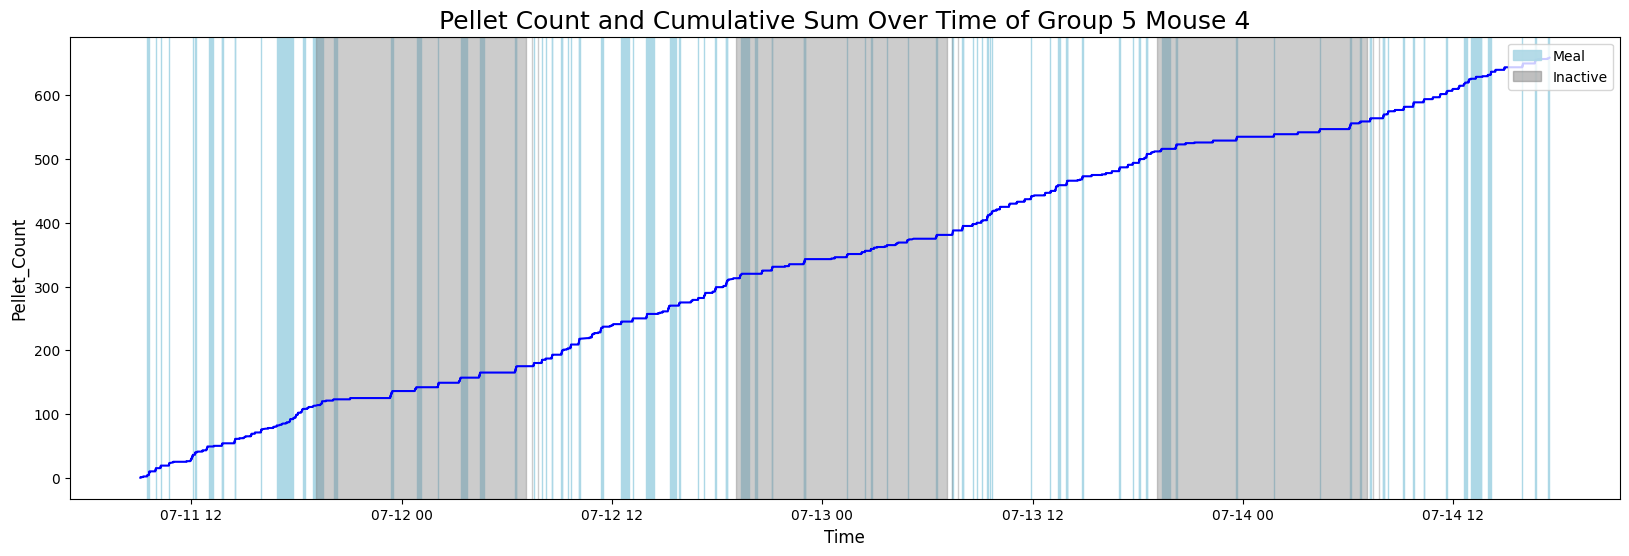

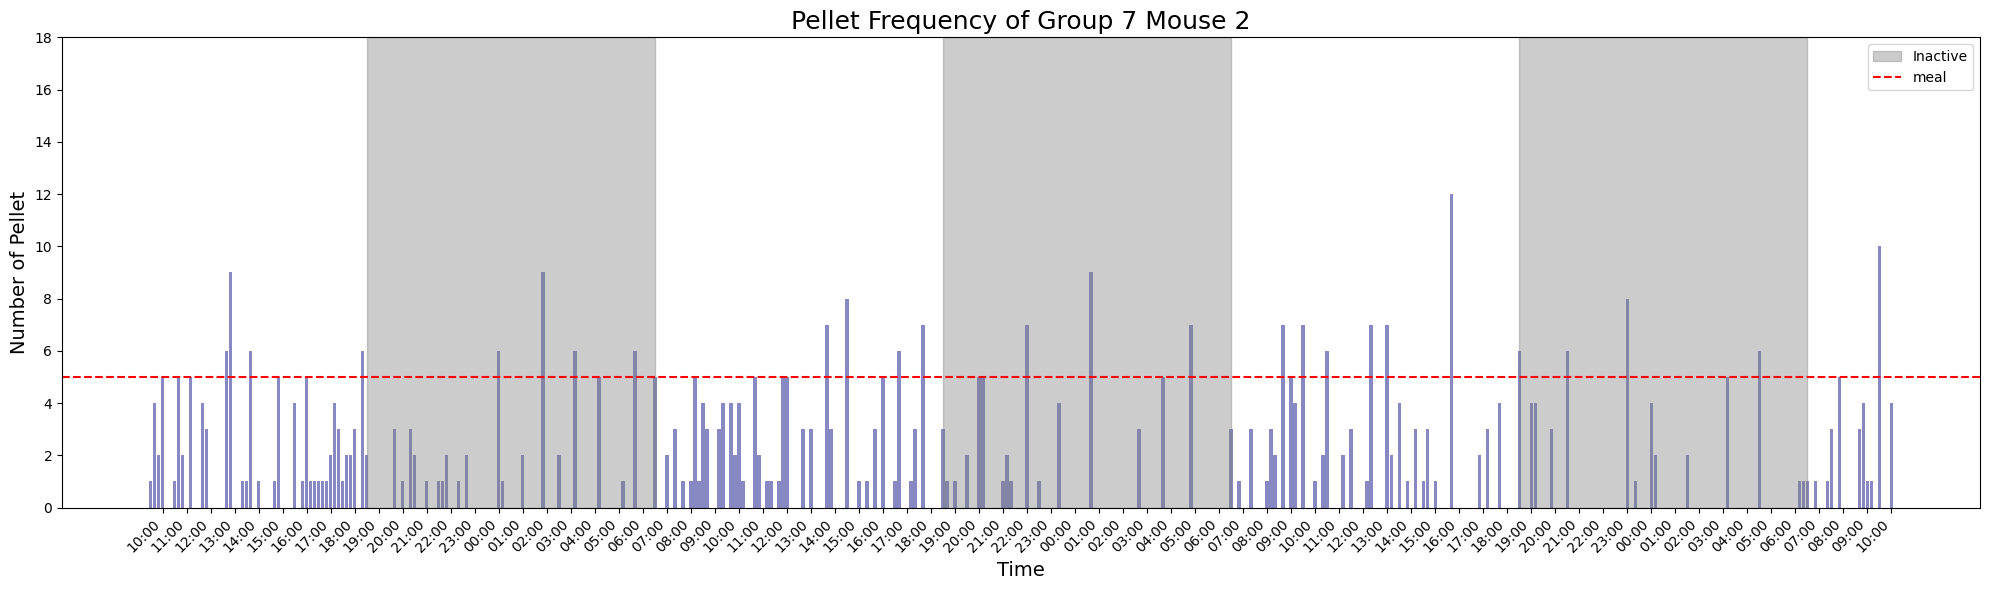

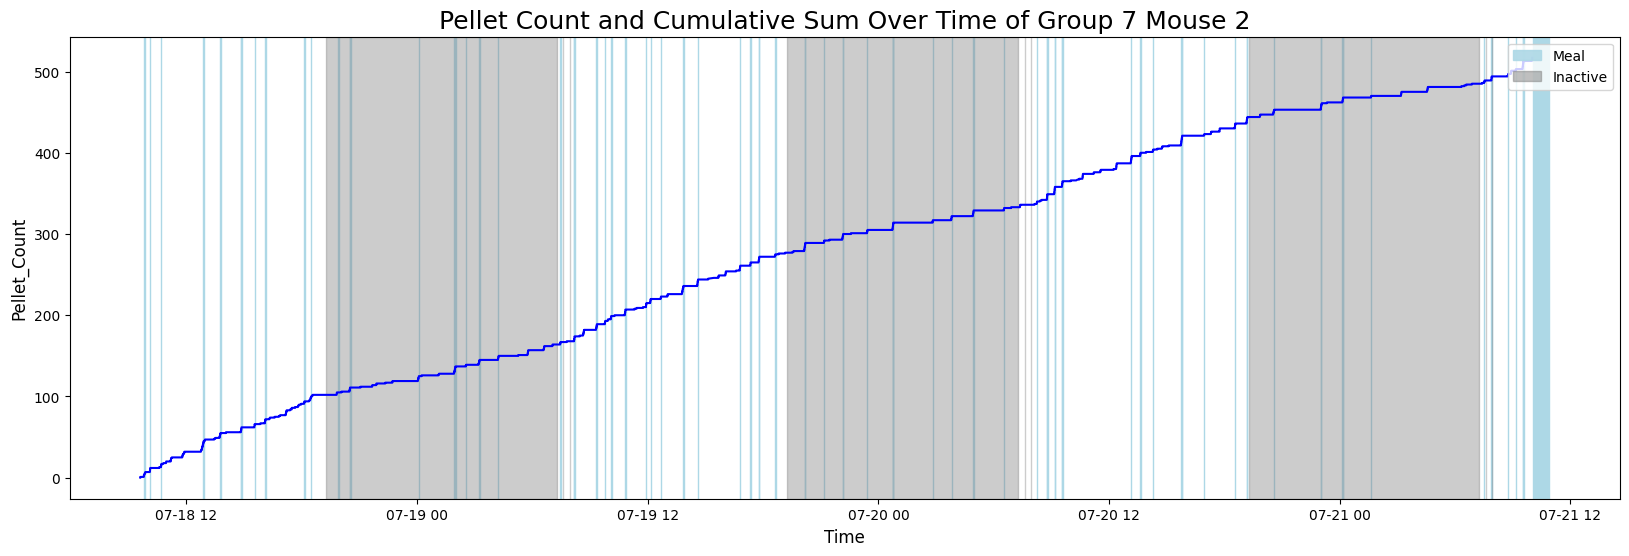

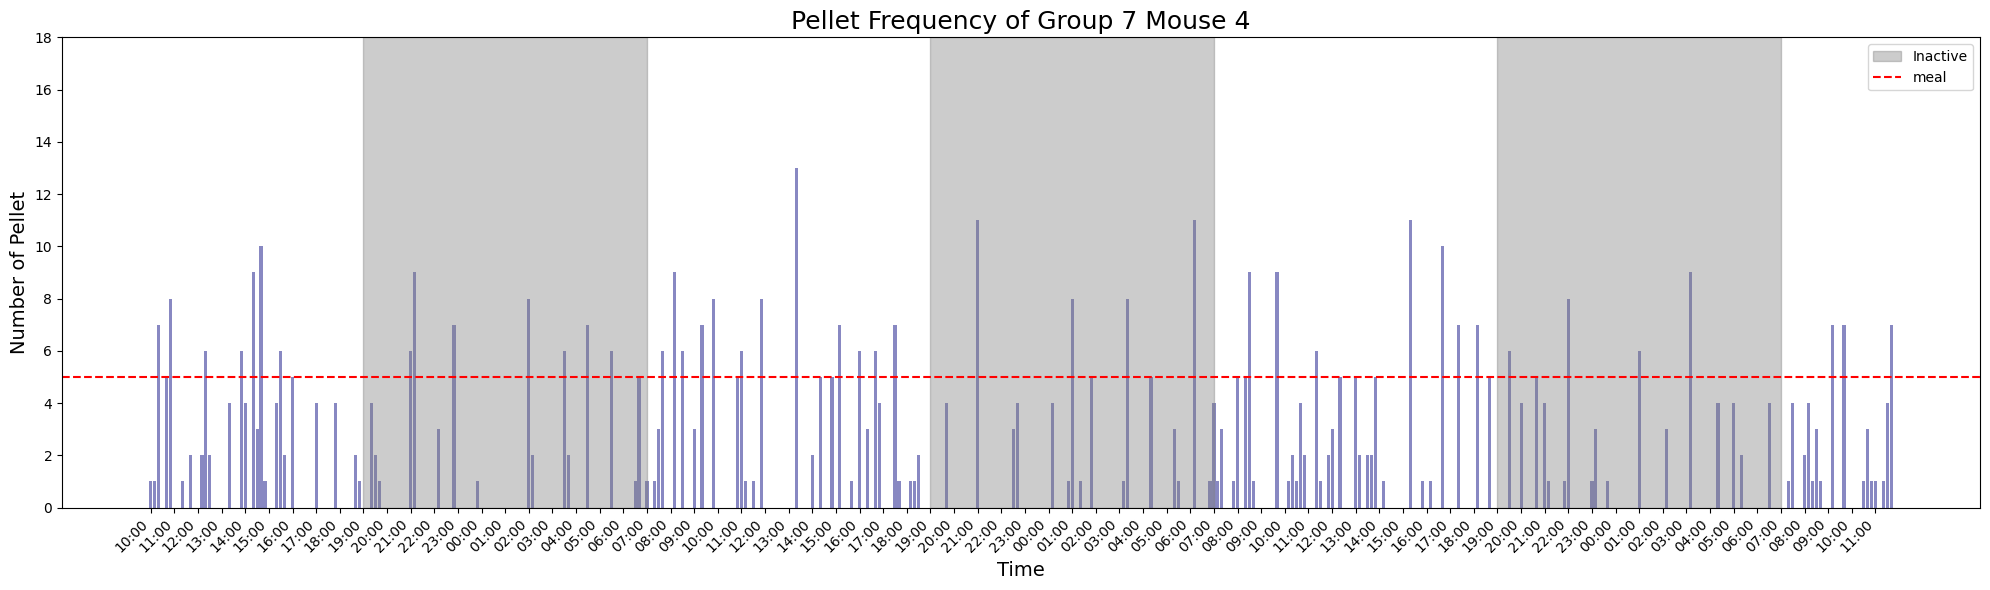

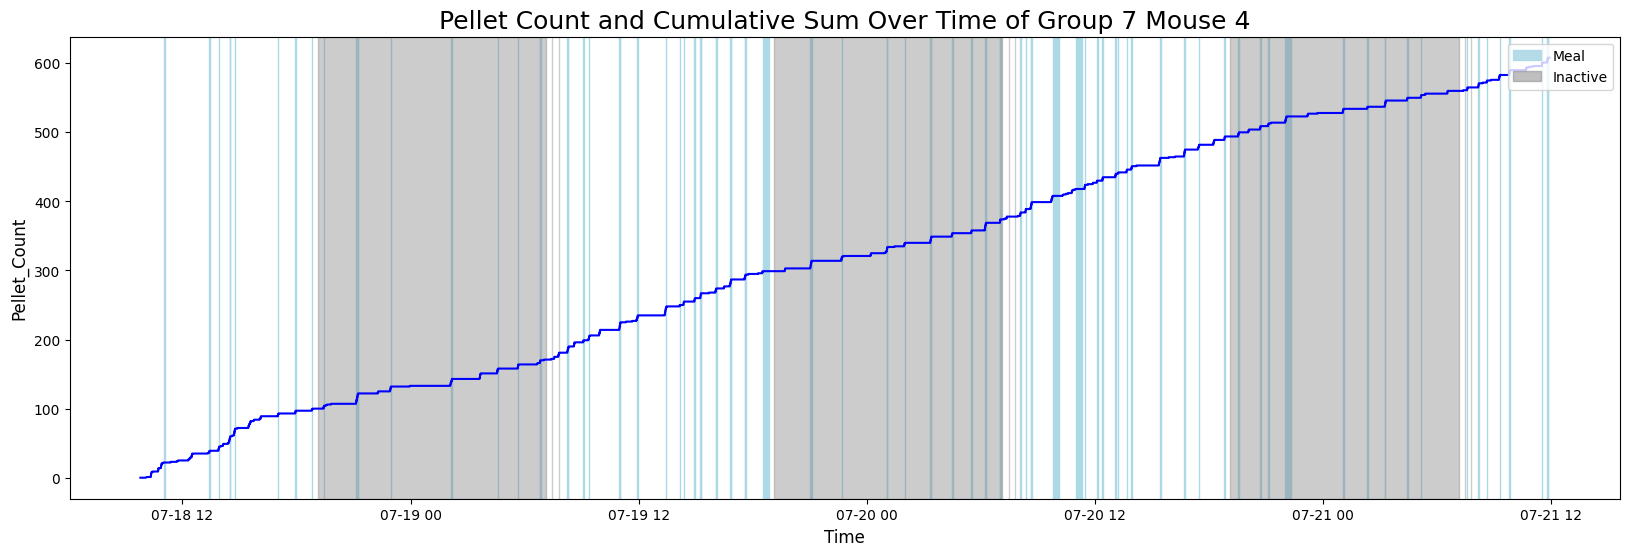

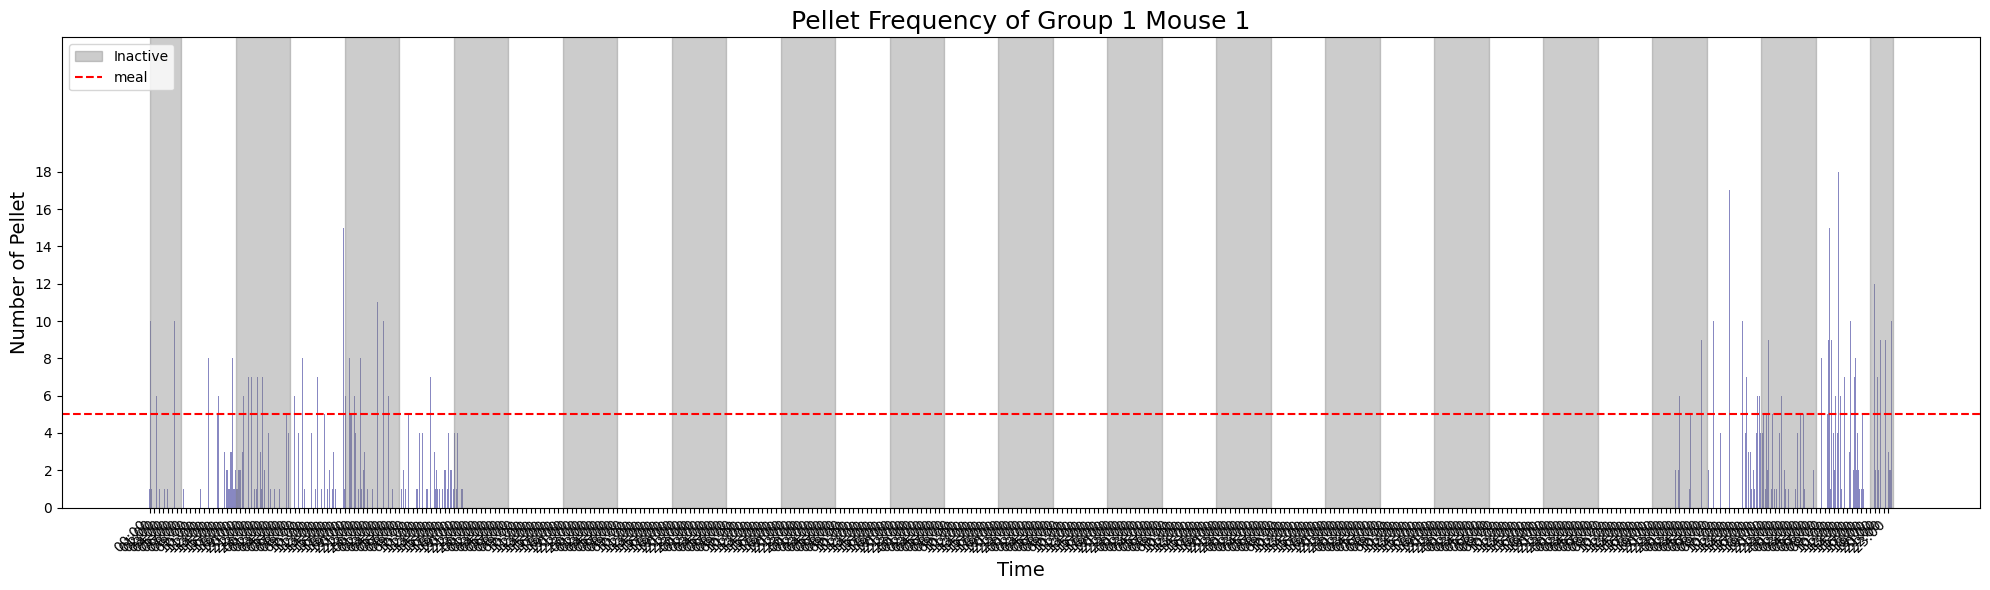

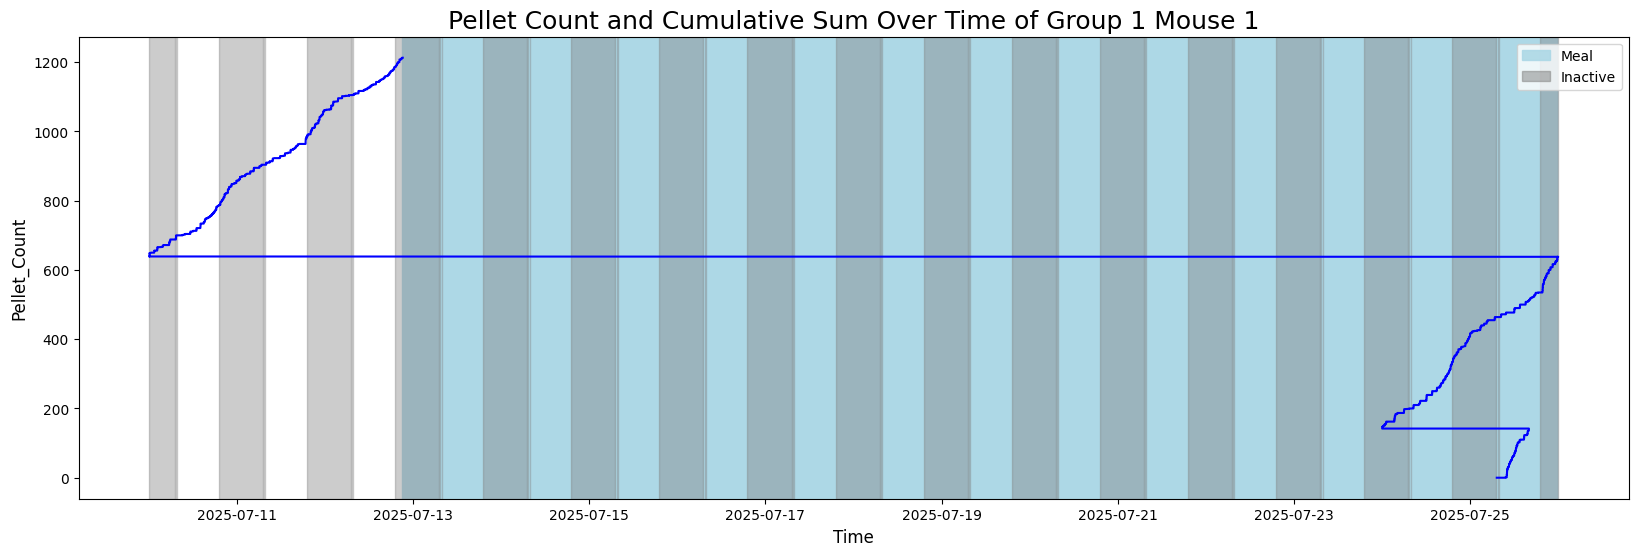

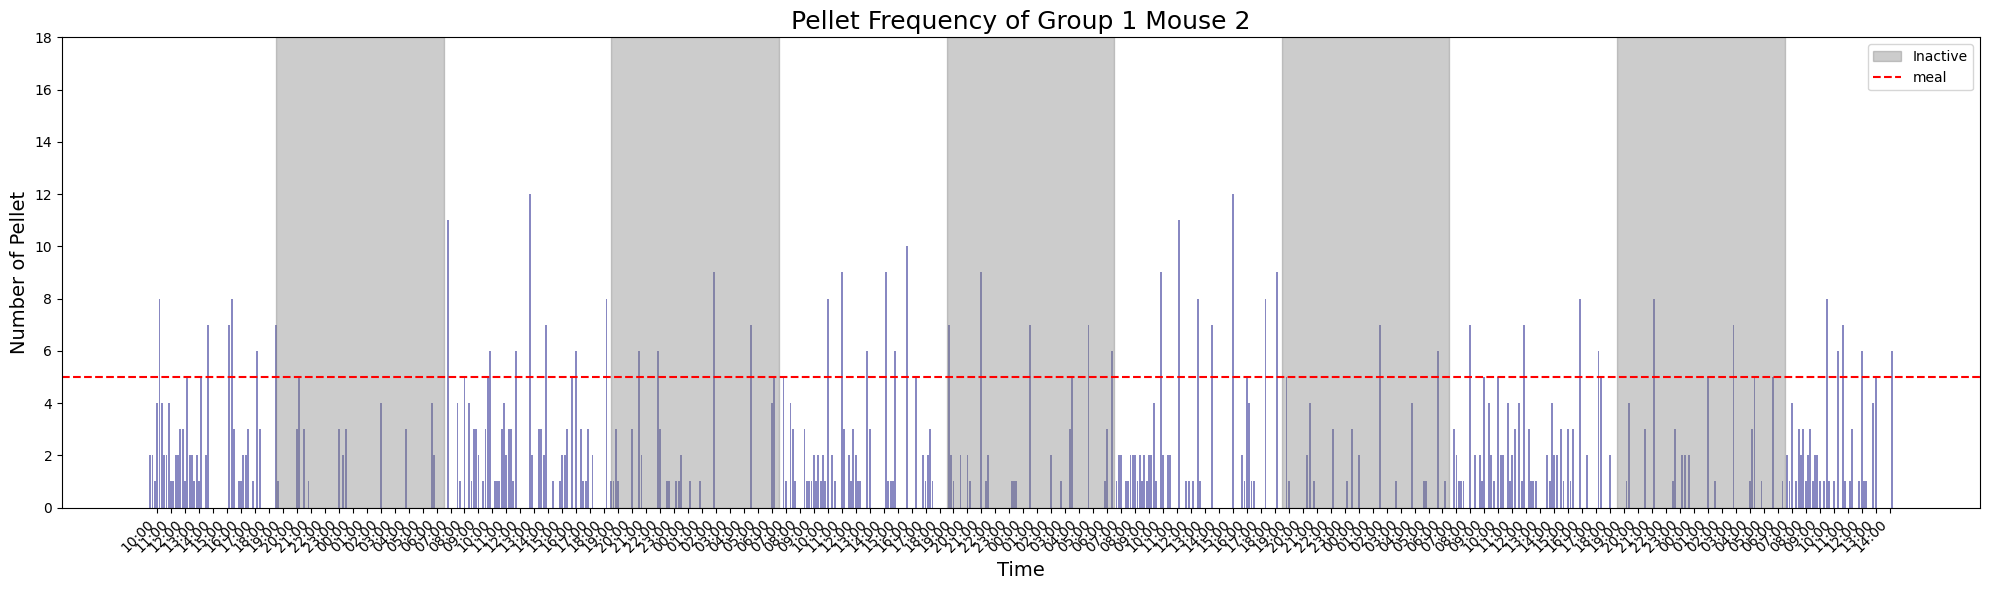

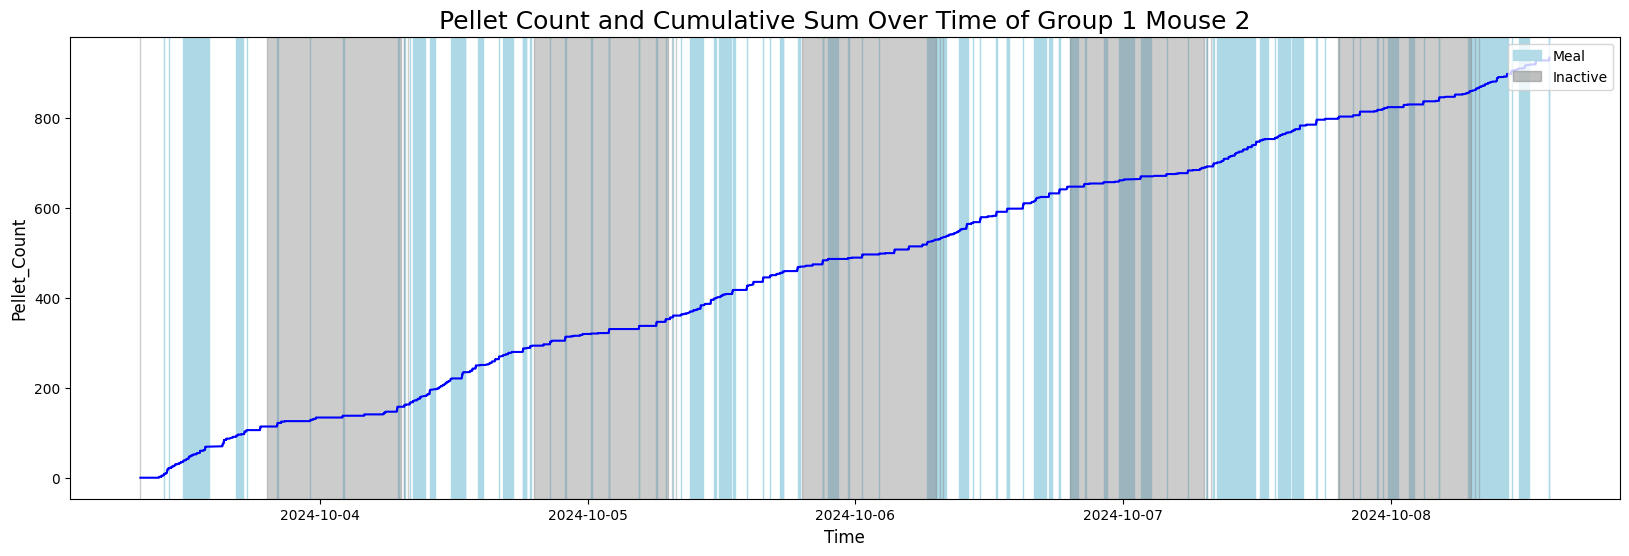

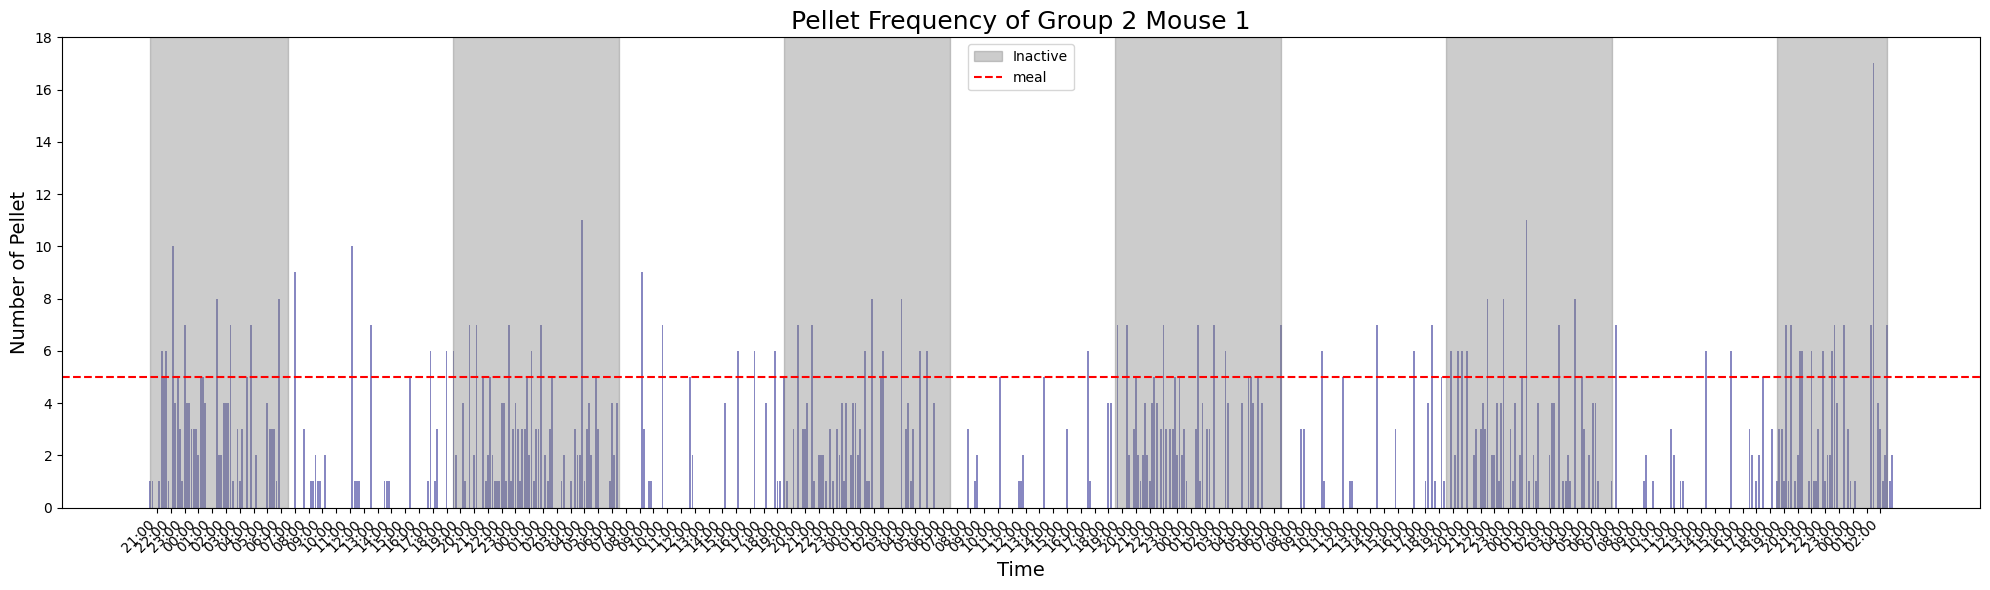

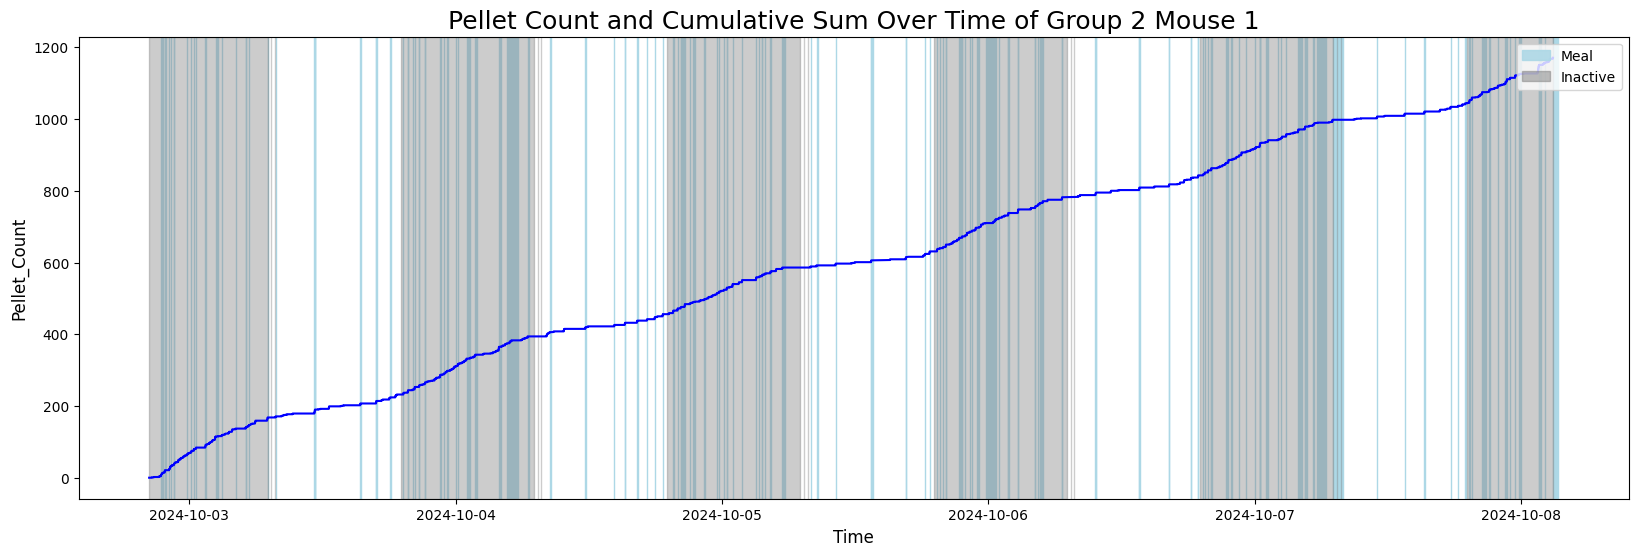

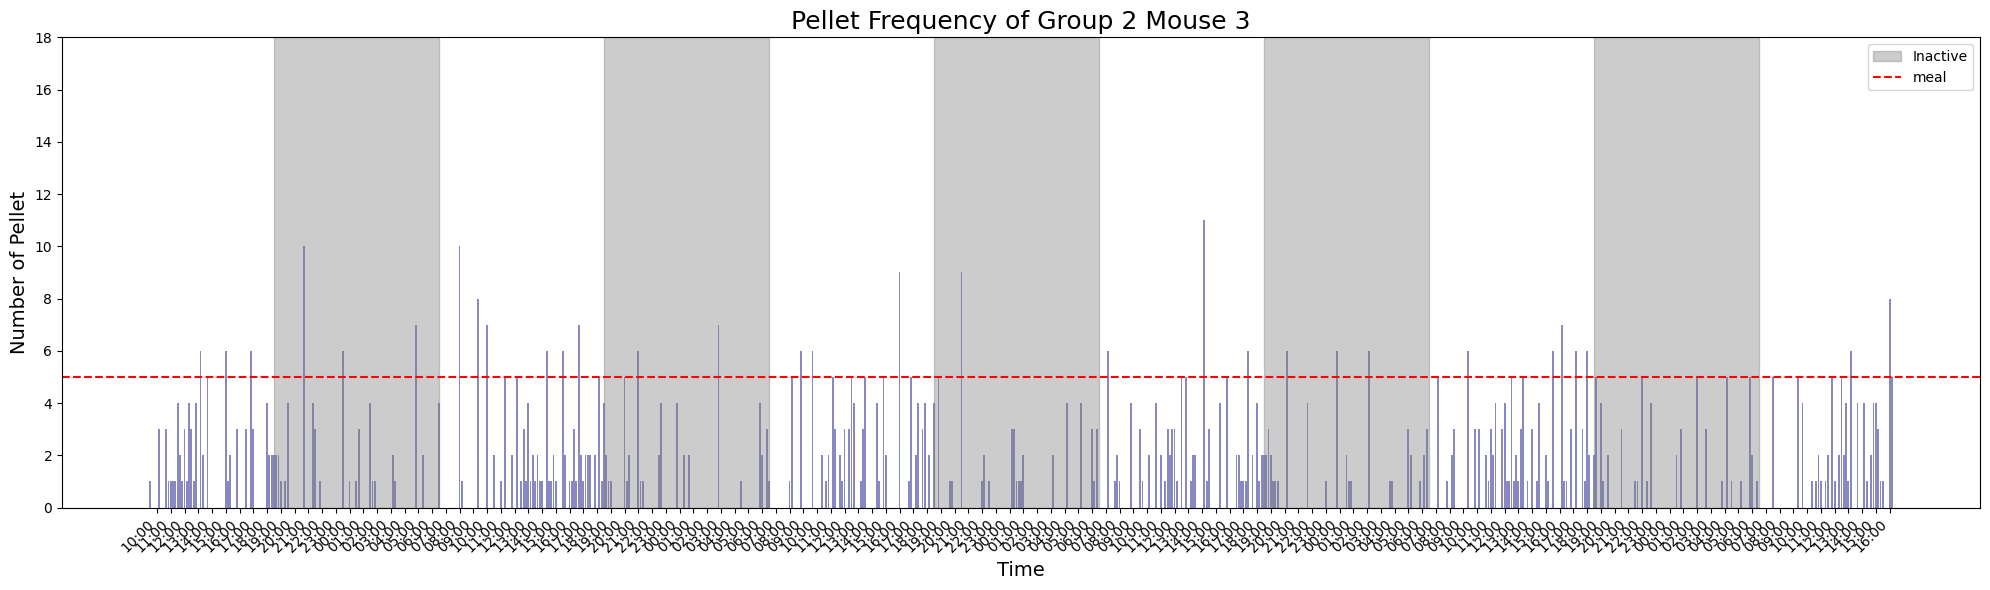

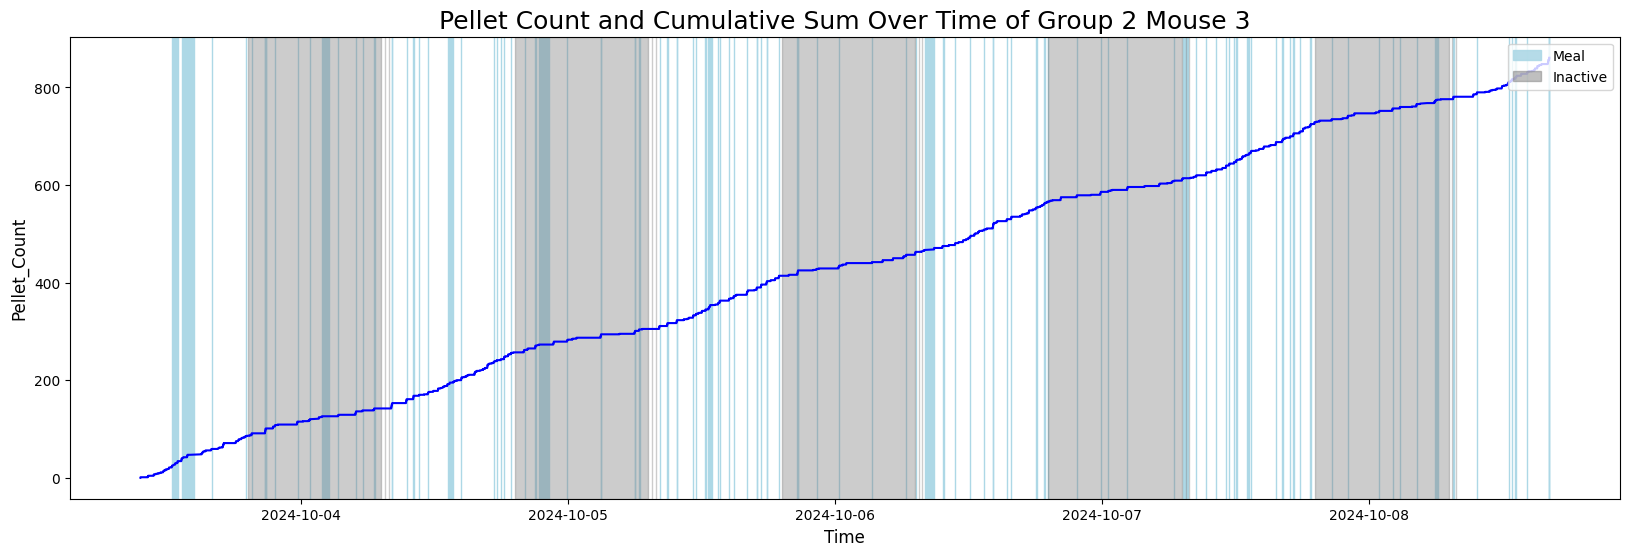

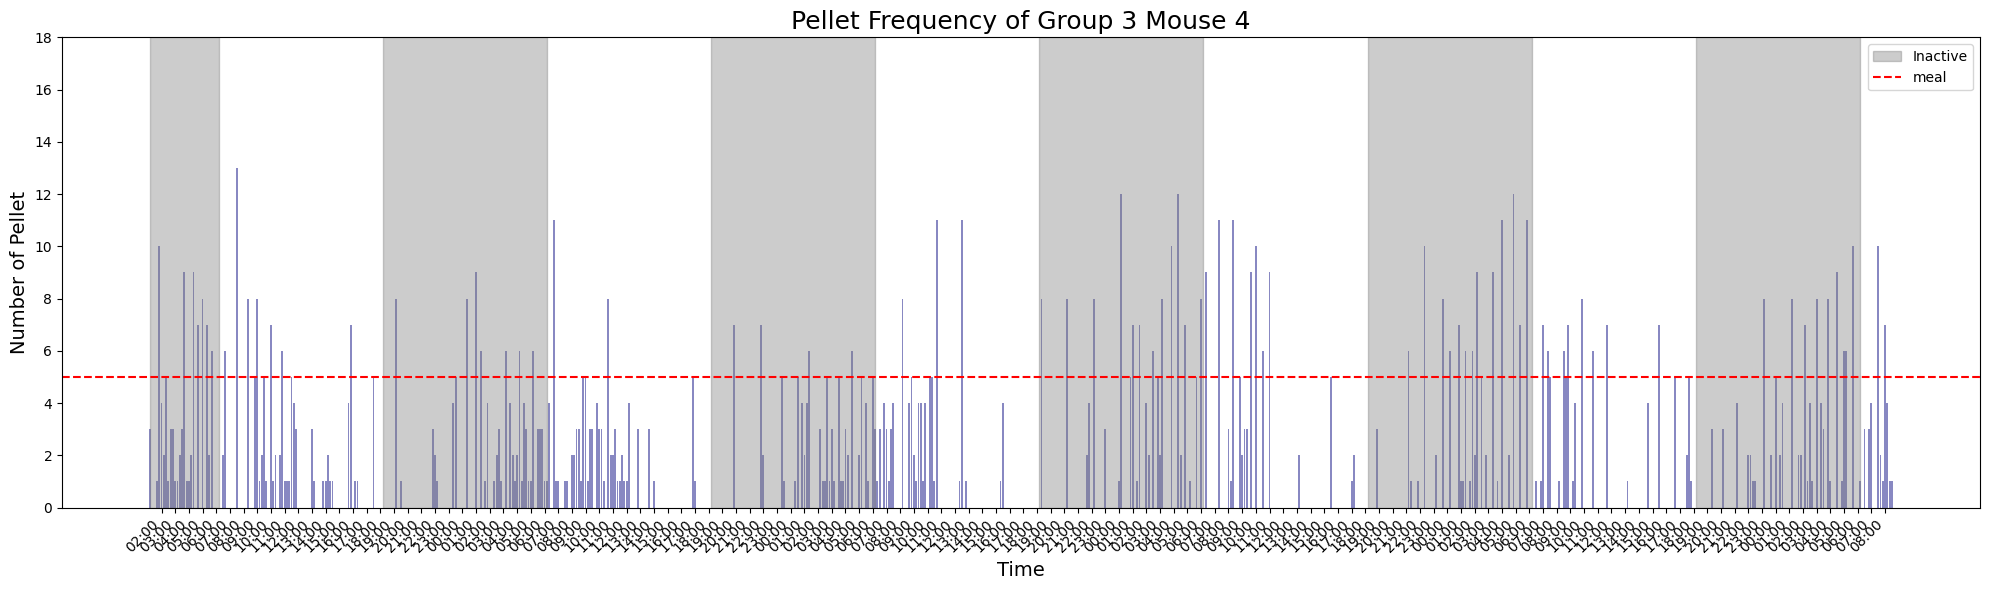

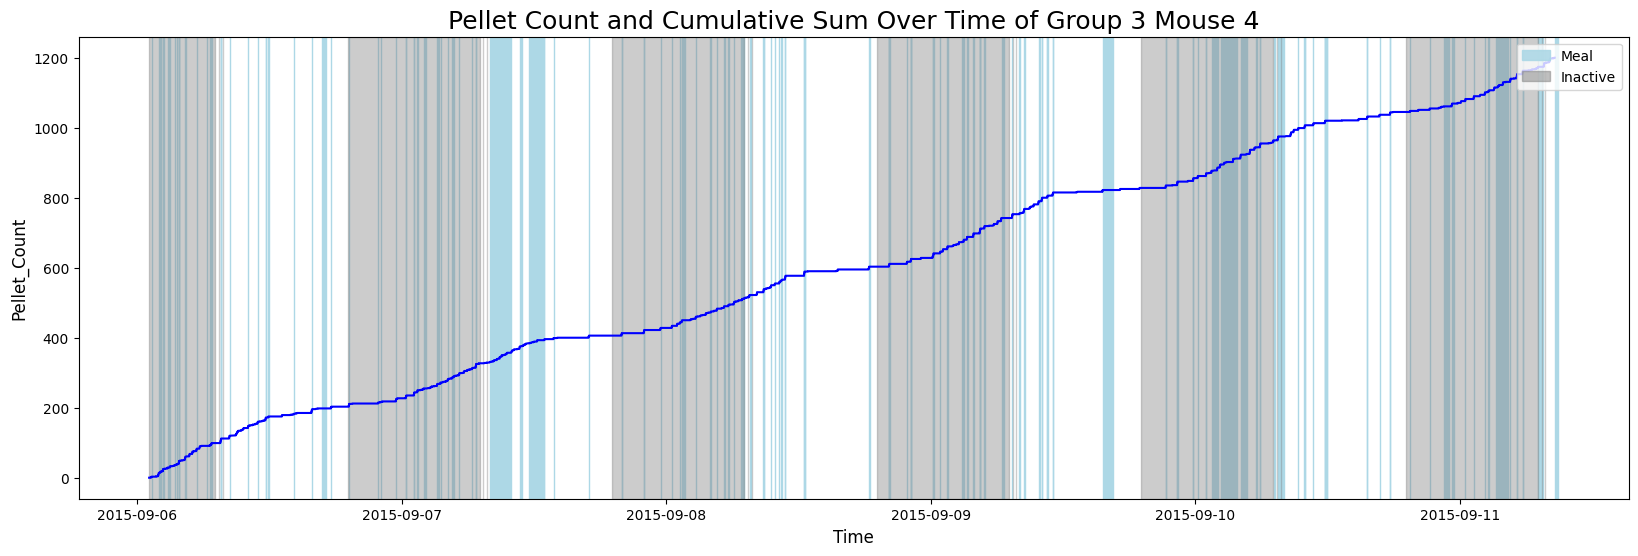

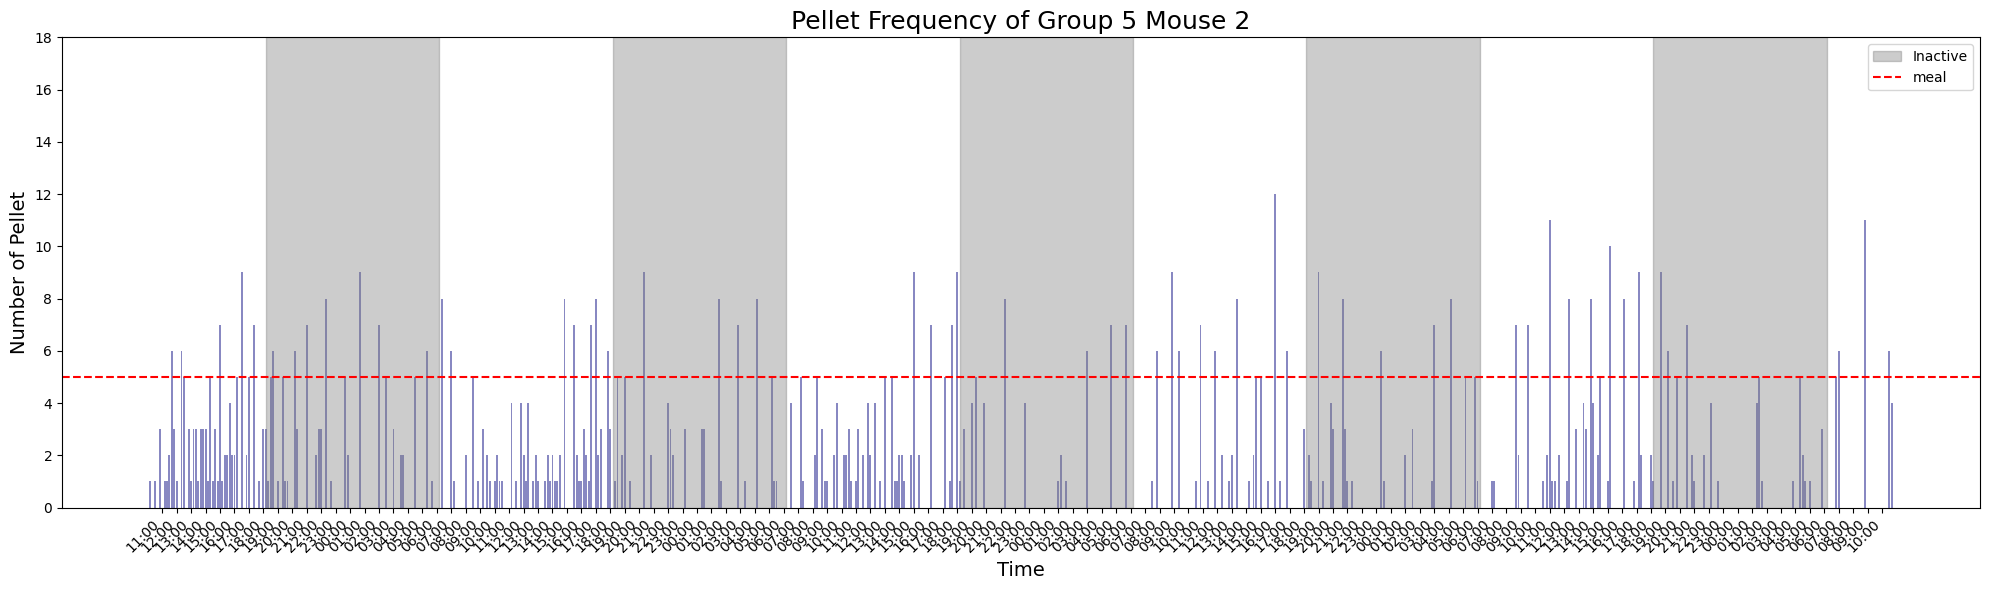

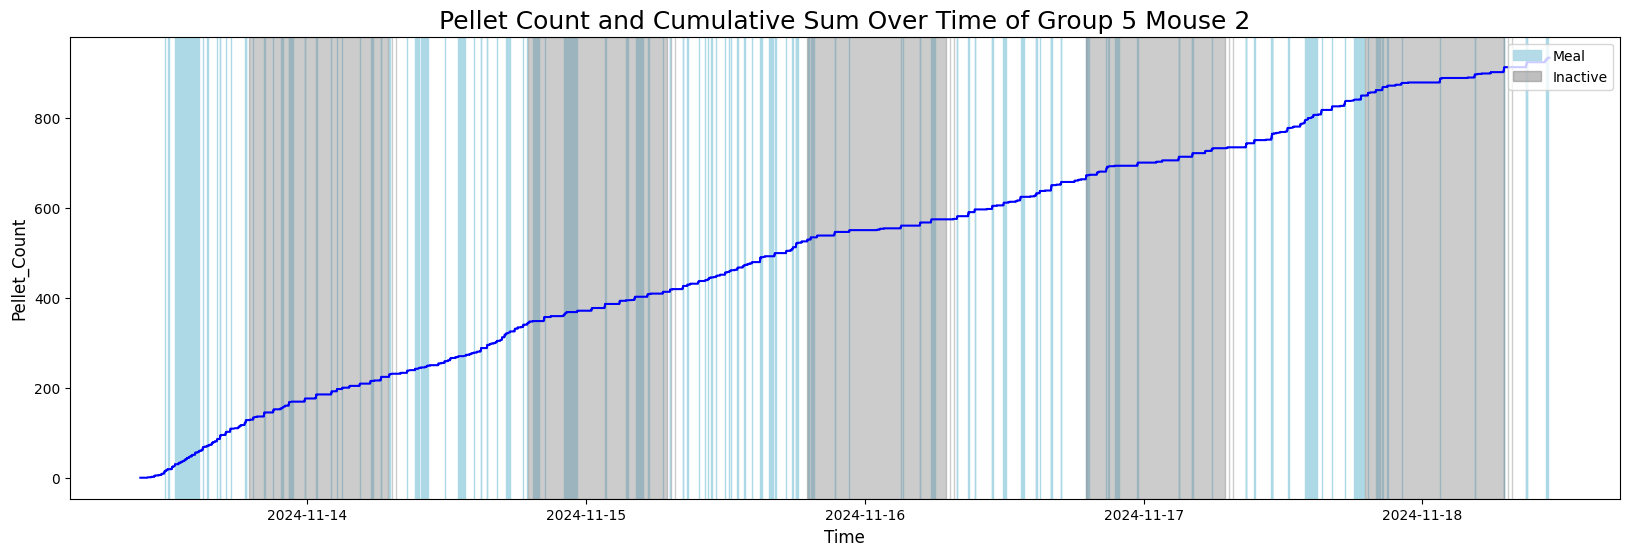

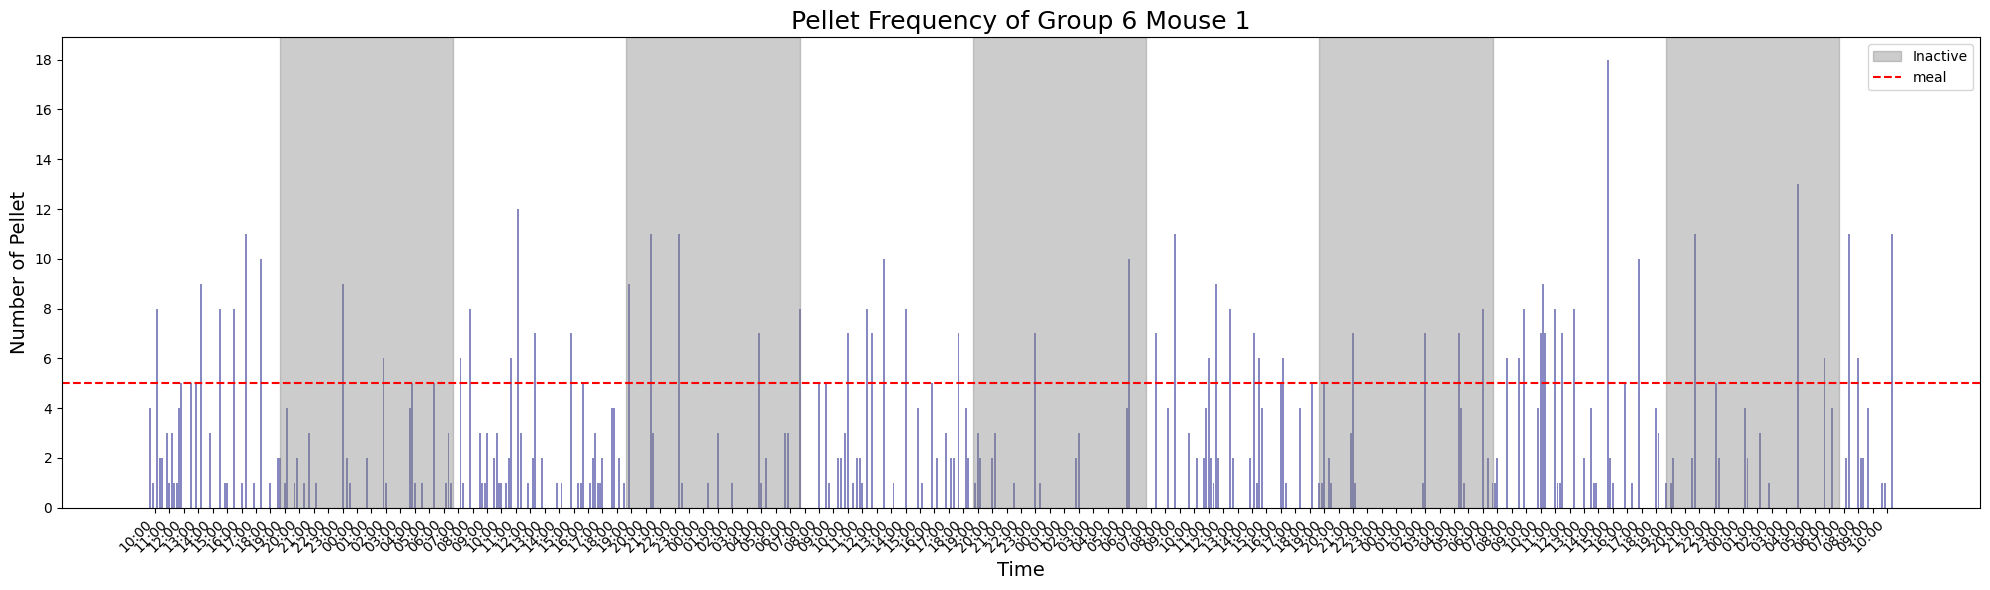

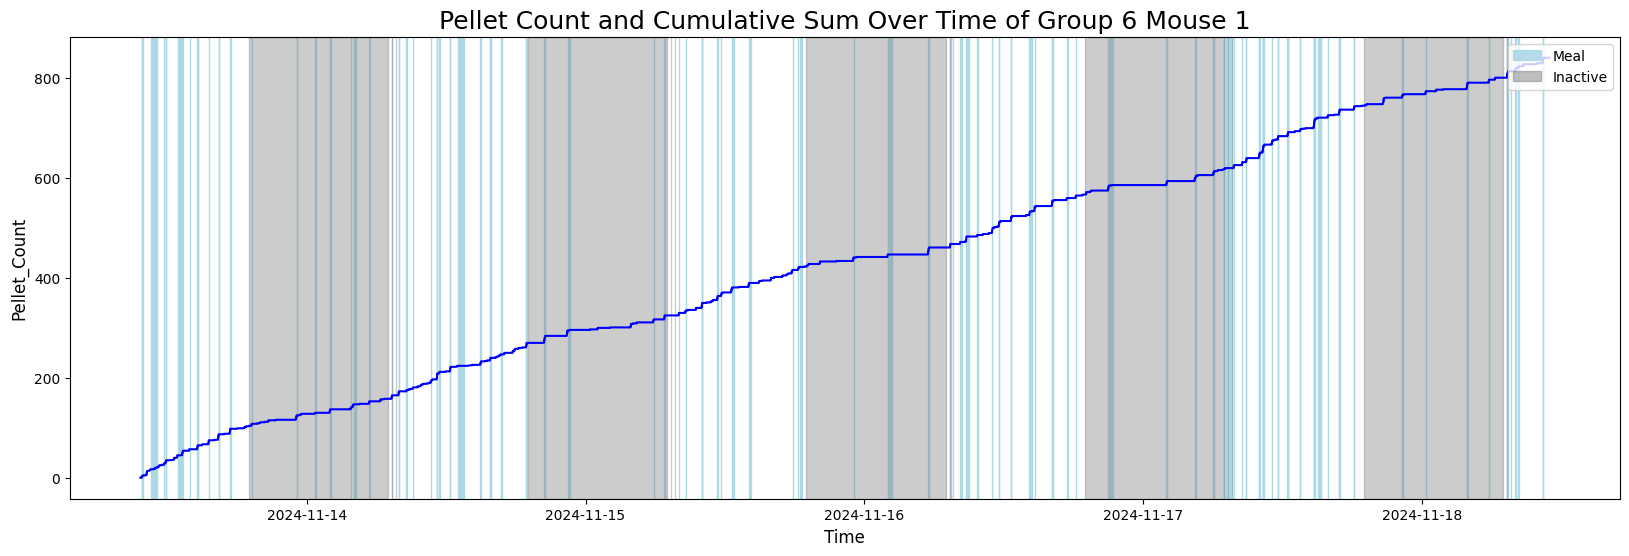

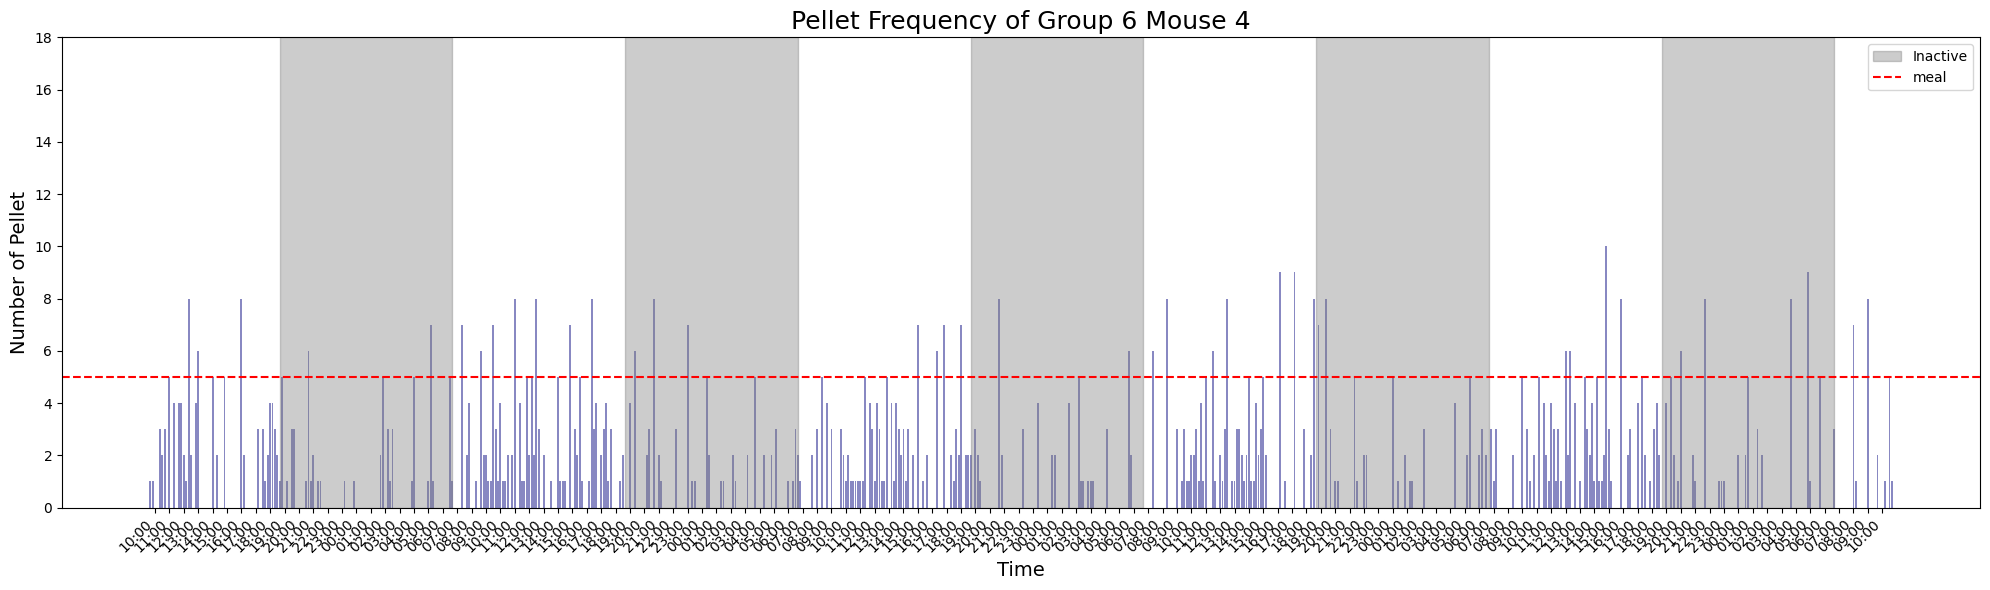

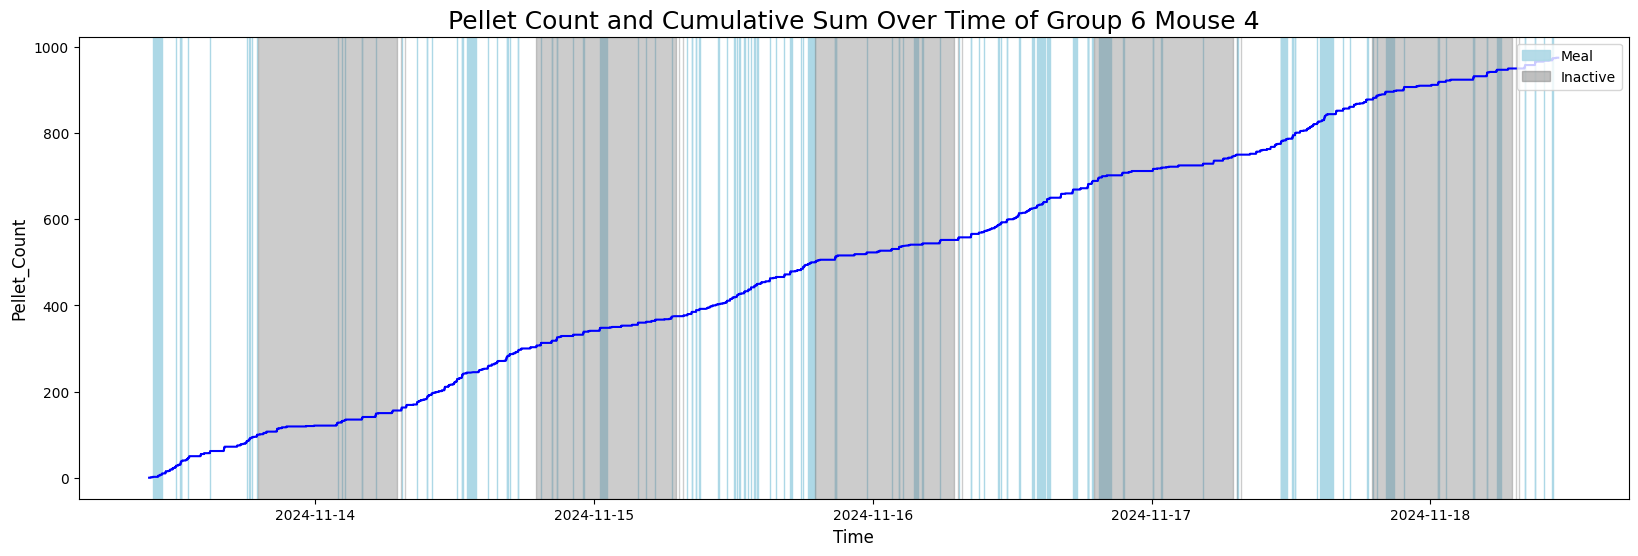

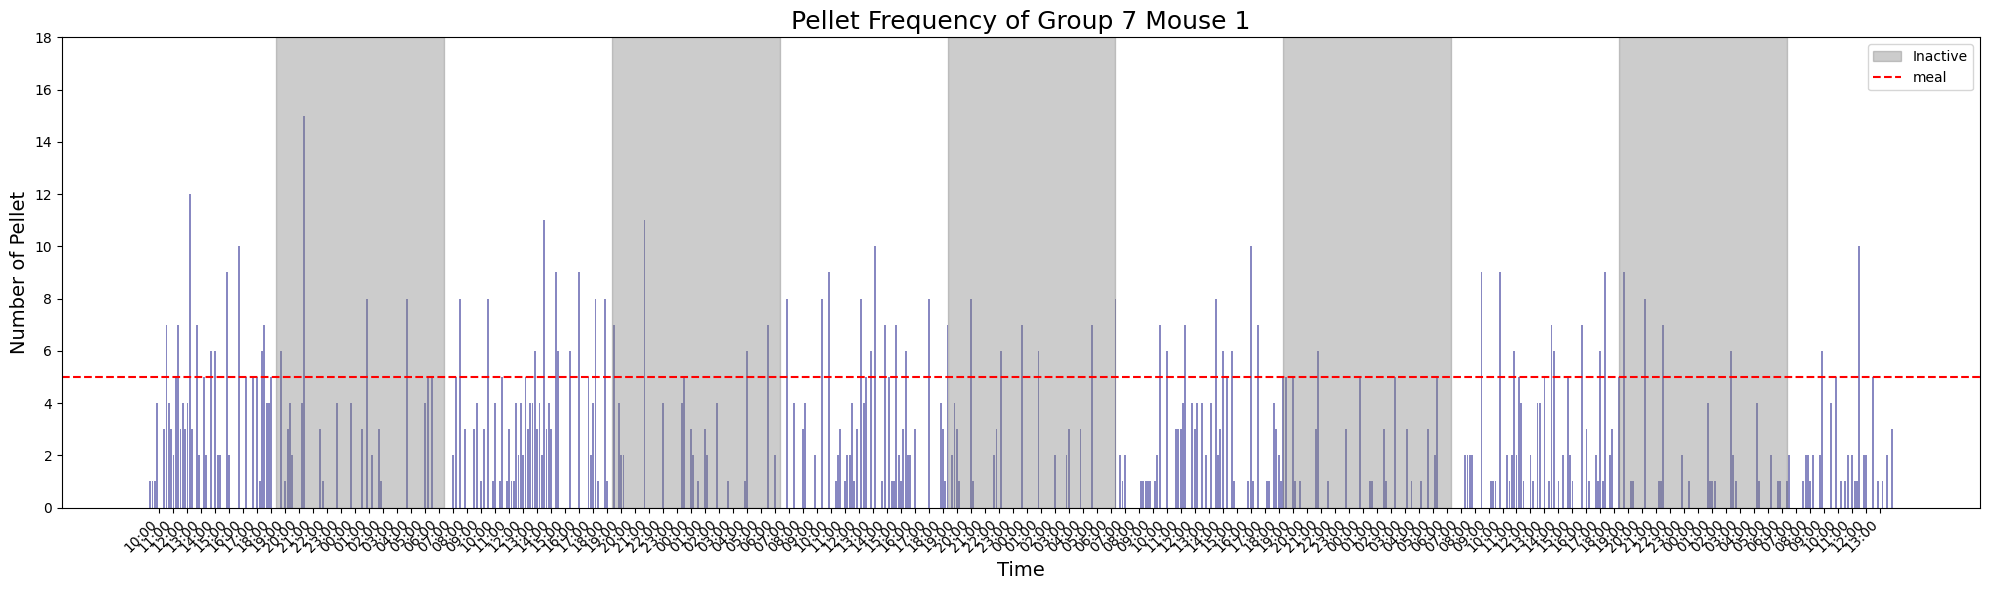

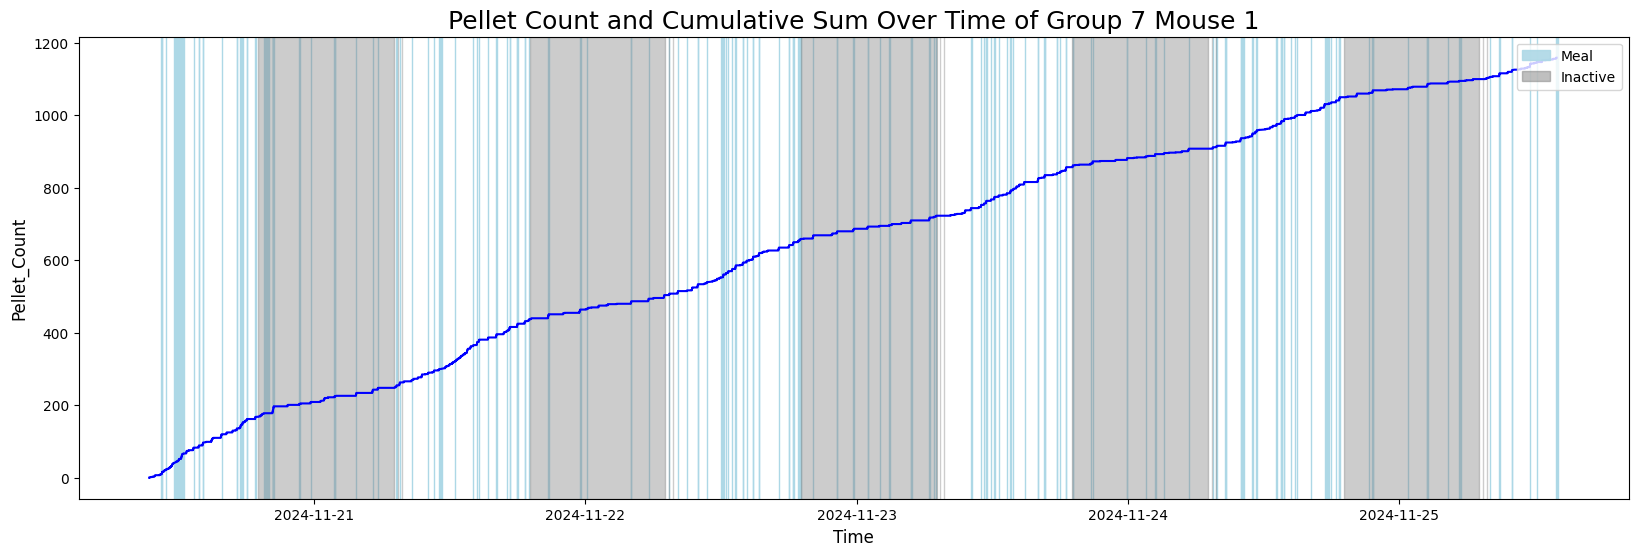

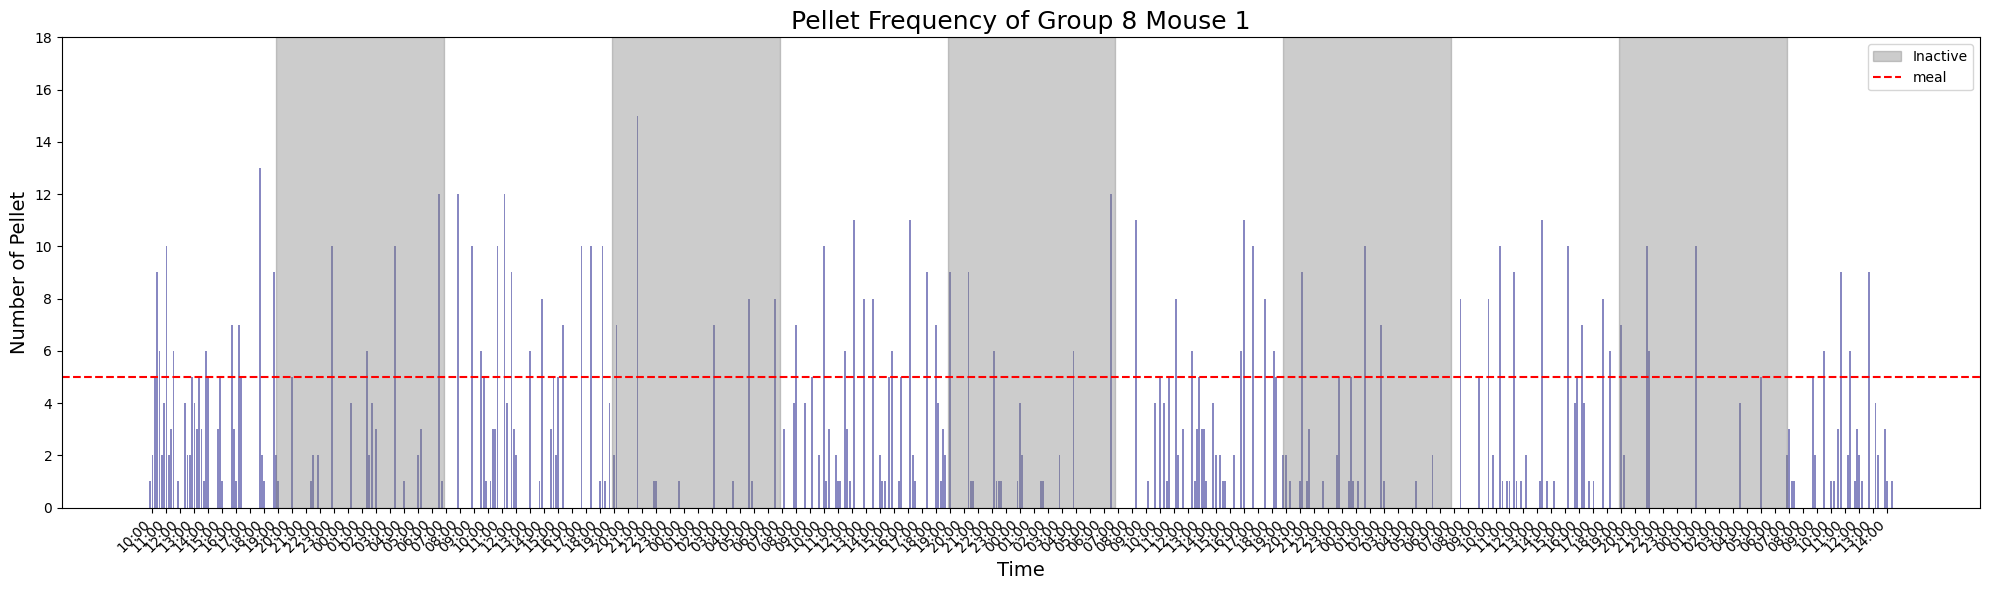

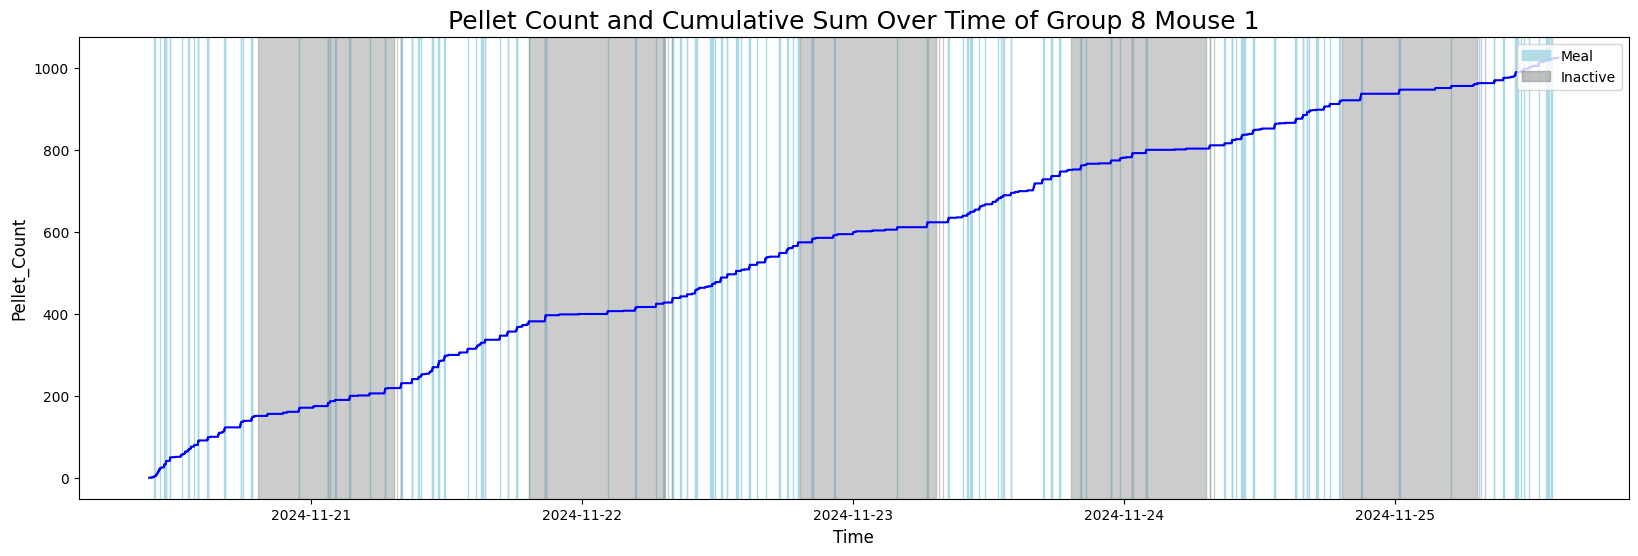

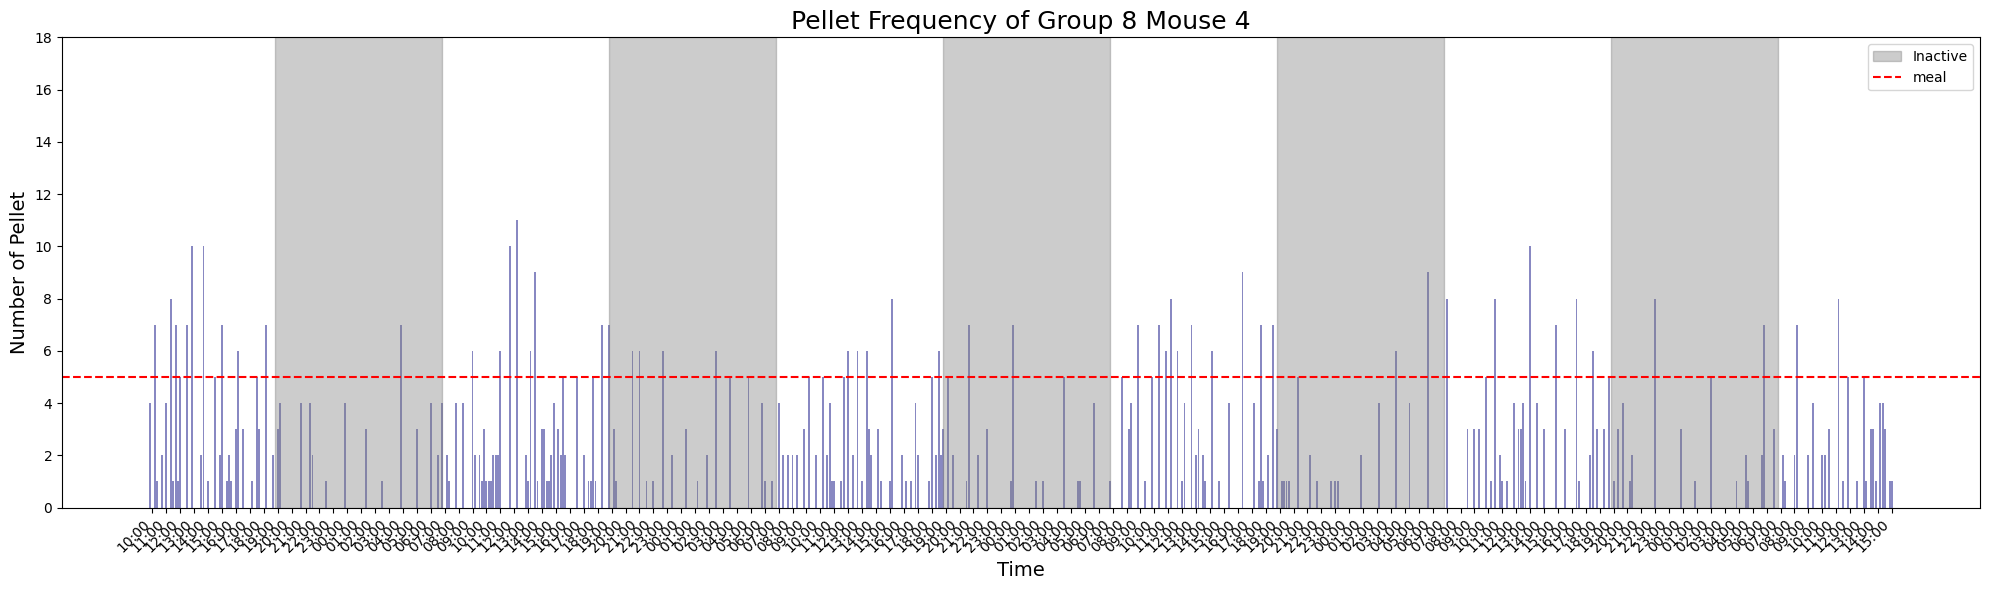

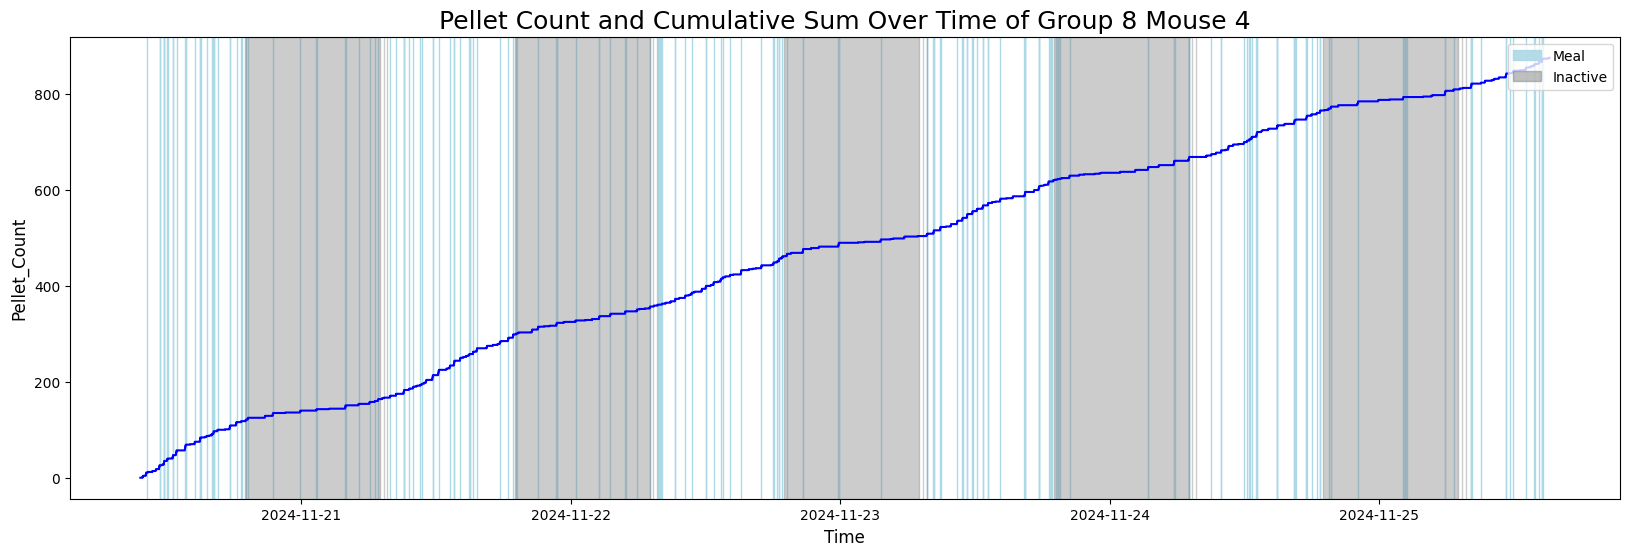

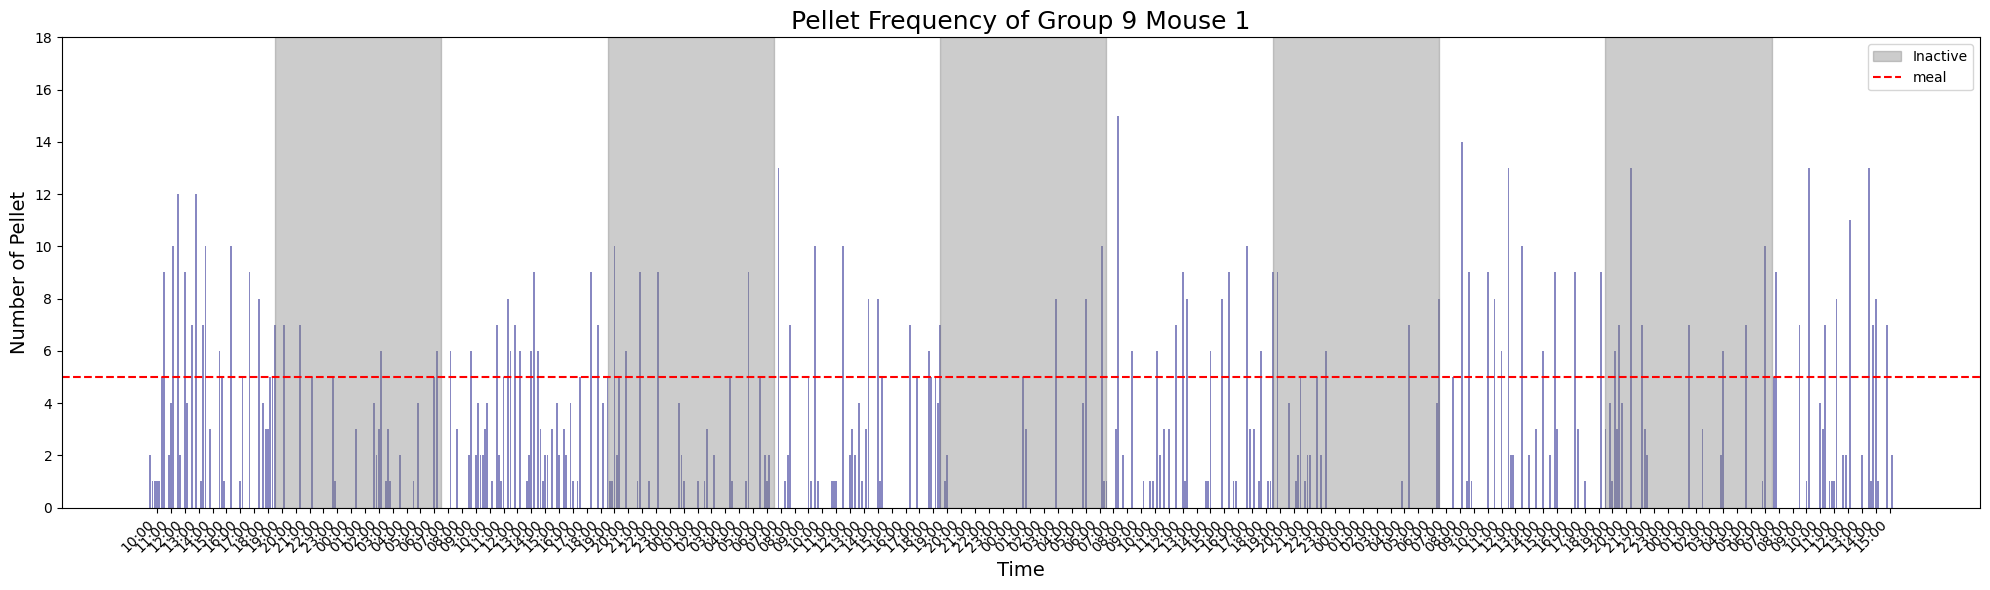

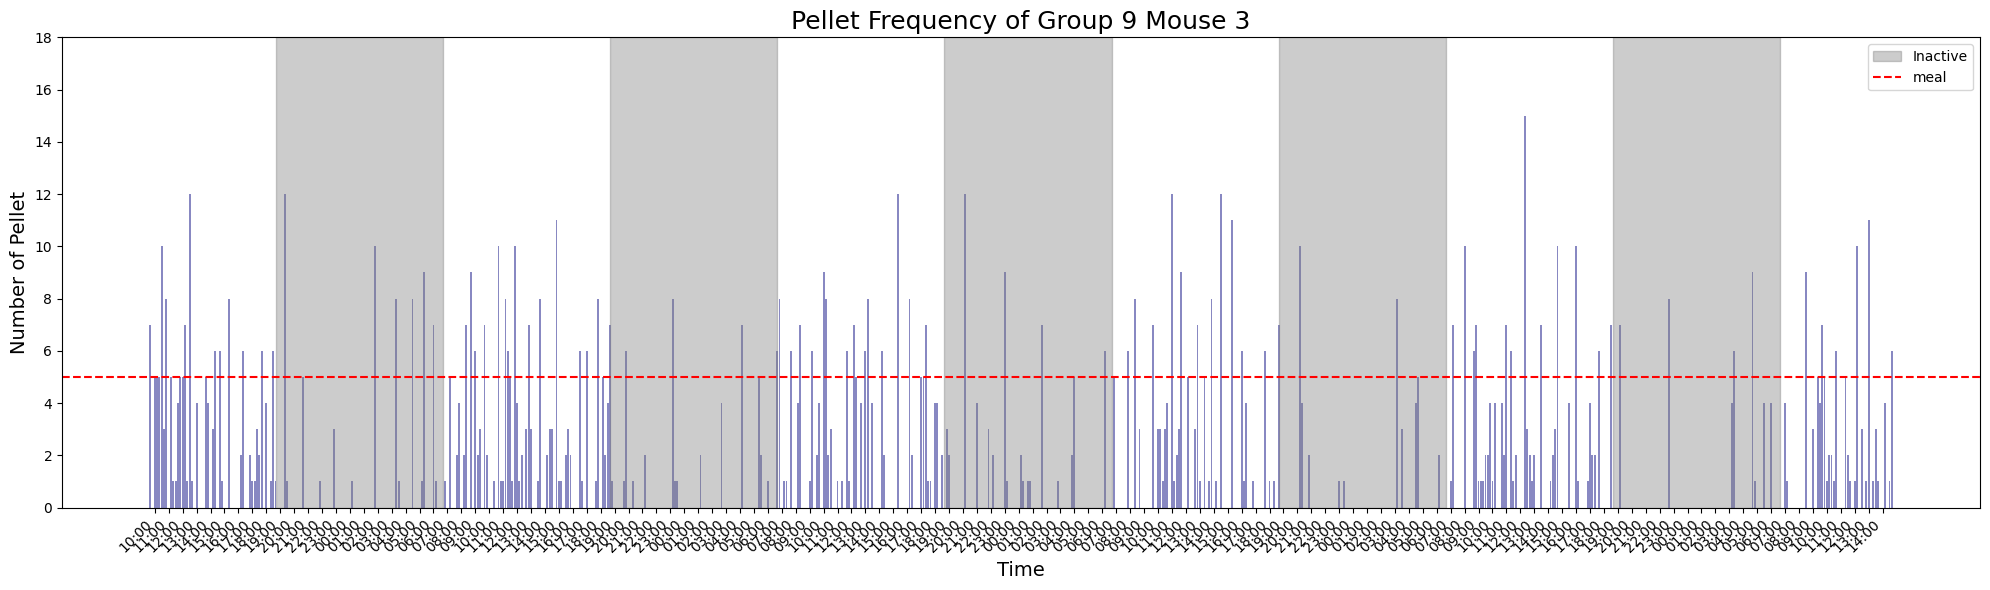

In [2]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
ctrl_fir_meal = []
flip_ctrl_meal_count = []
ctrl_fir_good_meal = []

for sheet in rev_ctrl_sheets:
    data = read_excel_by_sheet(sheet, rev_ctrl_path, cumulative_accuracy=False)
    meal, meal_acc = ml.find_meals_paper(data, time_threshold=time_threshold, pellet_threshold=pellet_threshold)
    meal_with_acc, first_meal_time = ml.find_first_good_meal(data, 60, 2, 'lstm')
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    meal_1_good = (first_meal_time - data['Time'][0]).total_seconds() / 3600
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(sheet)
    flip_ctrl_meal_count.append(round(len(meal) / ml.experiment_duration(data), 2))
    ctrl_avg_pellet.append(ml.average_pellet(group))
    ctrl_dark_meals.append(ml.active_meal(meal))
    ctrl_fir_meal.append(meal_1)
    ctrl_fir_good_meal.append(meal_1_good)
    sheet = sheet.replace('.', '') + '.svg'
    ml.graph_pellet_frequency(group, bhv, num, export_path=os.path.join(export_root, 'Supplementary 3', f'pellet_freq_{sheet}'))
    ml.graphing_cum_count(data, meal, bhv, num, flip=True, export_path=os.path.join(export_root, 'Supplementary 3', f'pellet_curve_{sheet}'))

### Cask Group

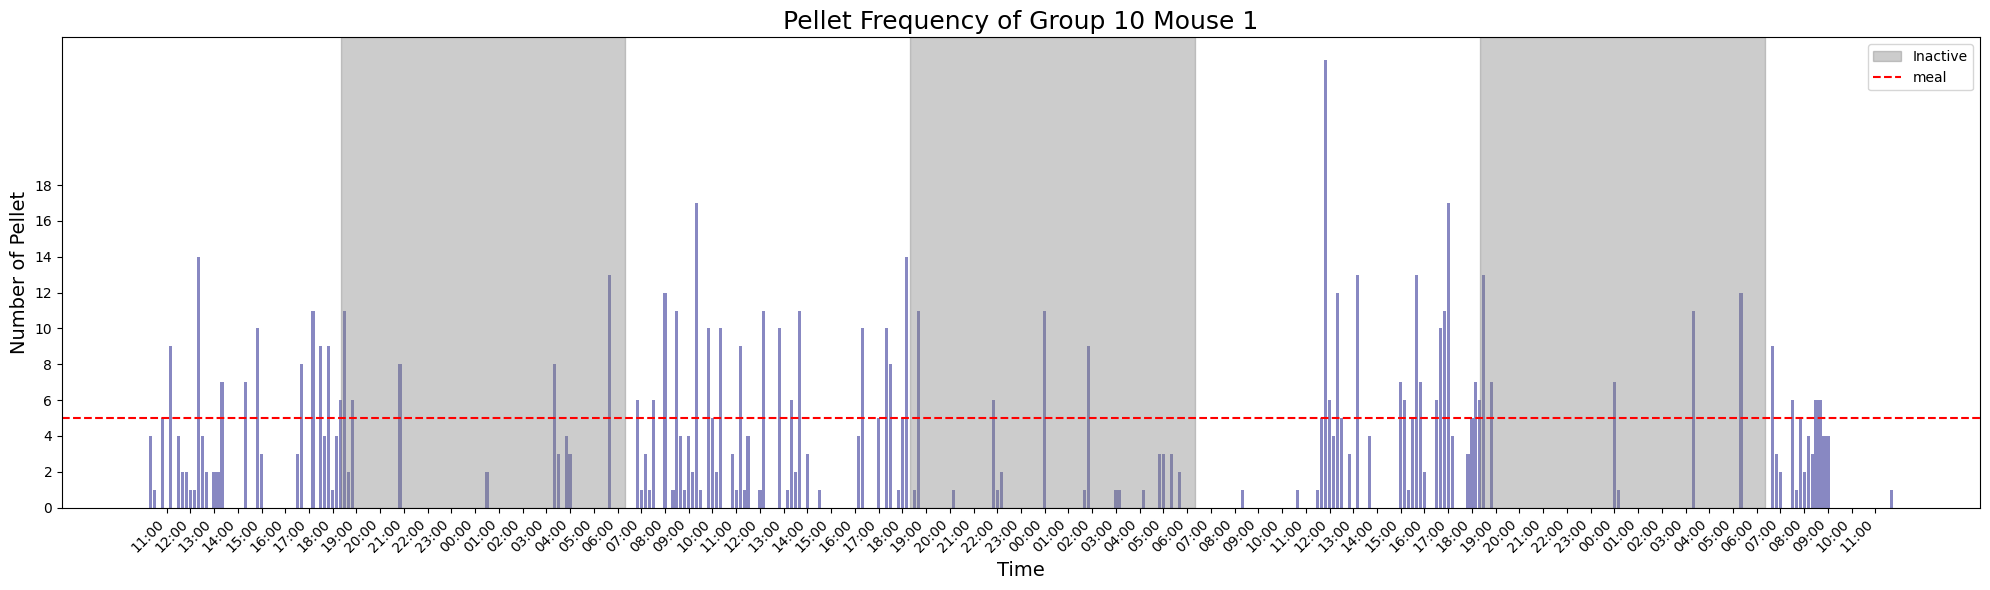

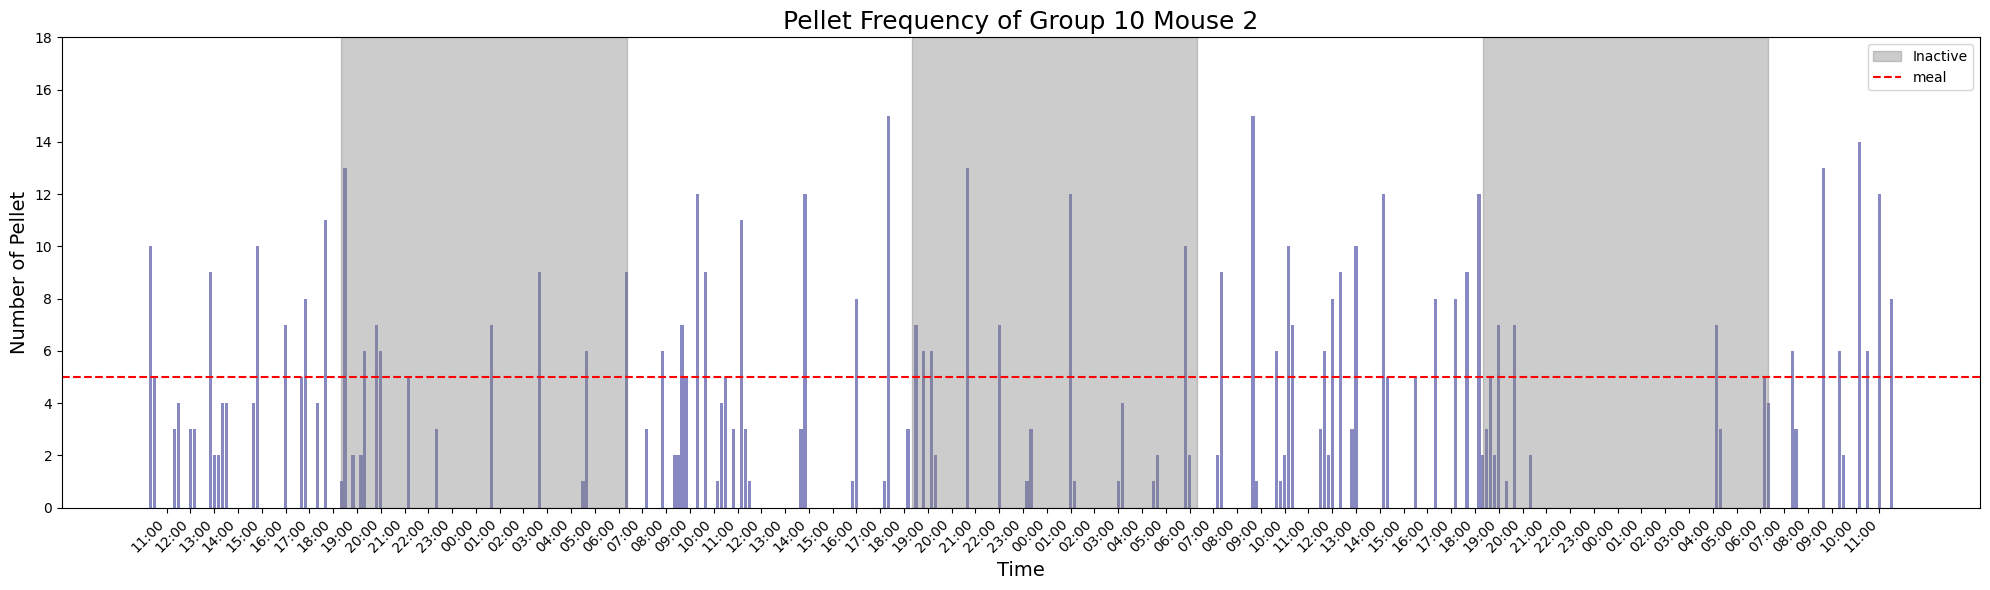

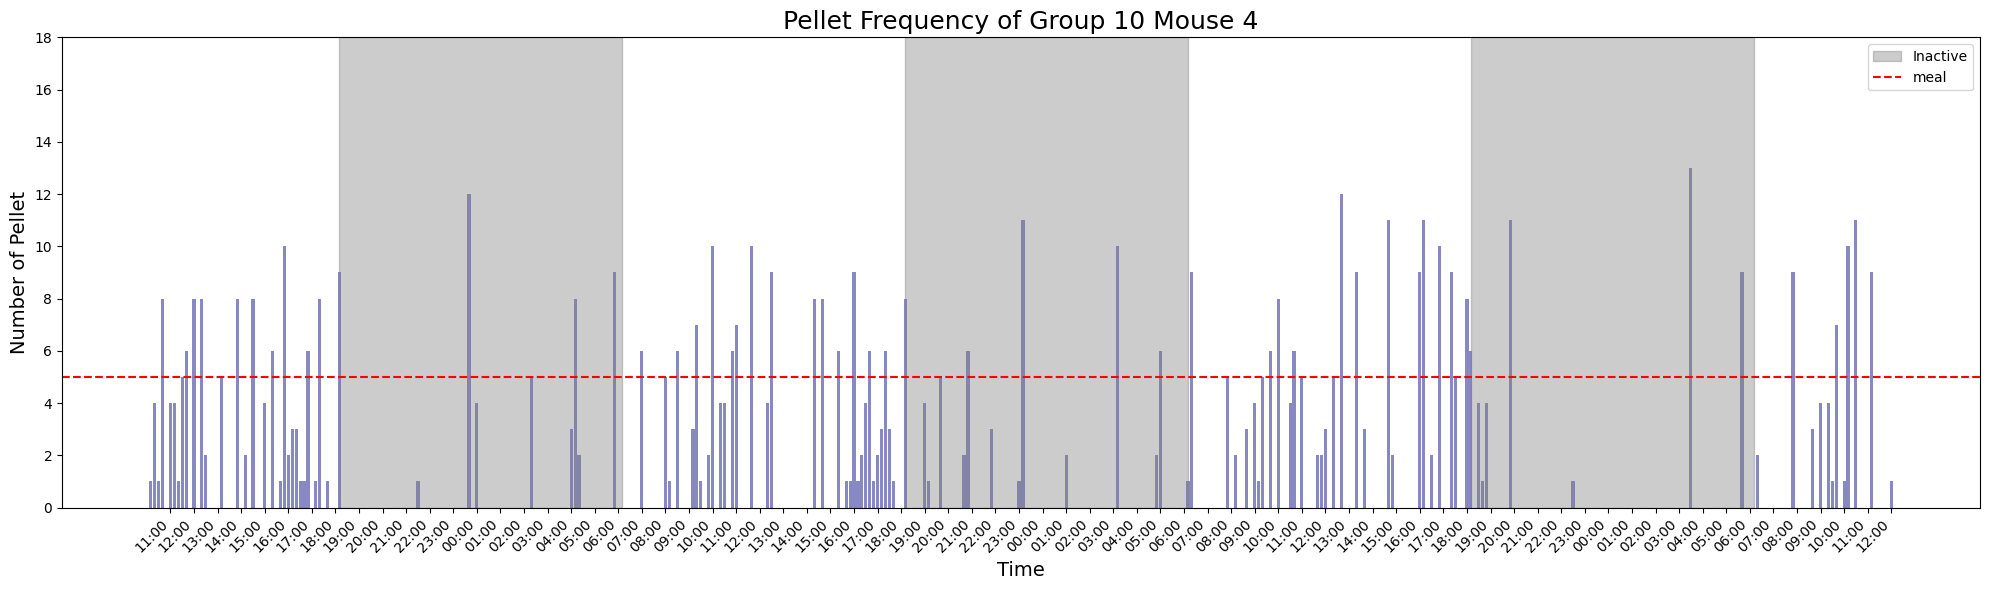

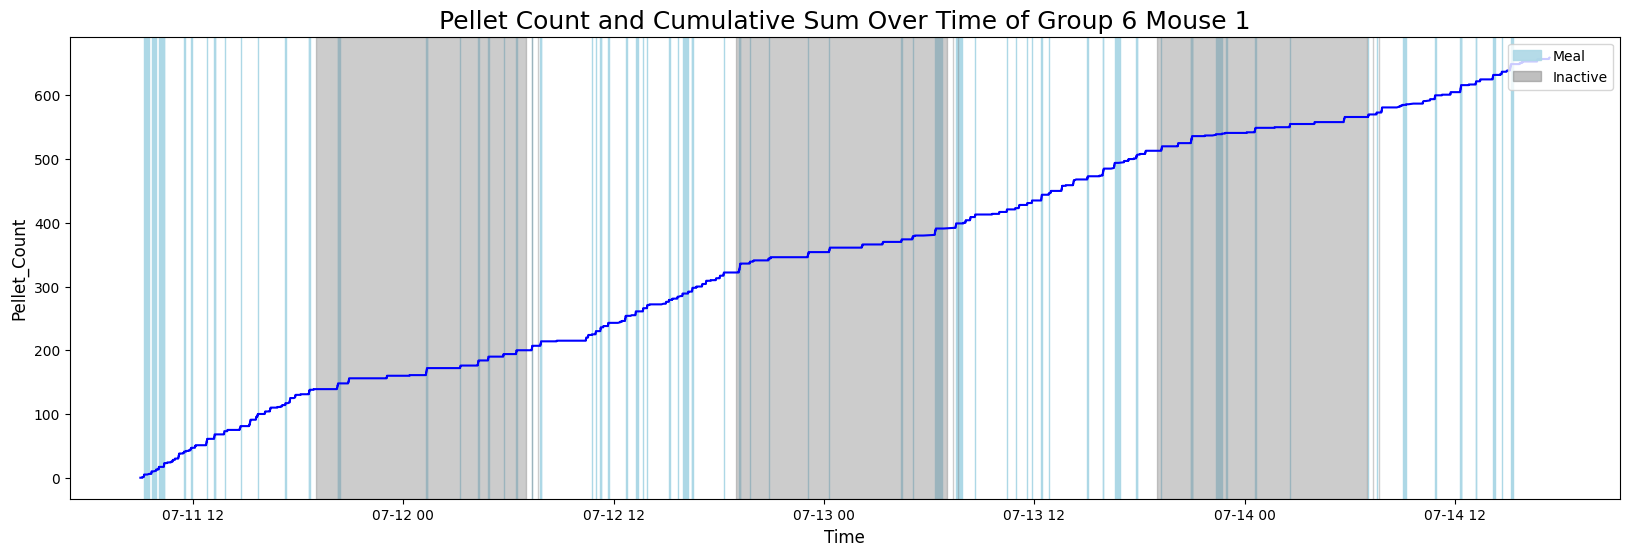

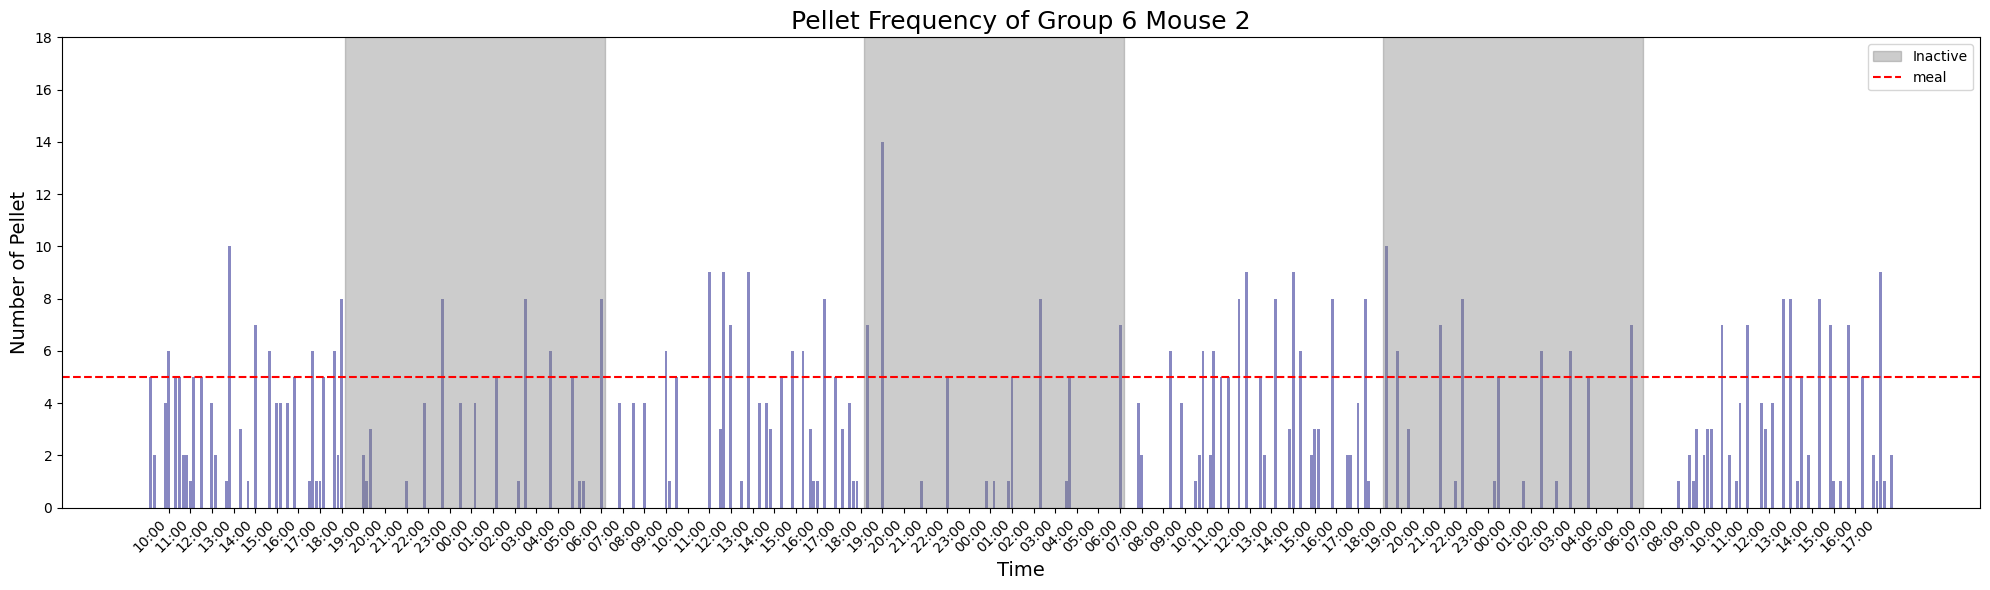

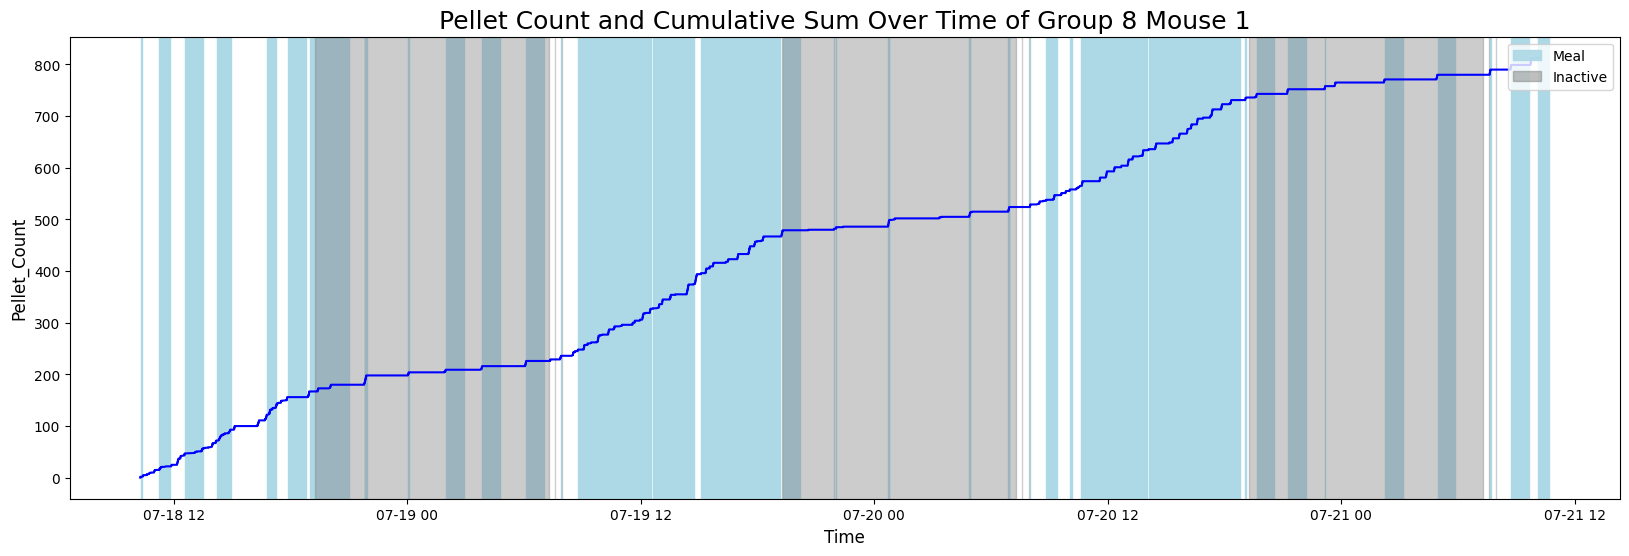

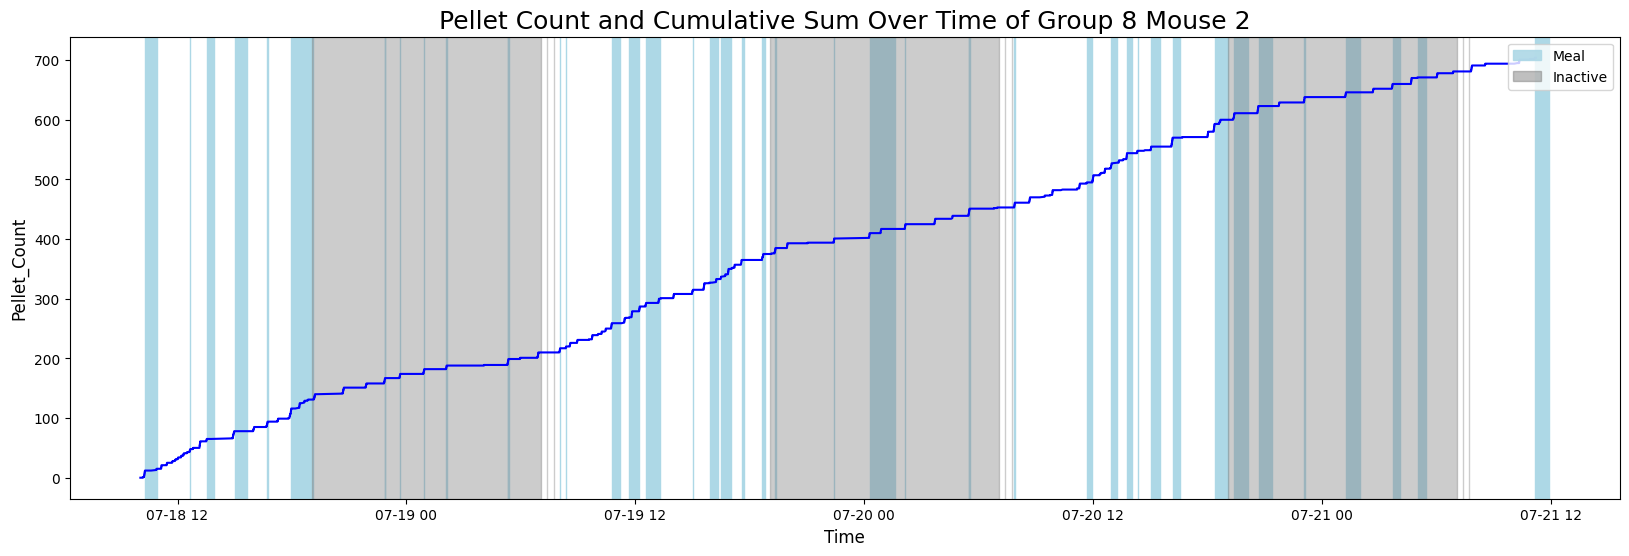

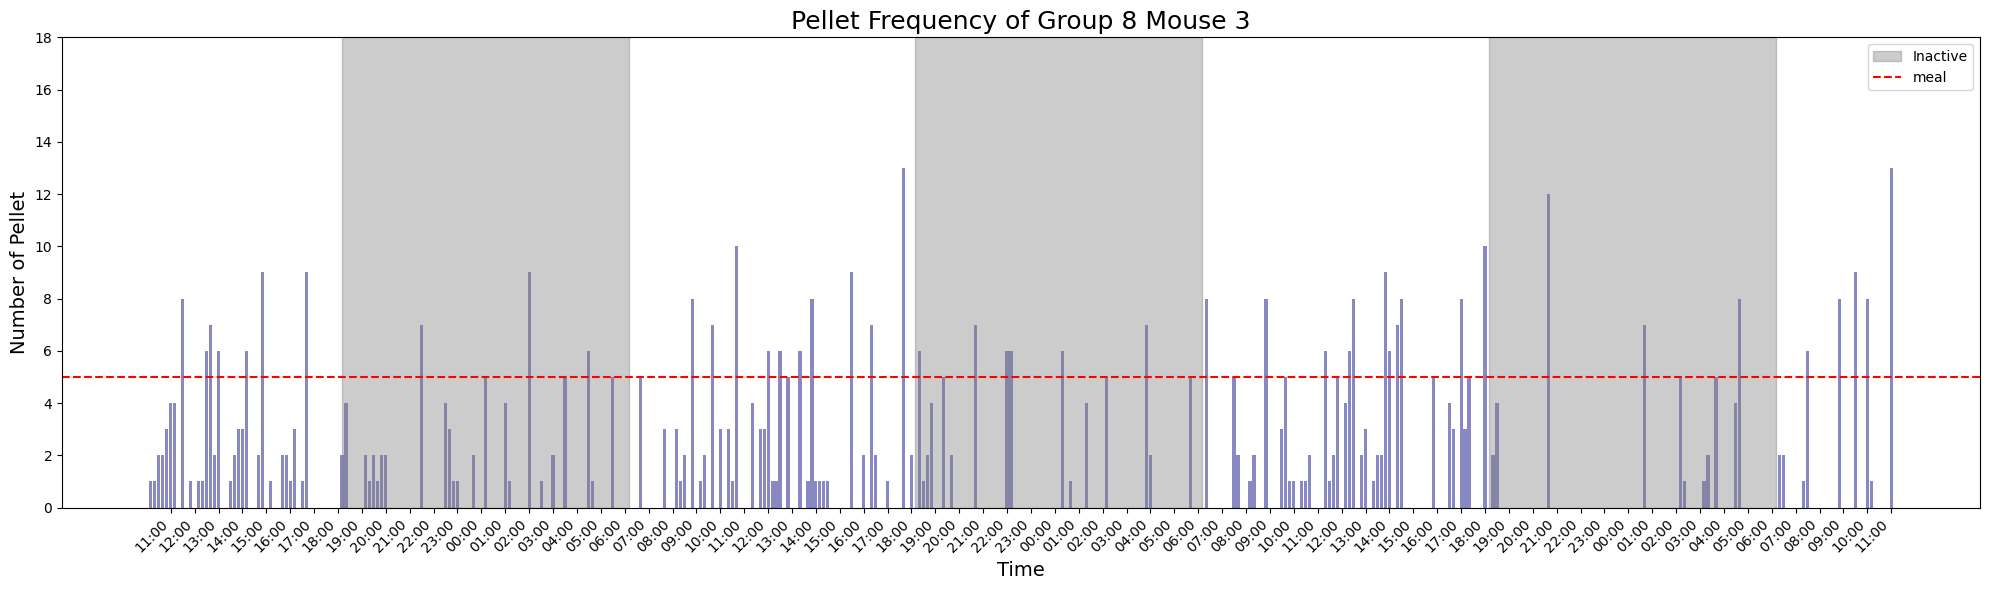

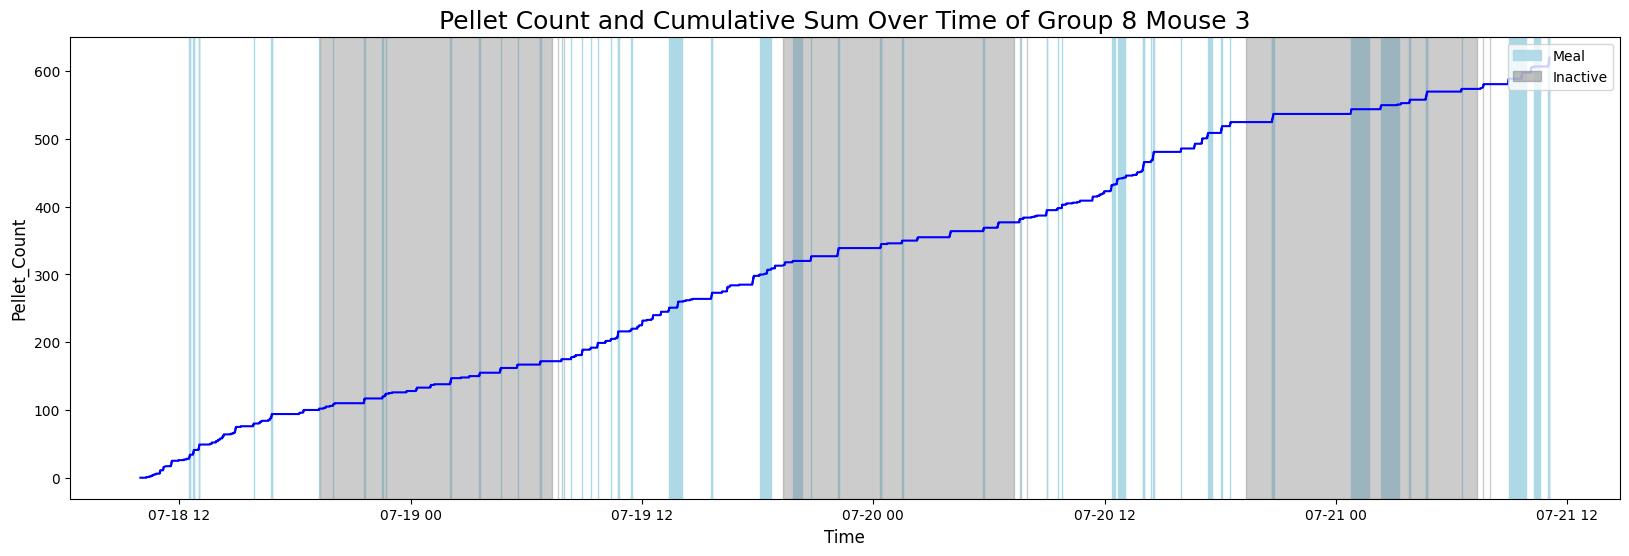

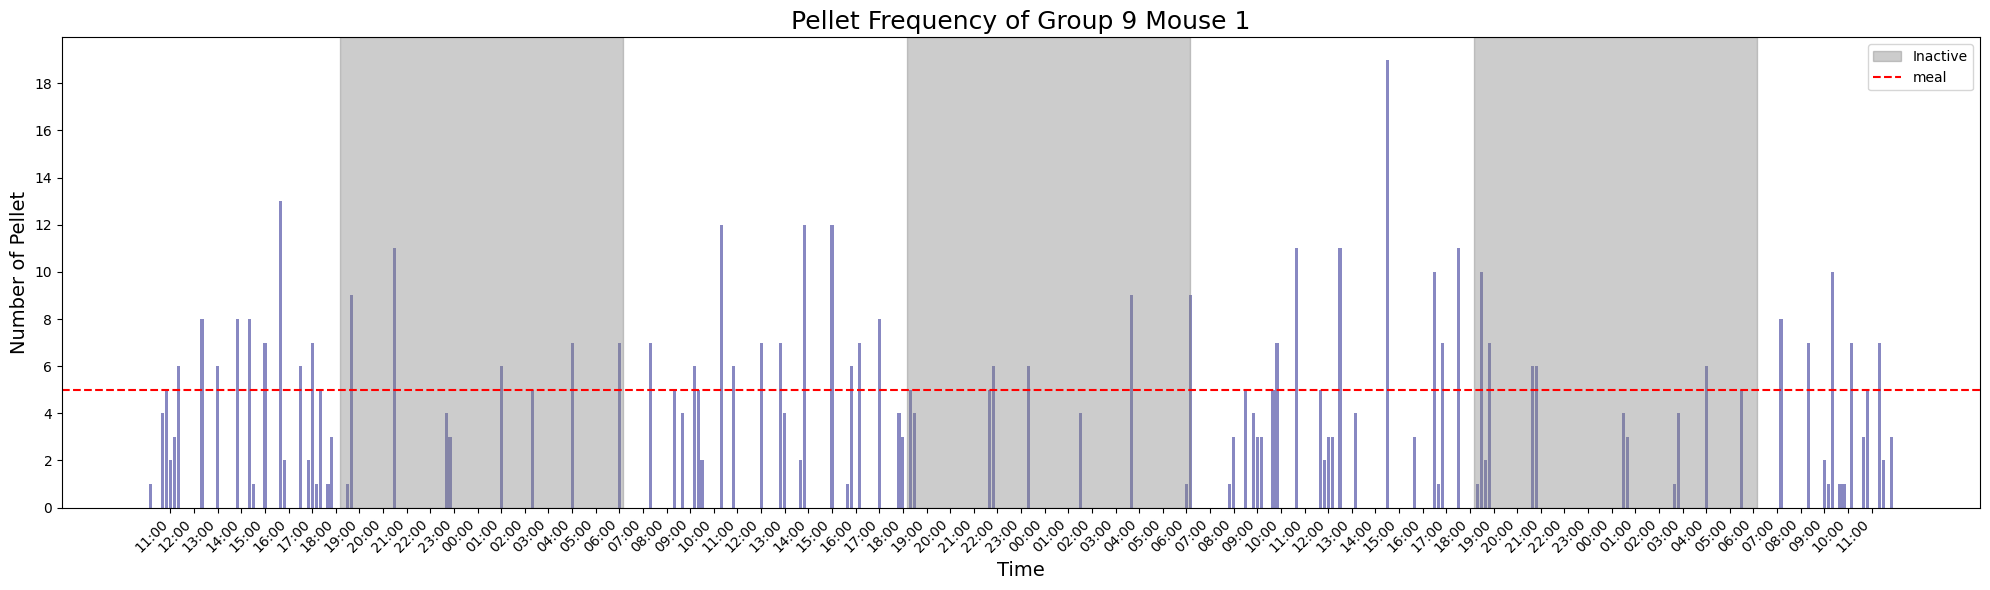

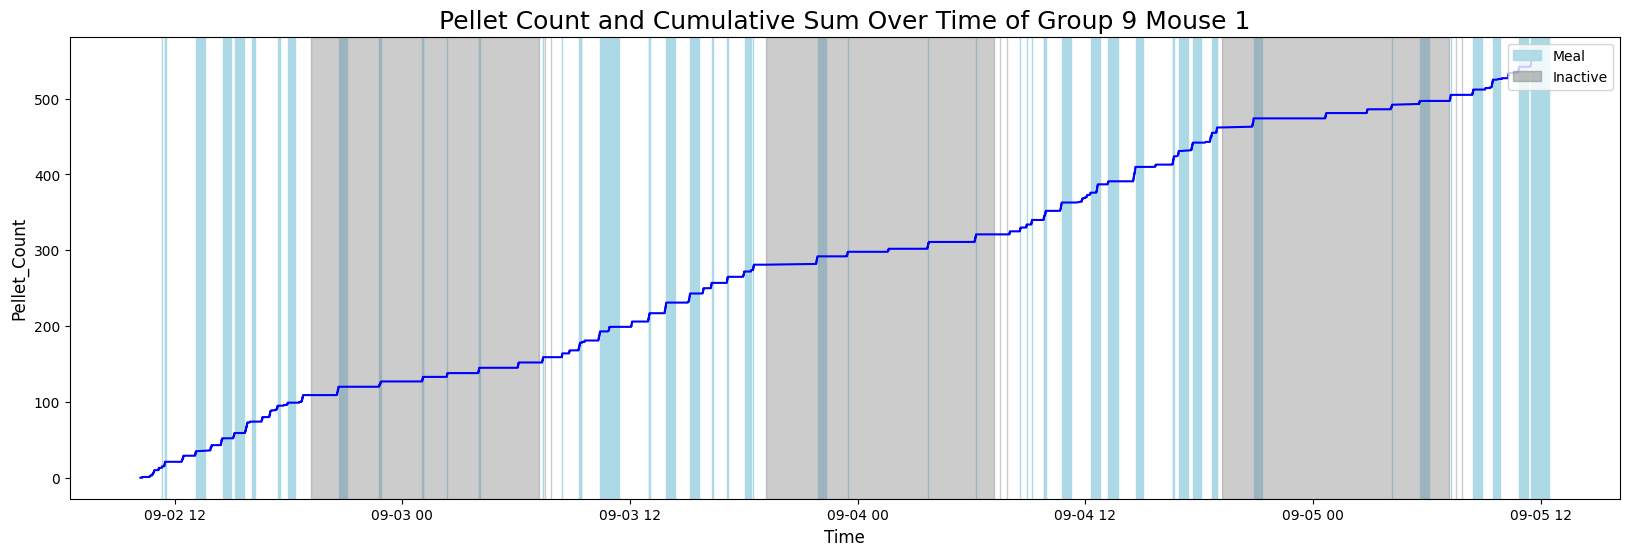

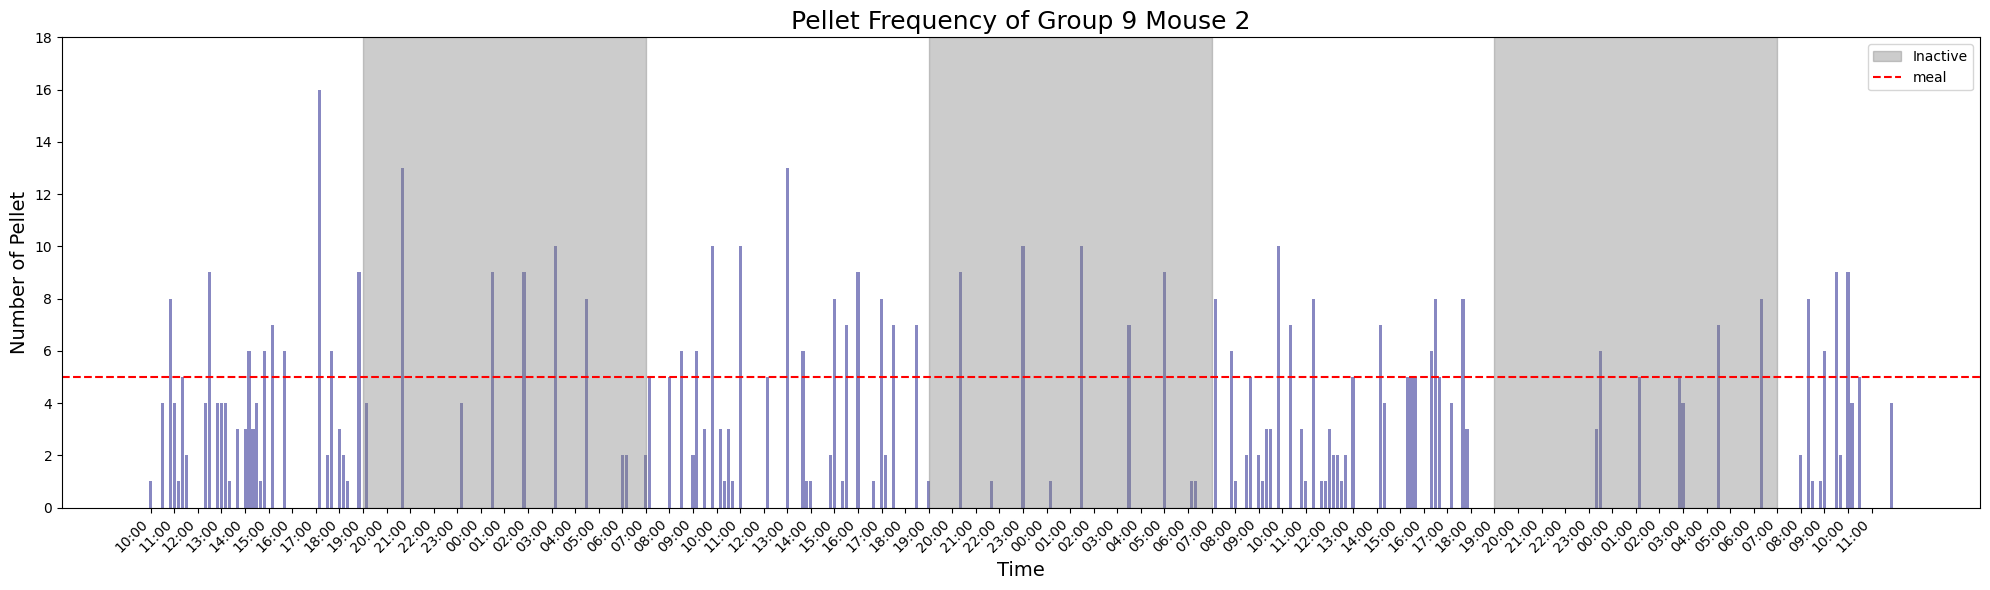

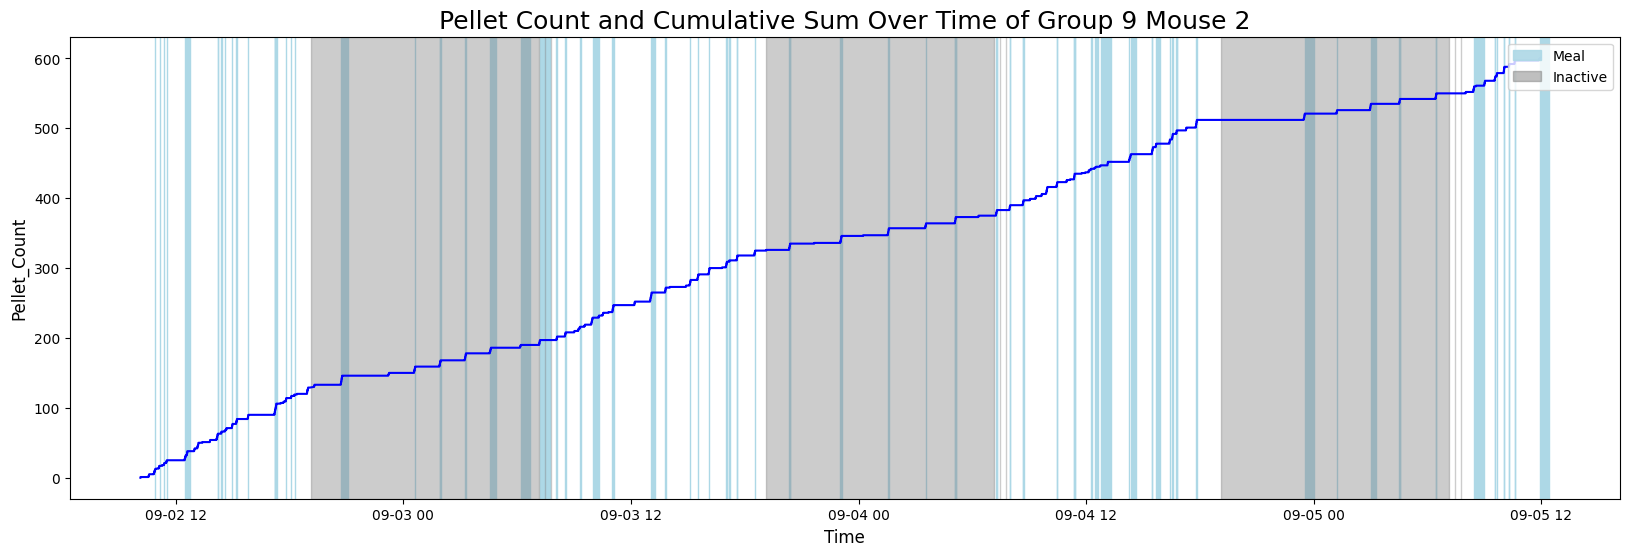

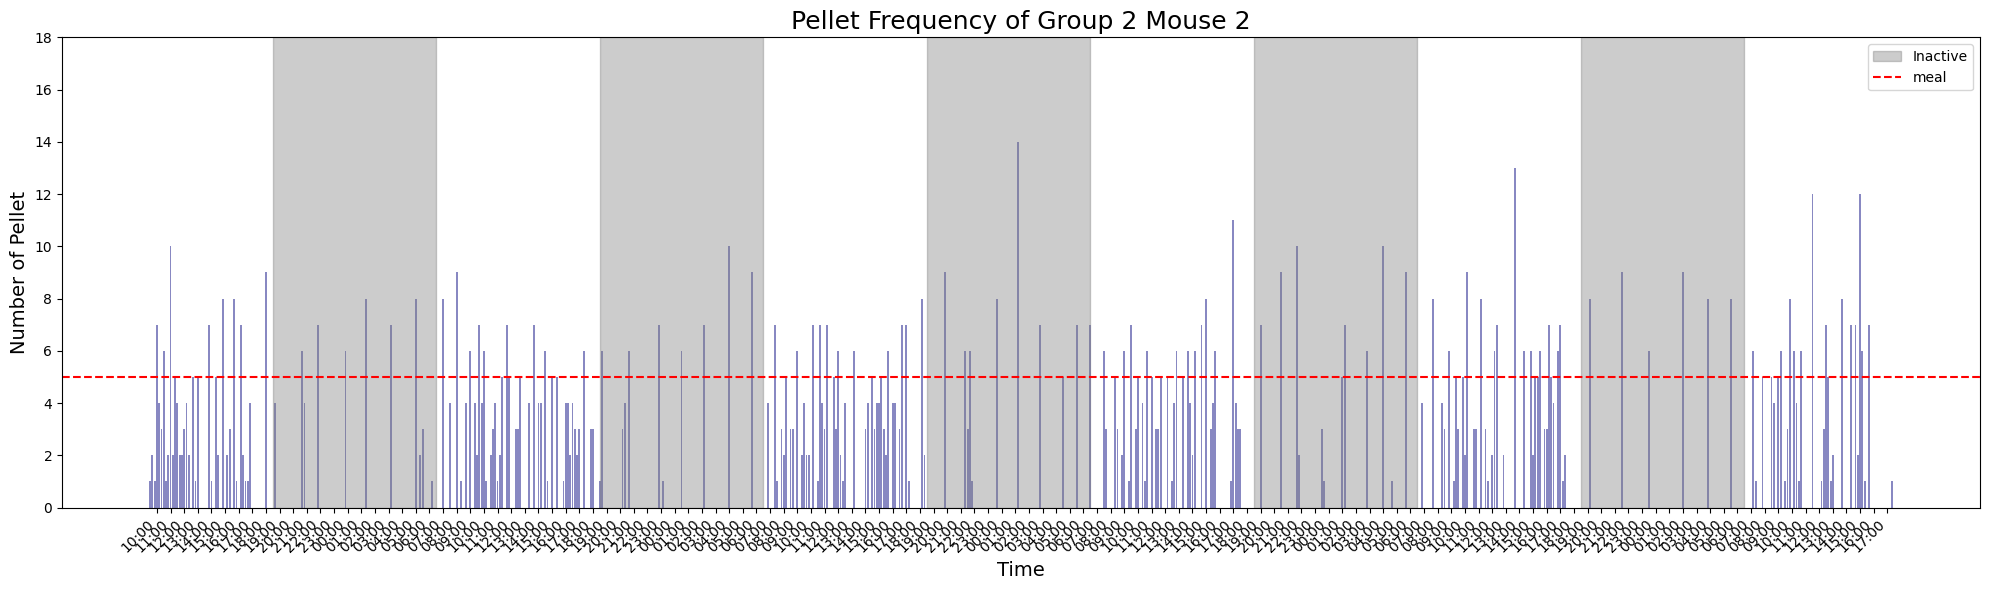

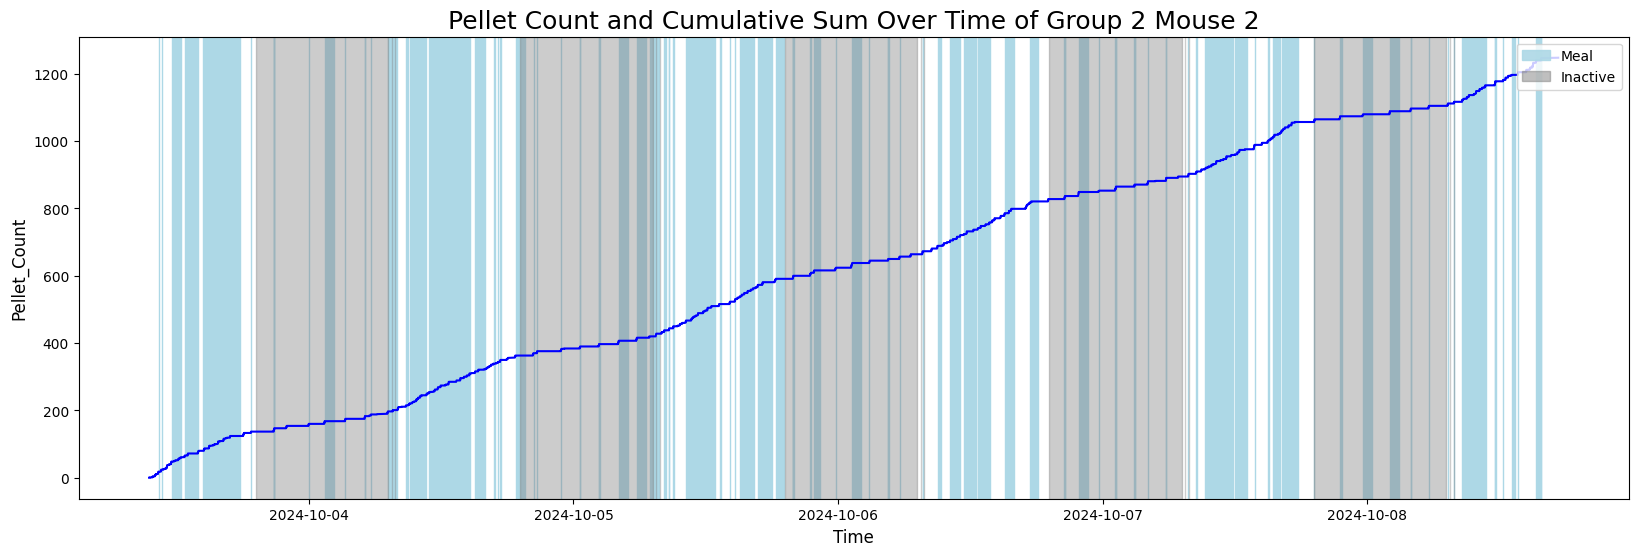

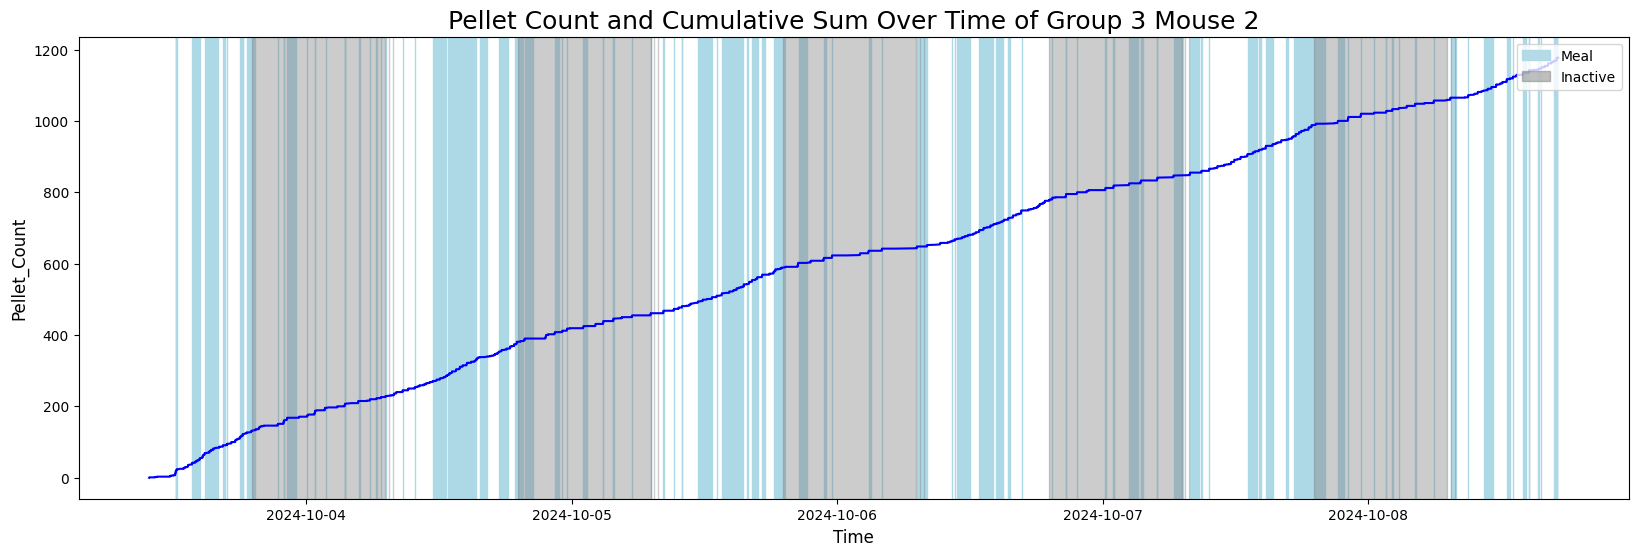

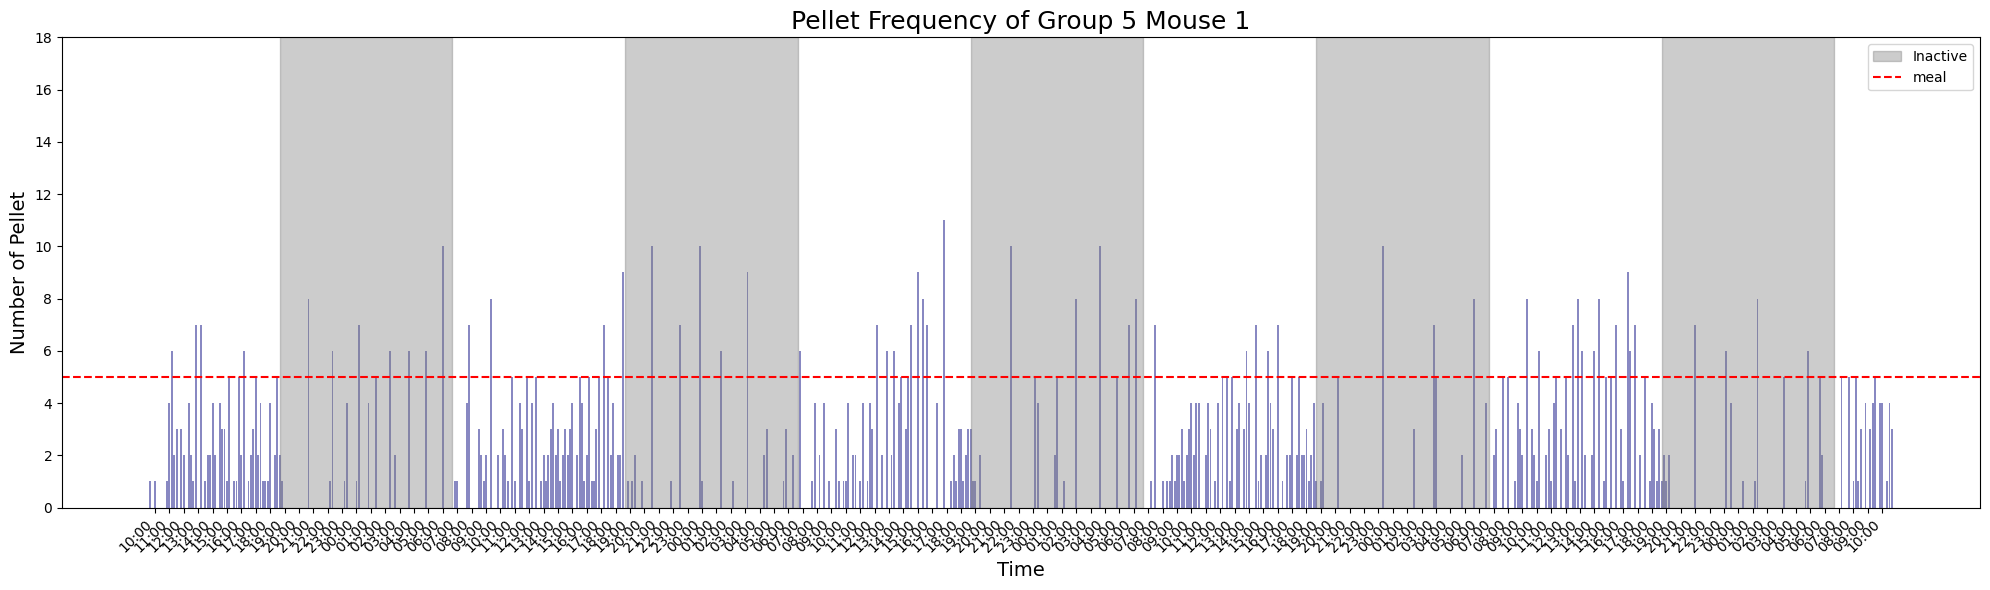

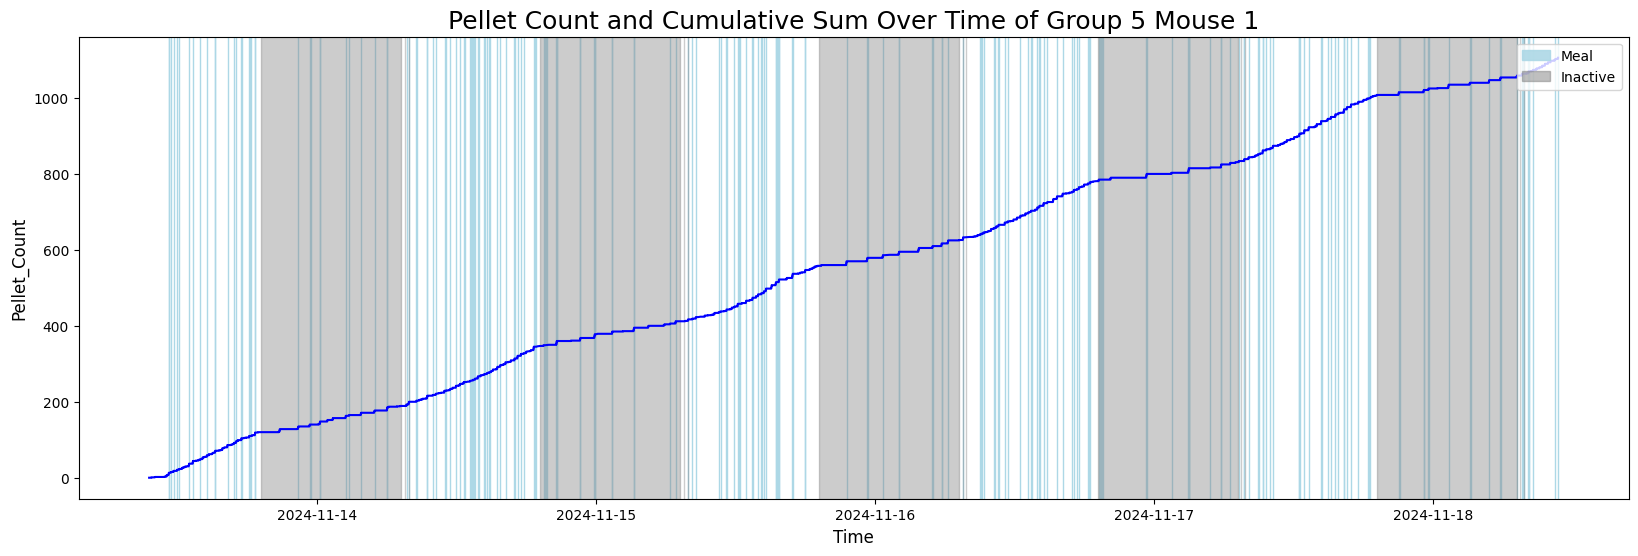

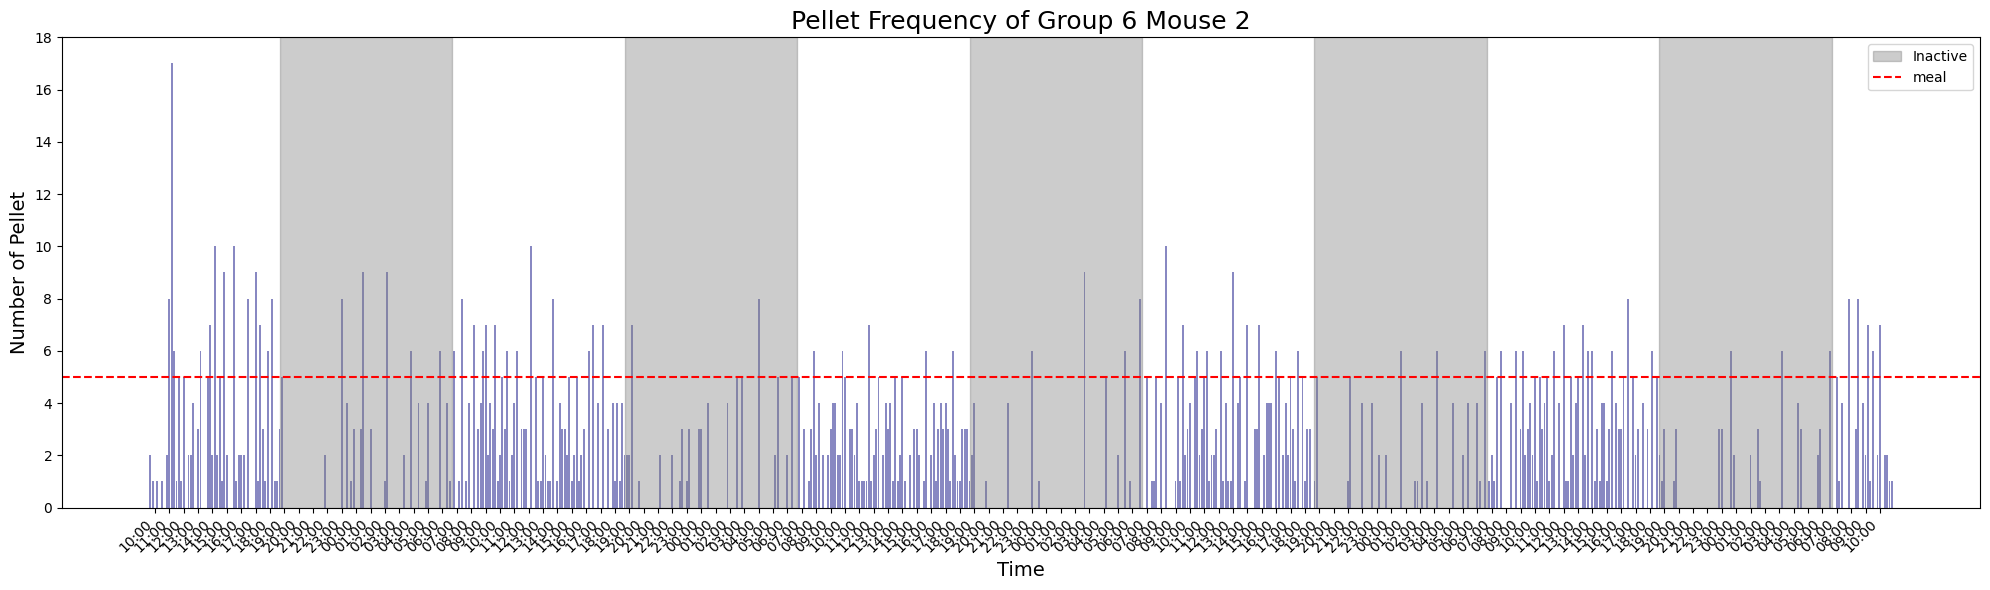

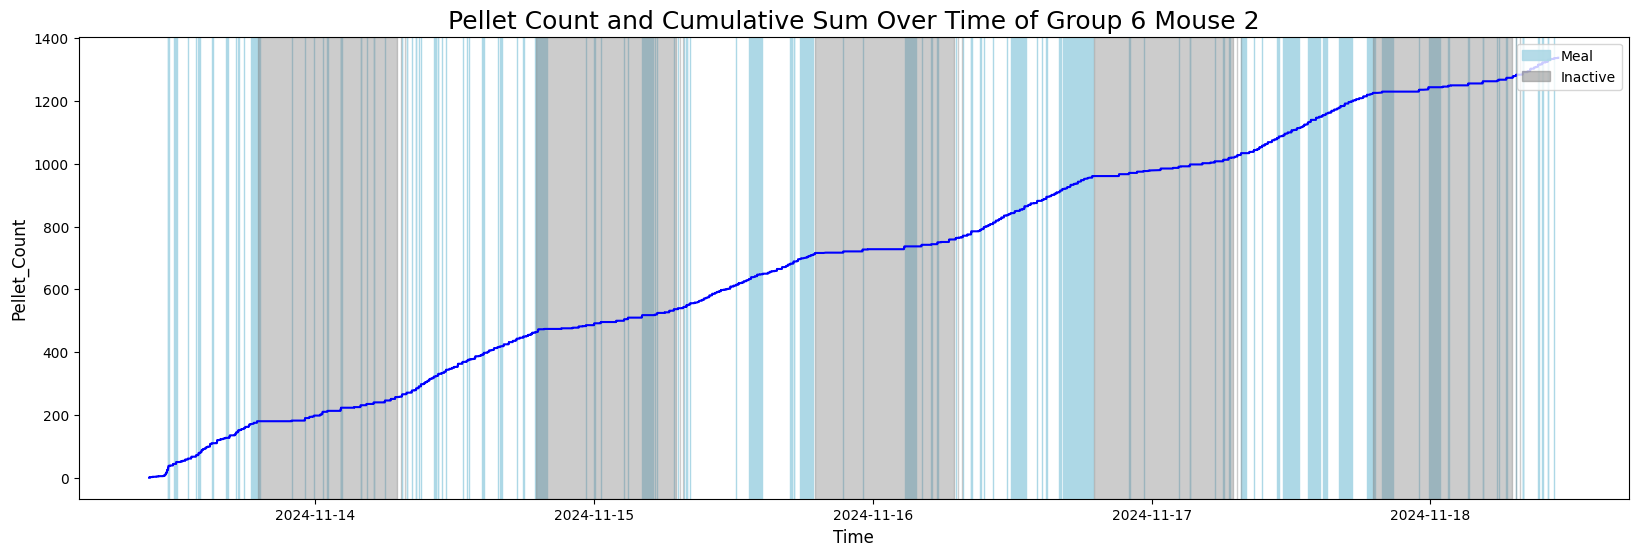

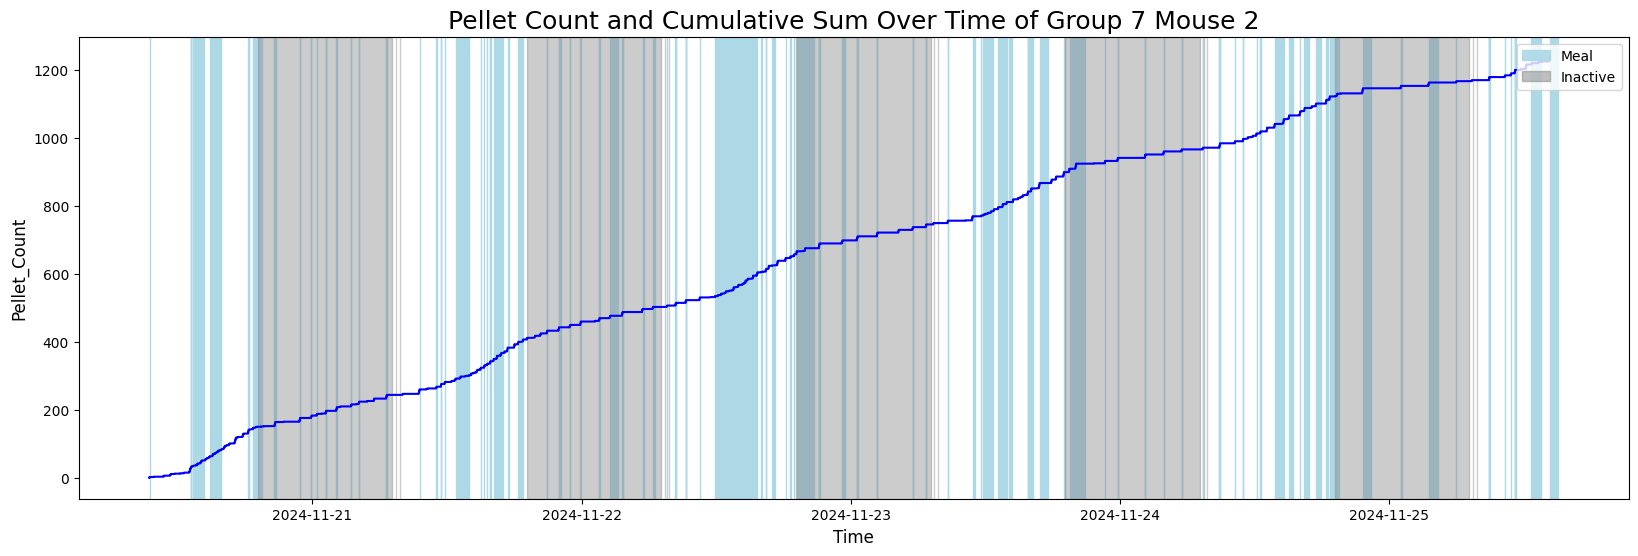

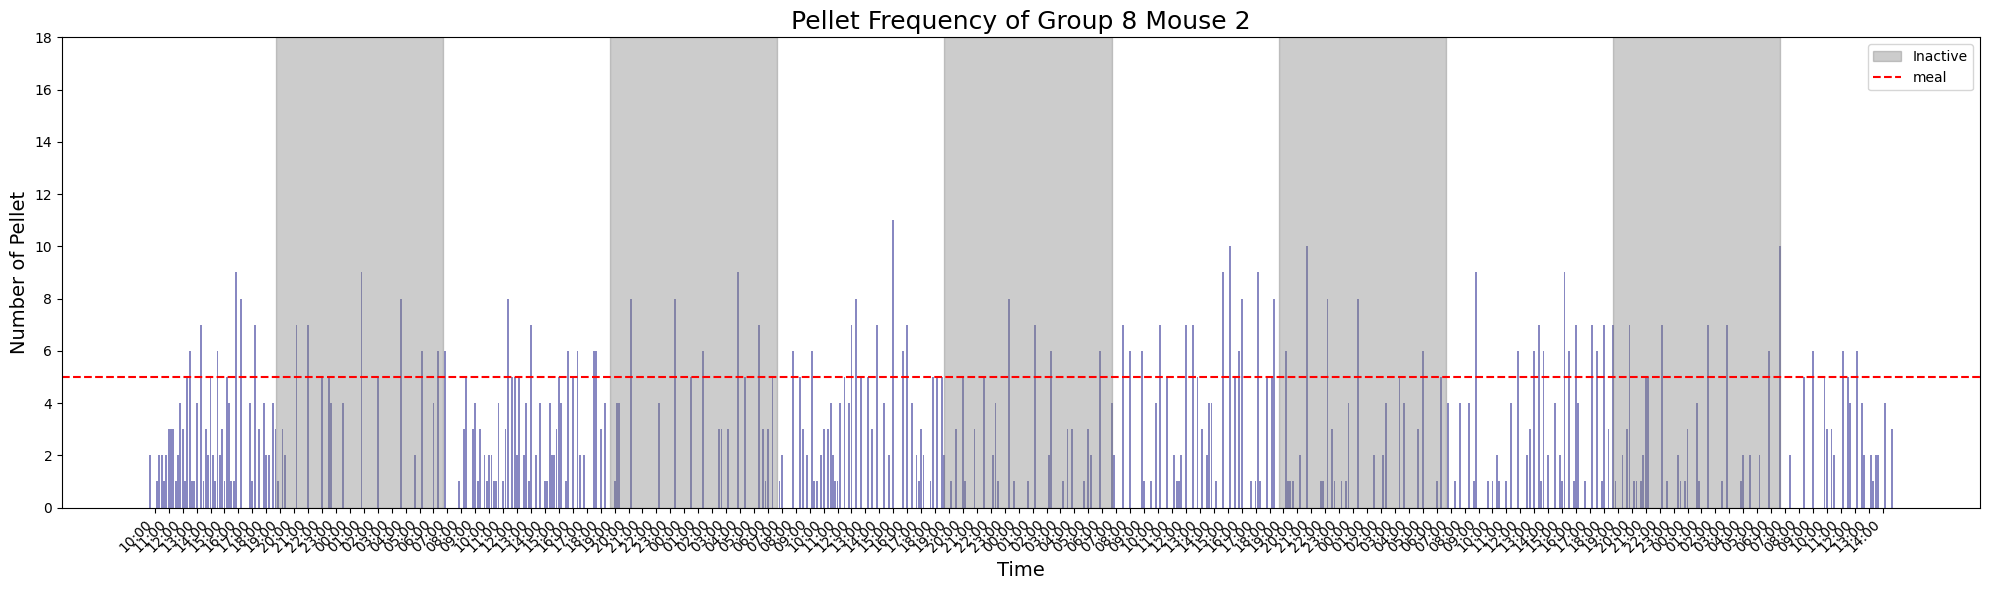

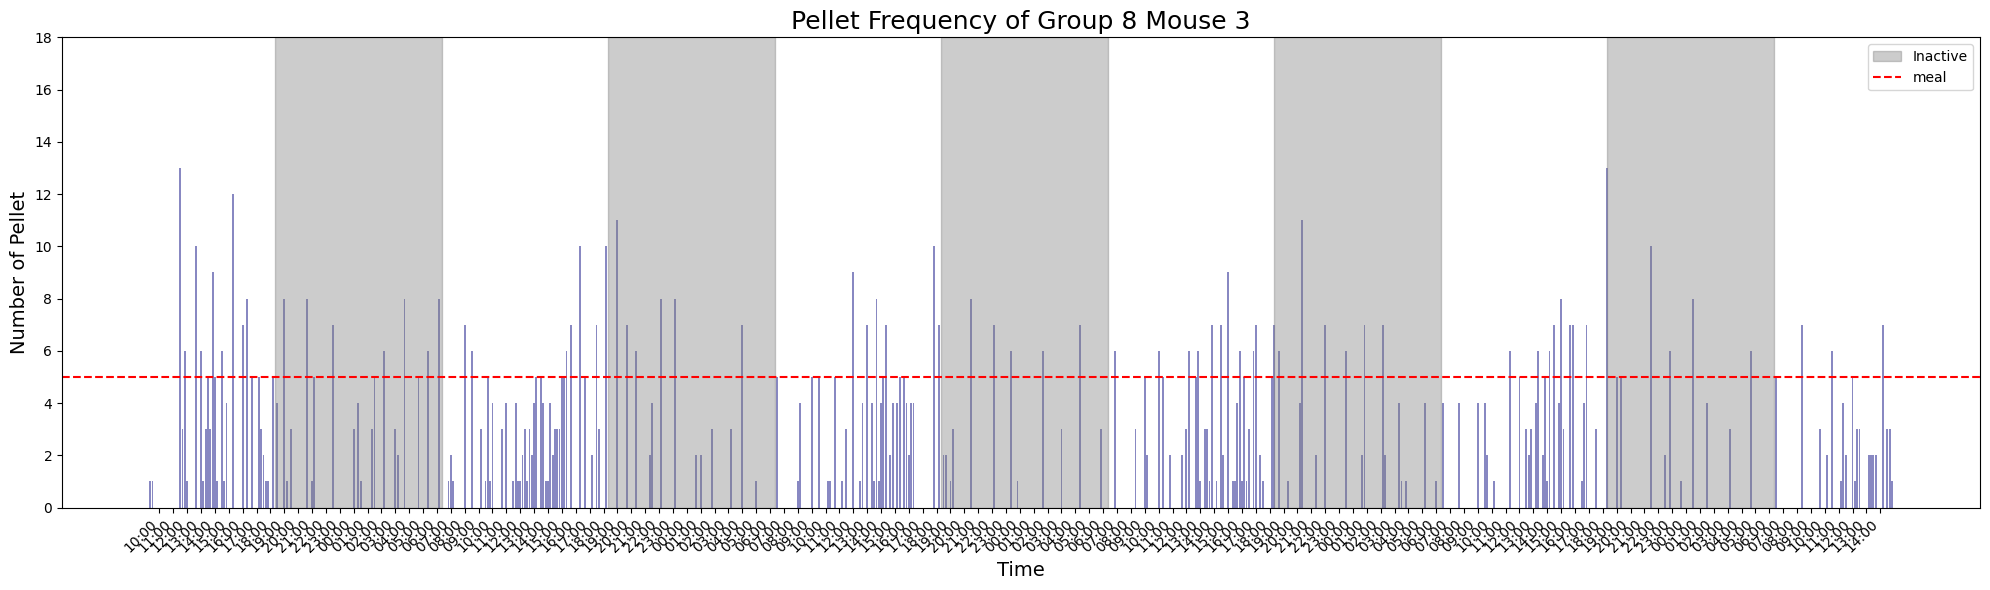

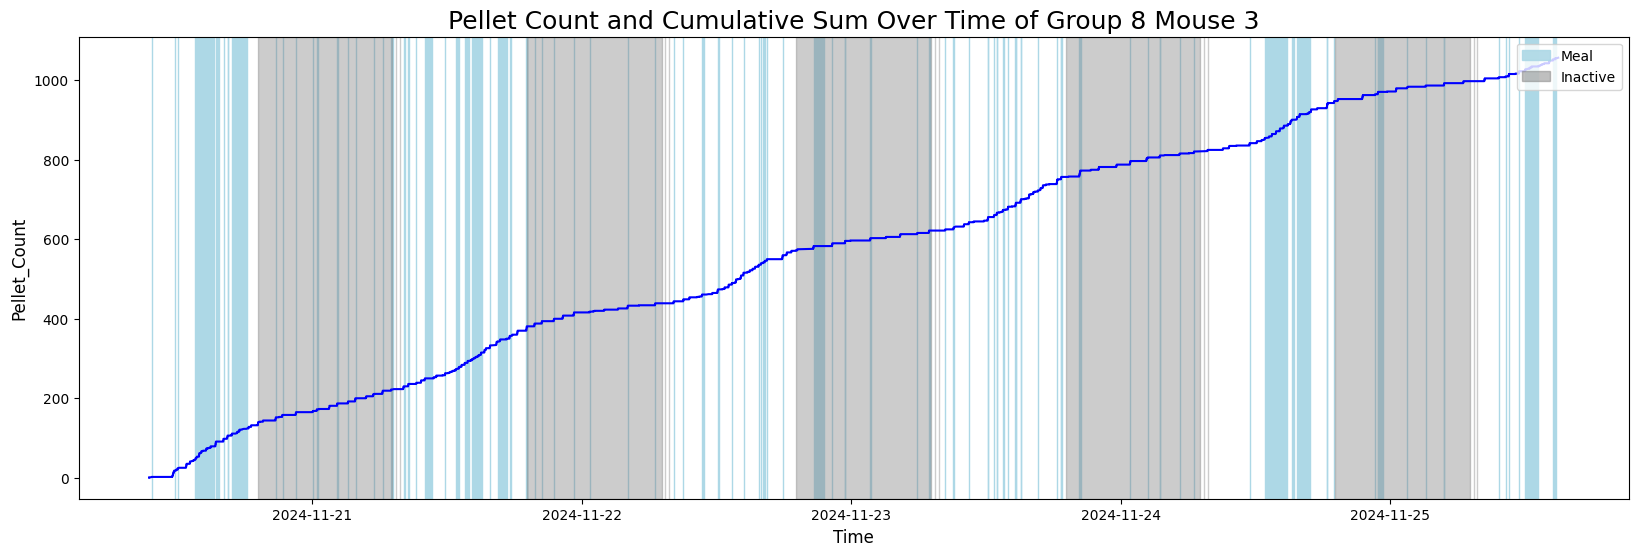

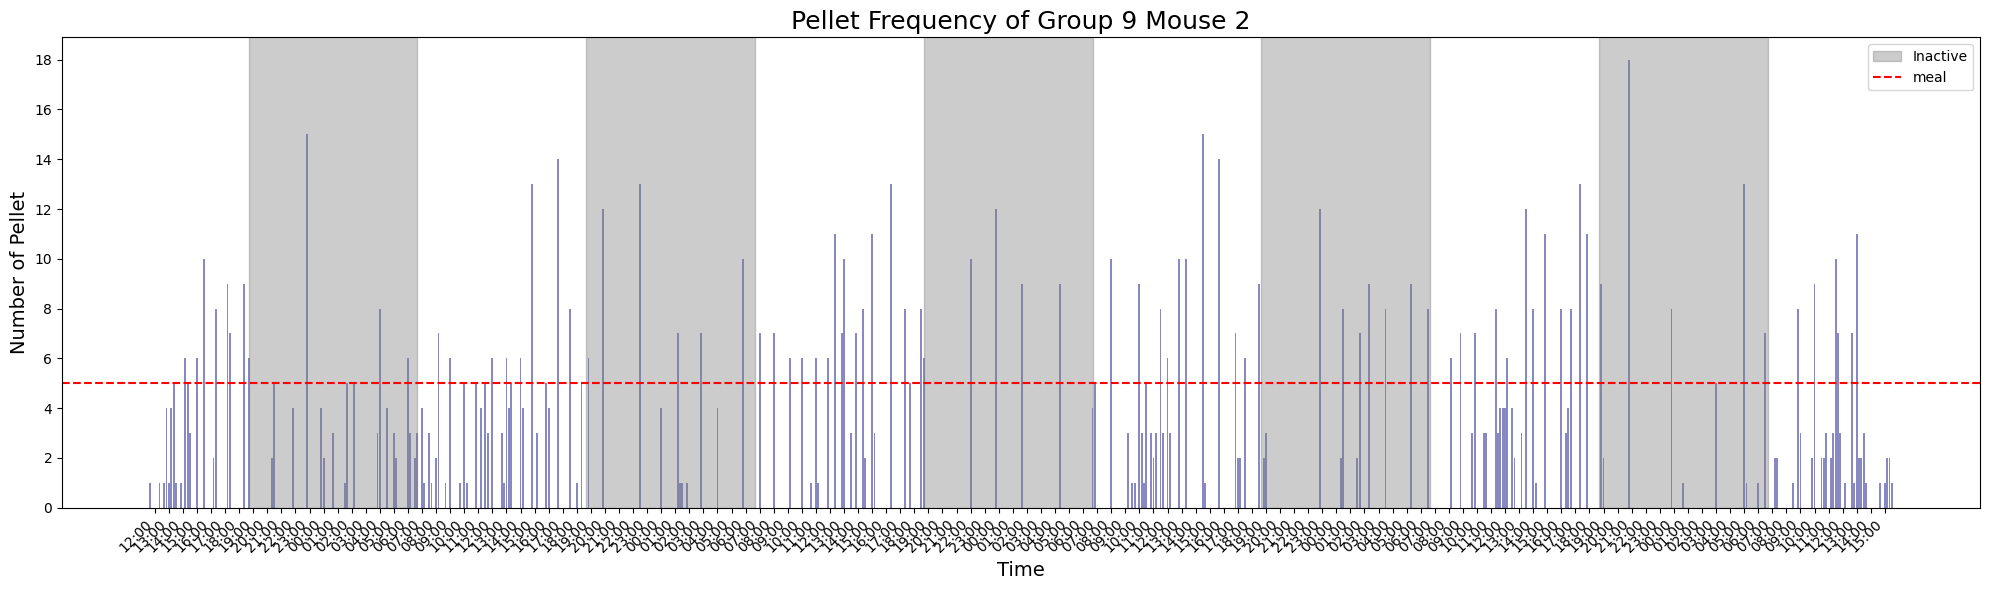

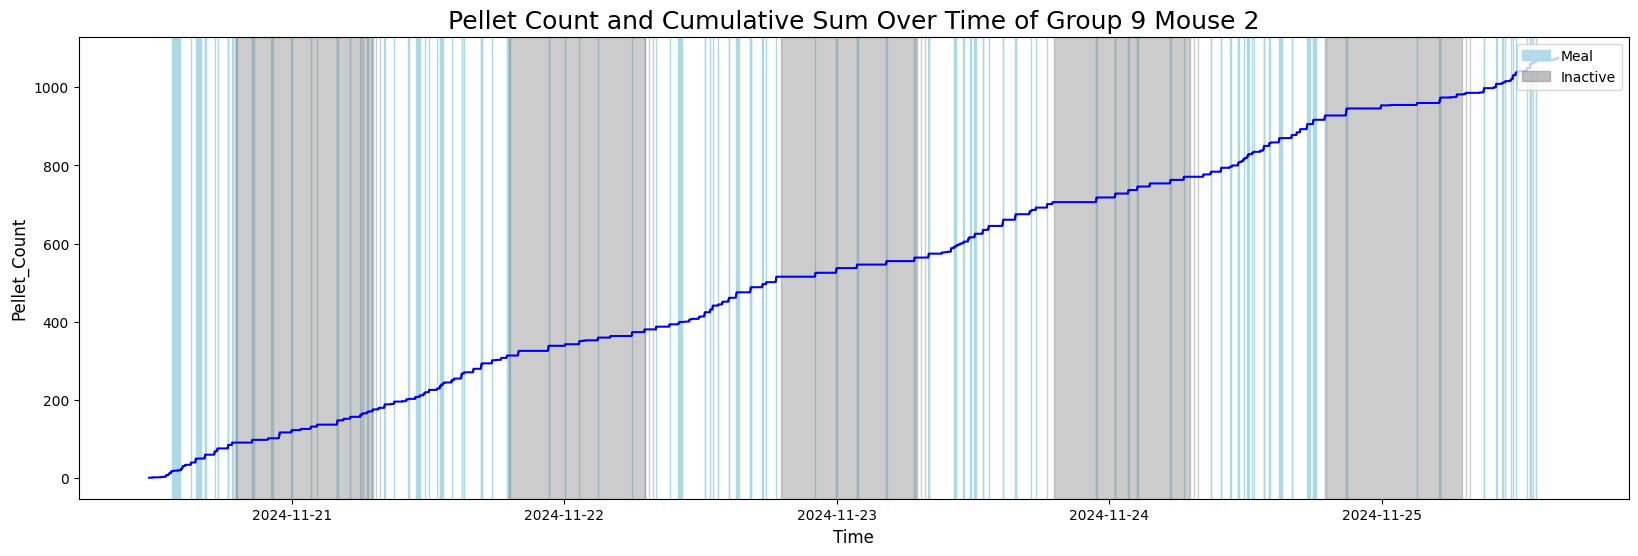

In [3]:
cask_avg_pellet = [] # pellet per hour
cask_dark_meals = [] # percentage of meals in inactive/dark phase
cask_fir_meal = []
flip_cask_meal_count = []
cask_fir_good_meal = []

for sheet in rev_cask_sheets:
    data = read_excel_by_sheet(sheet, rev_cask_path, cumulative_accuracy=False)
    meal, meal_acc = ml.find_meals_paper(data, time_threshold=time_threshold, pellet_threshold=pellet_threshold)
    meal_with_acc, first_meal_time = ml.find_first_good_meal(data, 60, 2, 'lstm')
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    meal_1_good = (first_meal_time - data['Time'][0]).total_seconds() / 3600
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(sheet)
    flip_cask_meal_count.append(round(len(meal) / ml.experiment_duration(data), 2))
    cask_avg_pellet.append(ml.average_pellet(group))
    cask_dark_meals.append(ml.active_meal(meal))
    cask_fir_meal.append(meal_1)
    cask_fir_good_meal.append(meal_1_good)
    sheet = sheet.replace('.', '') + '.svg'
    ml.graph_pellet_frequency(group, bhv, num, export_path=os.path.join(export_root, 'Supplementary 3', f'pellet_freq_{sheet}'))
    ml.graphing_cum_count(data, meal, bhv, num, flip=True, export_path=os.path.join(export_root, 'Supplementary 3', f'pellet_curve_{sheet}'))

In [4]:
import numpy as np
import intervals as invs
import warnings

warnings.filterwarnings('ignore')
alpha = 0.1

### Meal Analysis

In [5]:
ctrl_light_meals = 1 - np.array(ctrl_dark_meals)
cask_light_meals = 1 - np.array(cask_dark_meals)

#### Inactive and active meal in group

In [6]:
invs.perform_T_test(ctrl_light_meals, ctrl_dark_meals)

P Value is  1.3507929895987626e-14
There is a significant difference between the two groups.


In [7]:
invs.perform_T_test(cask_dark_meals, cask_light_meals)

P Value is  5.687187522483361e-20
There is a significant difference between the two groups.


#### Average Meal Count per Day

In [8]:
invs.perform_T_test(flip_ctrl_meal_count, flip_cask_meal_count, test_side='greater')

P Value is  0.8107518437086141
There is no significant difference between the two groups.


#### Inactive and active meal between group

In [9]:
invs.perform_T_test(ctrl_dark_meals, cask_dark_meals, test_side='less')

P Value is  0.7467403820277496
There is no significant difference between the two groups.


* Mice have significant more meals in their active/day time
* No significant difference in the proportion of inactive meals between control and cask groups

### Average Pellet

Male Size: 27
Female Size: 24
Male Average: 188.96555555555557
Female Average: 225.54708333333335
Male Standard Deviation: 5.864796543805133
Female Standard Deviation: 5.475060802527888


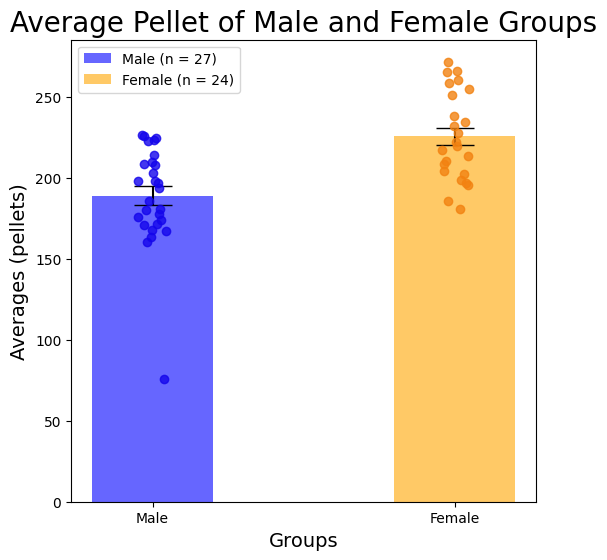

In [10]:
graph_group_stats(ctrl_avg_pellet, cask_avg_pellet, stats_name='Average Pellet', unit='pellets', 
                  group_names=['Male', 'Female'], export_path=os.path.join(export_root, 'pellet_by_day.svg'))

In [11]:
invs.perform_T_test(ctrl_avg_pellet, cask_avg_pellet, test_side='two-sided')

P Value is  5.185386777569877e-05
There is a significant difference between the two groups.


#### Time needed to start the first meal

Male Size: 27
Female Size: 24
Male Average: 0.8908786008127572
Female Average: 0.9465046296296297
Male Standard Deviation: 0.16404914838242468
Female Standard Deviation: 0.15202601923711712


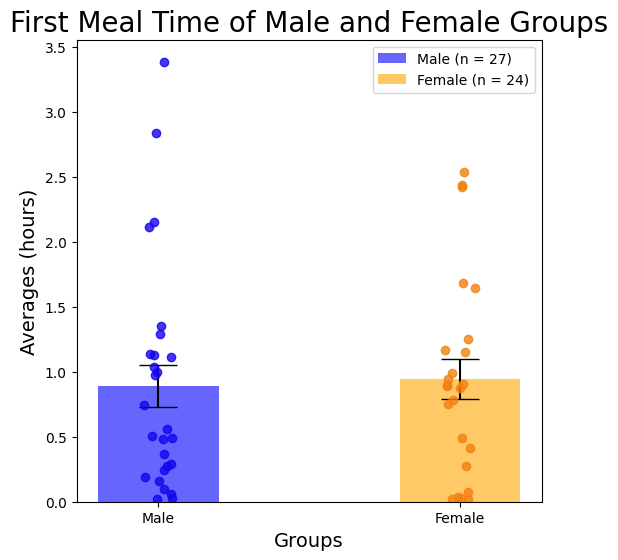

In [12]:
graph_group_stats(ctrl_fir_meal, cask_fir_meal, stats_name='First Meal Time', unit='hours', group_names=['Male', 'Female'],)

In [13]:
invs.perform_T_test(ctrl_fir_meal, cask_fir_meal, test_side='less')

P Value is  0.5950530049634986
There is no significant difference between the two groups.


Male Size: 27
Female Size: 24
Male Average: 1.200195473251029
Female Average: 1.2597939814814814
Male Standard Deviation: 0.2002613667418592
Female Standard Deviation: 0.1860545067919359


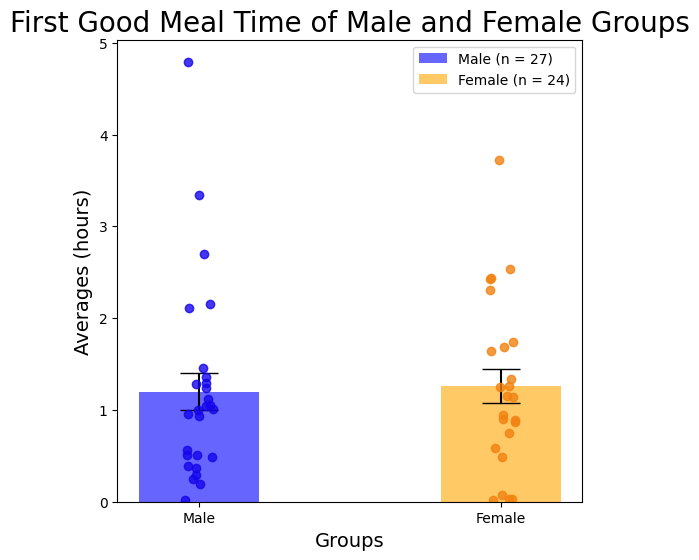

In [14]:
graph_group_stats(ctrl_fir_good_meal, cask_fir_good_meal, stats_name='First Good Meal Time', unit='hours', group_names=['Male', 'Female'],)

In [15]:
invs.perform_T_test(ctrl_fir_good_meal, cask_fir_good_meal, test_side='less')

P Value is  0.5835307909940873
There is no significant difference between the two groups.


### Reversal Dispense

In [16]:
import sys
sys.path.insert(0, '../scripts')

import meals as ml
import tools as tl
from preprocessing import get_all_sheet_names, read_excel_by_sheet, find_dispense_time_by_day

time_threshold = 60
pellet_threshold = 2

In [17]:
ctrl_dispense = {}
cask_dispense = {}
for sheet in rev_ctrl_sheets:
    ctrl_dispense[sheet] = find_dispense_time_by_day(path=rev_ctrl_path, sheet=sheet)
for sheet in rev_cask_sheets:
    cask_dispense[sheet] = find_dispense_time_by_day(rev_cask_path, sheet)

In [18]:
with open('../stats/reversal_ctrl_dispense.txt', 'w') as f:
    f.write(f'Mouse\tDay 1(min)\tDay 2(min)\tDay 3(min)\n')
    for key,val in ctrl_dispense.items():
        f.write(f'{key}\t  {val[0]}\t\t  {val[1]}\t\t {val[2]}\n')

In [19]:
with open('../stats/reversal_cask_dispense.txt', 'w') as f:
    f.write(f'Mouse\tDay 1(min)\tDay 2(min)\tDay 3(min)\n')
    for key,val in cask_dispense.items():
        f.write(f'{key}\t  {val[0]}\t\t  {val[1]}\t\t  {val[2]}\n')